# Analysis of Ironman 70.3 races from 2004 to 2020

Dataset URL: https://www.kaggle.com/code/aiaiaidavid/analysis-of-ironman-70-3-races-from-2004-to-2020

Group 1

Team Members: Elena, Pablo, Gabriel

In [1]:
import pandas as pd
data = pd.read_csv("../dataset/Half_Ironman_df6.csv")
data

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    40-44       40   Andorra          AD       2019   
1           M    45-49       45   Andorra          AD       2019   
2           M    45-49       45   Andorra          AD       2020   
3           M    45-49       45   Andorra          AD       2019   
4           M    40-44       40   Andorra          AD       2019   
...       ...      ...      ...       ...         ...        ...   
840070      M    50-54       50  Zimbabwe          ZW       2015   
840071      M    40-44       40  Zimbabwe          ZW       2015   
840072      F    30-34       30  Zimbabwe          ZW       2015   
840073      F    35-39       35  Zimbabwe          ZW       2015   
840074      F    30-34       30  Zimbabwe          ZW       2015   

                                            EventLocation  SwimTime  \
0       IRONMAN 70.3 South American Championship Bueno...      1679   
1       IRONMAN 70.3 South American Championship Bueno...      2070   
2                                  IRONMAN 70.3 Bariloche      1667   
3                         IRONMAN 70.3 World Championship      1750   
4                         IRONMAN 70.3 World Championship      2063   
...                                                   ...       ...   
840070                          IRONMAN 70.3 South Africa      2054   
840071                          IRONMAN 70.3 South Africa      2449   
840072                             IRONMAN 70.3 Steelhead      2171   
840073                              IRONMAN 70.3 Budapest      2100   
840074                              IRONMAN 70.3 Budapest      2096   

        Transition1Time  BikeTime  Transition2Time  RunTime  FinishTime  
0                   119      9107               95     5515       16514  
1                   177      9160              132     6070       17609  
2                   161      9891              122     5190       17031  
3                   183     10363              160     5071       17527  
4                   182     10065              142     5556       18008  
...                 ...       ...              ...      ...         ...  
840070              261     10527              160     6070       19072  
840071              352     11866              265     8461       23393  
840072              357     11433              332     7754       22047  
840073              193     10280              233     6148       18954  
840074              244     10630              273     6155       19398  

[840075 rows x 13 columns]

In [2]:
races_data = pd.read_csv("../outputs/im703-races-data.csv")
races_data

Race Name  \
0        IRONMAN 70.3 Middle East Championship Bahrain   
1                               IRONMAN 70.3 Cartagena   
2                                IRONMAN 70.3 Acapulco   
3    IRONMAN 70.3 Western Australia Asia-Pacific Ch...   
4                  IRONMAN 70.3 Indian Wells La Quinta   
..                                                 ...   
124                    IRONMAN 70.3 Nelson Mandela Bay   
125                               IRONMAN 70.3 Tangier   
126                                IRONMAN 70.3 Rwanda   
127                              IRONMAN 70.3 Phu Quoc   
128                      IRONMAN 70.3 Marathon, Greece   

                               Location Swim Type Bike Type Run Type  \
0                  Bahrain, Middle East       Bay      Flat     Flat   
1                   Cartagena, Colombia       Bay      Flat     Flat   
2                      Acapulco, Mexico     Ocean   Rolling     Flat   
3          Busselton, Western Australia       Bay      Flat     Flat   
4              Indian Wells, California      Lake      Flat  Rolling   
..                                  ...       ...       ...      ...   
124  Nelson Mandela Bay, Port Elizabeth       Bay   Rolling  Rolling   
125                    Tangier, Morocco     Ocean     Hilly     Flat   
126                      Rwanda, Africa      Lake   Rolling    Hilly   
127                  Phu Quoc, Viet Nam     Ocean      Flat     Flat   
128            Marathon, Attica, Greece     Ocean      Flat     Flat   

    Air Temperature Water Temperature Airport  
0     72° F / 22° C     73° F / 23° C     BAH  
1     84° F / 29° C     81° F / 27° C     CTG  
2     88° F / 31° C     84° F / 29° C     ACA  
3     81° F / 27° C     68° F / 20° C     PER  
4     65° F / 18° C     57° F / 14° C     PSP  
..              ...               ...     ...  
124   73° F / 23° C     68° F / 20° C     PLZ  
125   77° F / 25° C     66° F / 19° C     TNG  
126   79° F / 26° C     76° F / 24° C     KGL  
127   82° F / 28° C     84° F / 29° C     PQC  
128   73° F / 23° C     72° F / 22° C     ATH  

[129 rows x 8 columns]

## EDA

In [3]:
races_data['Race Name']

0          IRONMAN 70.3 Middle East Championship Bahrain
1                                 IRONMAN 70.3 Cartagena
2                                  IRONMAN 70.3 Acapulco
3      IRONMAN 70.3 Western Australia Asia-Pacific Ch...
4                    IRONMAN 70.3 Indian Wells La Quinta
                             ...                        
124                      IRONMAN 70.3 Nelson Mandela Bay
125                                 IRONMAN 70.3 Tangier
126                                  IRONMAN 70.3 Rwanda
127                                IRONMAN 70.3 Phu Quoc
128                        IRONMAN 70.3 Marathon, Greece
Name: Race Name, Length: 129, dtype: object

In [4]:
data['EventLocation']

0         IRONMAN 70.3 South American Championship Bueno...
1         IRONMAN 70.3 South American Championship Bueno...
2                                    IRONMAN 70.3 Bariloche
3                           IRONMAN 70.3 World Championship
4                           IRONMAN 70.3 World Championship
                                ...                        
840070                            IRONMAN 70.3 South Africa
840071                            IRONMAN 70.3 South Africa
840072                               IRONMAN 70.3 Steelhead
840073                                IRONMAN 70.3 Budapest
840074                                IRONMAN 70.3 Budapest
Name: EventLocation, Length: 840075, dtype: object

In [5]:
# from fuzzywuzzy import fuzz

# for word1 in data['EventLocation'].unique():
#     for word2 in races_data['Race Name'].unique():
#         word1 = word1.replace("IRONMAN 70.3", "").strip()
#         word2 = word2.replace("IRONMAN 70.3", "").strip()
#         # Comparamos las dos cadenas
#         similitud = fuzz.ratio(word1, word2)
#         if word1 != word2 and similitud > 65 and "Championship" not in word1: 
#             print(f"word1: {word1}, word2: {word2}")

#             print(f"Similitud: {similitud}%")

In [6]:
# word1: Mallorca, word2: Alcúdia-Mallorca
# Similitud: 67%
# word1: Philippines, word2: Davao Philippines
# Similitud: 79%
# word1: Les Sables d'Olonne, word2: Les Sables d'Olonne-Vendée
# Similitud: 84%
# word1: Vietnam, word2: Viet Nam
# Similitud: 80%
# word1: Mont-Tremblant, word2: Mont Tremblant
# Similitud: 93%
# word1: Emilia Romagna, word2: Italy Emilia-Romagna
# Similitud: 76%
# word1: San Juan / Puerto Rico, word2: Puerto Rico
# Similitud: 67%
# word1: Brazil, word2: Brasilia
# Similitud: 71%
# word1: Zell am See Kaprun, word2: Zell am See-Kaprun
# Similitud: 94%
# word1: Florianopolis, word2: Florianópolis
# Similitud: 92%
# word1: IRONMAN Oceanside, word2: Oceanside
# Similitud: 69%
# word1: Zell am See, word2: Zell am See-Kaprun
# Similitud: 76%
# word1: Luxembourg - RÃ©gion Moselle, word2: Luxembourg Remich-Région Moselle
# Similitud: 83%
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Alcúdia-Mallorca','IRONMAN 70.3 Mallorca')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Davao Philippines','IRONMAN 70.3 Philippines')
races_data['Race Name'] = races_data['Race Name'].replace("IRONMAN 70.3 Les Sables d'Olonne","IRONMAN 70.3 Les Sables d'Olonne-Vendée")
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Viet Nam','IRONMAN 70.3 Vietnam')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Mont-Tremblant','IRONMAN 70.3 Mont Tremblant')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Emilia Romagna','IRONMAN 70.3 Italy Emilia-Romagna')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Puerto Rico','IRONMAN 70.3 San Juan / Puerto Rico')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Brasilia','IRONMAN 70.3 Brazil')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Zell am See-Kaprun','IRONMAN 70.3 Zell am See Kaprun')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Florianópolis','IRONMAN 70.3 Florianopolis')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Oceanside','IRONMAN Oceanside')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Zell am See-Kaprun','IRONMAN 70.3 Zell am See')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Luxembourg Remich-Région Moselle','IRONMAN 70.3 Luxembourg - RÃ©gion Moselle')

In [7]:
df_merged = pd.merge(data, races_data, left_on='EventLocation', right_on='Race Name', how='inner')
df_merged

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    35-39       35   Andorra          AD       2019   
1           M    35-39       35   Andorra          AD       2019   
2           M    35-39       35   Andorra          AD       2016   
3           M    45-49       45   Andorra          AD       2016   
4           F    35-39       35   Andorra          AD       2016   
...       ...      ...      ...       ...         ...        ...   
383497      M    50-54       50  Zimbabwe          ZW       2019   
383498      F    18-24       18  Zimbabwe          ZW       2014   
383499      M    40-44       40  Zimbabwe          ZW       2014   
383500      M    25-29       25  Zimbabwe          ZW       2013   
383501      M    30-34       30  Zimbabwe          ZW       2013   

                   EventLocation  SwimTime  Transition1Time  BikeTime  ...  \
0          IRONMAN 70.3 Victoria      2042              159     10931  ...   
1        IRONMAN 70.3 Santa Cruz      1973              343     10197  ...   
2             IRONMAN 70.3 Texas      3133              445     11615  ...   
3          IRONMAN 70.3 Mallorca      2115              265     10410  ...   
4             IRONMAN 70.3 Vichy      2457              252      9998  ...   
...                          ...       ...              ...       ...  ...   
383497  IRONMAN 70.3 Chattanooga      1260              459     10045  ...   
383498        IRONMAN 70.3 Boise      2056              218     11527  ...   
383499     IRONMAN 70.3 San Juan      2171              308      9504  ...   
383500     IRONMAN 70.3 San Juan      2218              311     10933  ...   
383501     IRONMAN 70.3 Eagleman      2623              228     10029  ...   

        RunTime  FinishTime                 Race Name  \
0          6384       19655     IRONMAN 70.3 Victoria   
1          7007       19627   IRONMAN 70.3 Santa Cruz   
2          9147       24580        IRONMAN 70.3 Texas   
3          5607       18700     IRONMAN 70.3 Mallorca   
4          6479       19462        IRONMAN 70.3 Vichy   
...         ...         ...                       ...   
383497     8954       20978  IRONMAN 70.3 Chattanooga   
383498     7072       21020        IRONMAN 70.3 Boise   
383499     8102       20231     IRONMAN 70.3 San Juan   
383500     7419       21014     IRONMAN 70.3 San Juan   
383501     7214       20306     IRONMAN 70.3 Eagleman   

                          Location  Swim Type Bike Type Run Type  \
0       Victoria, British Columbia       Lake   Rolling     Flat   
1           Santa Cruz, California      Ocean   Rolling     Flat   
2                 Galveston, Texas      Ocean      Flat  Rolling   
3         Alcúdia, Mallorca, Spain      Ocean     Hilly     Flat   
4                    Vichy, France       Lake     Hilly     Flat   
...                            ...        ...       ...      ...   
383497      Chattanooga, Tennessee      River   Rolling  Rolling   
383498                Boise, Idaho  Reservoir   Rolling     Flat   
383499         San Juan, Argentina  Reservoir     Hilly     Flat   
383500         San Juan, Argentina  Reservoir     Hilly     Flat   
383501         Cambridge, Maryland      River      Flat     Flat   

       Air Temperature Water Temperature Airport  
0        65° F / 18° C     66° F / 19° C     YYJ  
1        65° F / 18° C     63° F / 17° C     SJC  
2        70° F / 21° C     71° F / 22° C     HOU  
3        77° F / 25° C     63° F / 17° C     PMI  
4        83° F / 28° C     77° F / 25° C     LYS  
...                ...               ...     ...  
383497   71° F / 22° C     72° F / 22° C     CHA  
383498   81° F / 27° C     72° F / 22° C     BOI  
383499   77° F / 25° C     68° F / 20° C     UAQ  
383500   77° F / 25° C     68° F / 20° C     UAQ  
383501   80° F / 27° C     75° F / 24° C     BWI  

[383502 rows x 21 columns]

In [8]:
# from pathlib import Path
# df_merged.to_csv(Path("../outputs/df_merged.csv"), index=None)

In [9]:
len(df_merged.EventLocation.unique())

68

### Add coordinates

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ironman_locator")
def get_coordinates(location):
    try:
        loc = geolocator.geocode(location)
        if loc:
            return (loc.latitude, loc.longitude)
        else:
            return (None, None)
    except:
        return (None, None)
# Obtenir valors únics de Location
unique_locations = df_merged['Location'].unique()
# Crear un diccionari per guardar coordenades de cada ubicació
location_coords = {loc: get_coordinates(loc) for loc in unique_locations}

# Coordenades manuals per a ubicacions no trobades
manual_coords = {
    'Kohala Coast, Hawaii': (20.024722, -155.824722),
    'Tahara City, Toyohashi City, Japan&nbsp;': (34.653611, 137.265556),
    'San Juan, Puerto Rico, United States Territory': (18.465539, -66.105735),
    'Brasilia, Brazil': (-15.793889, -47.882778),
    'Huntsville, Ontario': (45.9890, -79.2170),
    'Kwa Zulu Natal': (-29.0000, 30.0000),
    'Da Nang, Viet Nam': (16.0544, 108.2022),
    'Calgary, Alberta': (51.0447, -114.0719),
    'Panamá City, Panamá': (8.9833, -79.5167)
}
# Actualitzar el diccionari existent amb les coordenades manuals
location_coords.update(manual_coords)
# Tornar a assignar les coordenades al DataFrame
df_merged['Coordinates'] = df_merged['Location'].map(location_coords)
df_merged[['Latitude', 'Longitude']] = pd.DataFrame(df_merged['Coordinates'].tolist(), index=df_merged.index)
df_merged.drop(columns='Coordinates', inplace=True)

# Comprovar les noves columnes
print(df_merged[['Location', 'Latitude', 'Longitude']].head())

                     Location   Latitude   Longitude
0  Victoria, British Columbia  48.428318 -123.364953
1      Santa Cruz, California  37.050096 -121.990590
2            Galveston, Texas  29.387225  -94.992736
3    Alcúdia, Mallorca, Spain  39.852045    3.118386
4               Vichy, France  46.123927    3.420371


In [11]:
# Diccionari amb altituds
altitudes = {
    'Victoria, British Columbia': 23,
    'Santa Cruz, California': 11,
    'Galveston, Texas': 2,
    'Alcúdia, Mallorca, Spain': 10,
    'Vichy, France': 252,
    'Punta del Este, Uruguay': 5,
    "Coeur d'Alene, Idaho": 648,
    'Madison, Wisconsin': 259,
    'Cartagena, Colombia': 2,
    'Marbella, Spain': 57,
    'Kohala Coast, Hawaii': 10,
    'Boulder, Colorado': 1624,
    'Nice, France': 10,
    'San Juan, Argentina': 598,
    'Rapperswil-Jona, Switzerland': 409,
    'Muncie, Indiana': 284,
    'Davao City, Philippines': 5,
    'Bahrain, Middle East': 2,
    'Gdynia, Poland': 25,
    'Muscat, Oman': 10,
    'Subic Bay, Philippines': 5,
    'Huntsville, Ontario': 329,
    'Kwa Zulu Natal': 23,
    'Da Nang, Viet Nam': 7,
    'Calgary, Alberta': 1048,
    'Cozumel, Mexico': 1,
    'Haines City, Florida': 30,
    'Port Macquarie, New South Wales': 5,
    'Tahara City, Toyohashi City, Japan&nbsp;': 50,
    'Tahara City, Toyohashi City, Japan': 50,
    'Boise, Idaho': 820,
    'Cambridge, Maryland': 2,
    'Mooloolaba, Queensland': 10,
    'Sandusky, Ohio': 174,
    'Taupo, New Zealand': 365,
    'Augusta, Georgia': 47,
    'Kraichgau, Baden-Württemberg, Germany': 142,
    'Augusta, Maine': 18,
    'San Juan, Puerto Rico': 5,
    'San Juan, Puerto Rico, United States Territory': 5,
    'Buenos Aires, Argentina': 25,
    'Rio de Janeiro, Brazil': 2,
    'Panama City Beach, Florida': 2,
    'Panamá City, Panamá': 2,
    'Brasilia, Brazil': 1172,
    'Indian Wells, California': 13,
    'Waco, Texas': 131,
    'Wilmington, North Carolina': 9,
    'Pucon, Chile': 227,
    'Zell am See, Austria': 758,
    'Los Cabos, Mexico': 10,
    'Sao Paulo, Brazil': 760,
    'Campeche, Mexico': 3,
    'Penrith, New South Wales': 25,
    'Taupo, Waikato': 365,
    'Fortaleza, Brazil': 16,
    'Geelong, Victoria': 15,
    'Manta, Manabi': 6,
    'Chattanooga, Tennessee': 210,
    'Monterrey, Mexico': 540,
    'Cairns, Queensland': 5,
    'Dorset, England': 200,
    'Lima, Perú': 102,
    'Florianopolis, Brazil': 3,
    'Langkawi, Malaysia': 5,
    'Oceanside, California': 20,
    'Region Moselle, Luxembourg': 300,
    'India': 250,
    'Goseong, Korea': 7,
    'Tallinn, Estonia': 8
}

# Afegir la columna d'altituds al DataFrame
df_merged['Altitude (m)'] = df_merged['Location'].map(altitudes)

### Clean Dataset

In [12]:
df_merged = df_merged.drop(columns='Race Name')
df_merged['Air Temperature (°C)'] = df_merged['Air Temperature'].str.split(" / ", expand=True)[1].str.replace('° C', '').astype(int)
df_merged['Water Temperature (°C)'] = df_merged['Water Temperature'].str.split(" / ", expand=True)[1].str.replace('° C', '').astype(int)
df_merged.drop(columns=['Water Temperature', 'Air Temperature', 'Airport'], inplace=True)
df_merged

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    35-39       35   Andorra          AD       2019   
1           M    35-39       35   Andorra          AD       2019   
2           M    35-39       35   Andorra          AD       2016   
3           M    45-49       45   Andorra          AD       2016   
4           F    35-39       35   Andorra          AD       2016   
...       ...      ...      ...       ...         ...        ...   
383497      M    50-54       50  Zimbabwe          ZW       2019   
383498      F    18-24       18  Zimbabwe          ZW       2014   
383499      M    40-44       40  Zimbabwe          ZW       2014   
383500      M    25-29       25  Zimbabwe          ZW       2013   
383501      M    30-34       30  Zimbabwe          ZW       2013   

                   EventLocation  SwimTime  Transition1Time  BikeTime  ...  \
0          IRONMAN 70.3 Victoria      2042              159     10931  ...   
1        IRONMAN 70.3 Santa Cruz      1973              343     10197  ...   
2             IRONMAN 70.3 Texas      3133              445     11615  ...   
3          IRONMAN 70.3 Mallorca      2115              265     10410  ...   
4             IRONMAN 70.3 Vichy      2457              252      9998  ...   
...                          ...       ...              ...       ...  ...   
383497  IRONMAN 70.3 Chattanooga      1260              459     10045  ...   
383498        IRONMAN 70.3 Boise      2056              218     11527  ...   
383499     IRONMAN 70.3 San Juan      2171              308      9504  ...   
383500     IRONMAN 70.3 San Juan      2218              311     10933  ...   
383501     IRONMAN 70.3 Eagleman      2623              228     10029  ...   

        FinishTime                    Location  Swim Type Bike Type Run Type  \
0            19655  Victoria, British Columbia       Lake   Rolling     Flat   
1            19627      Santa Cruz, California      Ocean   Rolling     Flat   
2            24580            Galveston, Texas      Ocean      Flat  Rolling   
3            18700    Alcúdia, Mallorca, Spain      Ocean     Hilly     Flat   
4            19462               Vichy, France       Lake     Hilly     Flat   
...            ...                         ...        ...       ...      ...   
383497       20978      Chattanooga, Tennessee      River   Rolling  Rolling   
383498       21020                Boise, Idaho  Reservoir   Rolling     Flat   
383499       20231         San Juan, Argentina  Reservoir     Hilly     Flat   
383500       21014         San Juan, Argentina  Reservoir     Hilly     Flat   
383501       20306         Cambridge, Maryland      River      Flat     Flat   

         Latitude   Longitude  Altitude (m)  Air Temperature (°C)  \
0       48.428318 -123.364953            23                    18   
1       37.050096 -121.990590            11                    18   
2       29.387225  -94.992736             2                    21   
3       39.852045    3.118386            10                    25   
4       46.123927    3.420371           252                    28   
...           ...         ...           ...                   ...   
383497  35.045722  -85.309488           210                    22   
383498  43.616616 -116.200886           820                    27   
383499 -30.705436  -69.198822           598                    25   
383500 -30.705436  -69.198822           598                    25   
383501  38.571462  -76.076318             2                    27   

        Water Temperature (°C)  
0                           19  
1                           17  
2                           22  
3                           17  
4                           25  
...                        ...  
383497                      22  
383498                      22  
383499                      20  
383500                      20  
383501                      24  

[383502 rows x 22 columns]

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383502 entries, 0 to 383501
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  383502 non-null  object 
 1   AgeGroup                383502 non-null  object 
 2   AgeBand                 383502 non-null  int64  
 3   Country                 383502 non-null  object 
 4   CountryISO2             383502 non-null  object 
 5   EventYear               383502 non-null  int64  
 6   EventLocation           383502 non-null  object 
 7   SwimTime                383502 non-null  int64  
 8   Transition1Time         383502 non-null  int64  
 9   BikeTime                383502 non-null  int64  
 10  Transition2Time         383502 non-null  int64  
 11  RunTime                 383502 non-null  int64  
 12  FinishTime              383502 non-null  int64  
 13  Location                383502 non-null  object 
 14  Swim Type           

### Find NaN

In [14]:
#  Encontrar nulos (NaN)
df_merged.isnull().sum()

Gender                    0
AgeGroup                  0
AgeBand                   0
Country                   0
CountryISO2               0
EventYear                 0
EventLocation             0
SwimTime                  0
Transition1Time           0
BikeTime                  0
Transition2Time           0
RunTime                   0
FinishTime                0
Location                  0
Swim Type                 0
Bike Type                 0
Run Type                  0
Latitude                  0
Longitude                 0
Altitude (m)              0
Air Temperature (°C)      0
Water Temperature (°C)    0
dtype: int64

### Value_counts y unique

In [15]:
# Para hacernos una idea de los datos que hay, de los valores nulos, y de los valores que toma cada columna, hacemos value_counts y unique, así como len(unique()) para todos los casos
for col in df_merged.columns:
    print(f"'{col}' value_counts: {df_merged[col].value_counts()}")
    print(f"'{col}' unique: {df_merged[col].unique()}")
    print(f"'{col}' len(unique): {len(df_merged[col].unique())}\n")

'Gender' value_counts: Gender
M    285611
F     97891
Name: count, dtype: int64
'Gender' unique: ['M' 'F']
'Gender' len(unique): 2

'AgeGroup' value_counts: AgeGroup
35-39    74173
40-44    73050
30-34    61918
45-49    55346
25-29    39103
50-54    33915
55-59    16689
18-24    13017
00        6881
60-64     6472
65-69     2161
70-74      651
75-79      109
80-84       15
85-89        2
Name: count, dtype: int64
'AgeGroup' unique: ['35-39' '45-49' '40-44' '50-54' '30-34' '25-29' '18-24' '55-59' '60-64'
 '65-69' '00' '70-74' '75-79' '80-84' '85-89']
'AgeGroup' len(unique): 15

'AgeBand' value_counts: AgeBand
35    74173
40    73050
30    61918
45    55346
25    39103
50    33915
55    16689
18    13017
0      6881
60     6472
65     2161
70      651
75      109
80       15
85        2
Name: count, dtype: int64
'AgeBand' unique: [35 45 40 50 30 25 18 55 60 65  0 70 75 80 85]
'AgeBand' len(unique): 15

'Country' value_counts: Country
United States               156625
Australia          

### Lineplot

In [16]:
df_events_cnt = df_merged.groupby('EventYear').size().reset_index(name='counts')
df_events_cnt

EventYear  counts
0        2004    1572
1        2005    2788
2        2006    3745
3        2007    4128
4        2008    3516
5        2009    5383
6        2010   12135
7        2011   17652
8        2012   19590
9        2013   23210
10       2014   29014
11       2015   41168
12       2016   42607
13       2017   50912
14       2018   56199
15       2019   64238
16       2020    5645

In [17]:
df_events_cnt_eventloc = df_merged.groupby(['EventYear', 'EventLocation']).size().reset_index(name='counts').sort_values('counts', ascending=False)
df_events_cnt_eventloc

EventYear             EventLocation  counts
40        2012      IRONMAN 70.3 Augusta    2448
26        2011      IRONMAN 70.3 Augusta    2407
85        2014     IRONMAN 70.3 Mallorca    2396
12        2009      IRONMAN 70.3 Augusta    2364
116       2015     IRONMAN 70.3 Mallorca    2341
..         ...                       ...     ...
200       2017  IRONMAN 70.3 New Zealand     104
209       2017   IRONMAN 70.3 Santa Cruz      29
141       2016       IRONMAN 70.3 Durban      14
212       2017        IRONMAN 70.3 Taupo      12
49        2012       IRONMAN 70.3 Muncie       4

[336 rows x 3 columns]

In [18]:
df_events_cnt_eventloc.head(10)

EventYear          EventLocation  counts
40        2012   IRONMAN 70.3 Augusta    2448
26        2011   IRONMAN 70.3 Augusta    2407
85        2014  IRONMAN 70.3 Mallorca    2396
12        2009   IRONMAN 70.3 Augusta    2364
116       2015  IRONMAN 70.3 Mallorca    2341
16        2010   IRONMAN 70.3 Augusta    2285
244       2018  IRONMAN 70.3 Mallorca    2238
57        2013   IRONMAN 70.3 Augusta    2235
295       2019  IRONMAN 70.3 Mallorca    2198
66        2013  IRONMAN 70.3 Mallorca    2197

Text(0.5, 1.0, 'Participants by Event Year')

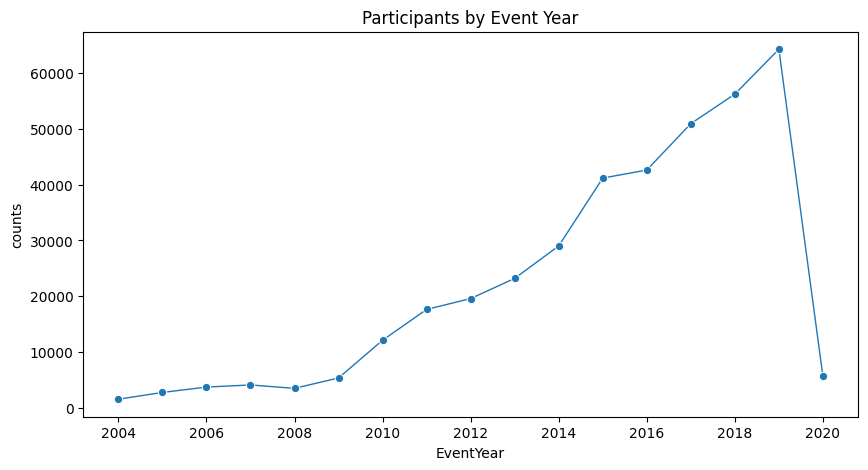

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=df_events_cnt, x='EventYear', y='counts', linewidth=1, marker='o', markersize=6)
plt.title("Participants by Event Year")

Media de los tiempos de correr y bici por temperatura

In [20]:
df_merged['Air Temperature (°C)']

0         18
1         18
2         21
3         25
4         28
          ..
383497    22
383498    27
383499    25
383500    25
383501    27
Name: Air Temperature (°C), Length: 383502, dtype: int64

In [21]:
df_merged

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    35-39       35   Andorra          AD       2019   
1           M    35-39       35   Andorra          AD       2019   
2           M    35-39       35   Andorra          AD       2016   
3           M    45-49       45   Andorra          AD       2016   
4           F    35-39       35   Andorra          AD       2016   
...       ...      ...      ...       ...         ...        ...   
383497      M    50-54       50  Zimbabwe          ZW       2019   
383498      F    18-24       18  Zimbabwe          ZW       2014   
383499      M    40-44       40  Zimbabwe          ZW       2014   
383500      M    25-29       25  Zimbabwe          ZW       2013   
383501      M    30-34       30  Zimbabwe          ZW       2013   

                   EventLocation  SwimTime  Transition1Time  BikeTime  ...  \
0          IRONMAN 70.3 Victoria      2042              159     10931  ...   
1        IRONMAN 70.3 Santa Cruz      1973              343     10197  ...   
2             IRONMAN 70.3 Texas      3133              445     11615  ...   
3          IRONMAN 70.3 Mallorca      2115              265     10410  ...   
4             IRONMAN 70.3 Vichy      2457              252      9998  ...   
...                          ...       ...              ...       ...  ...   
383497  IRONMAN 70.3 Chattanooga      1260              459     10045  ...   
383498        IRONMAN 70.3 Boise      2056              218     11527  ...   
383499     IRONMAN 70.3 San Juan      2171              308      9504  ...   
383500     IRONMAN 70.3 San Juan      2218              311     10933  ...   
383501     IRONMAN 70.3 Eagleman      2623              228     10029  ...   

        FinishTime                    Location  Swim Type Bike Type Run Type  \
0            19655  Victoria, British Columbia       Lake   Rolling     Flat   
1            19627      Santa Cruz, California      Ocean   Rolling     Flat   
2            24580            Galveston, Texas      Ocean      Flat  Rolling   
3            18700    Alcúdia, Mallorca, Spain      Ocean     Hilly     Flat   
4            19462               Vichy, France       Lake     Hilly     Flat   
...            ...                         ...        ...       ...      ...   
383497       20978      Chattanooga, Tennessee      River   Rolling  Rolling   
383498       21020                Boise, Idaho  Reservoir   Rolling     Flat   
383499       20231         San Juan, Argentina  Reservoir     Hilly     Flat   
383500       21014         San Juan, Argentina  Reservoir     Hilly     Flat   
383501       20306         Cambridge, Maryland      River      Flat     Flat   

         Latitude   Longitude  Altitude (m)  Air Temperature (°C)  \
0       48.428318 -123.364953            23                    18   
1       37.050096 -121.990590            11                    18   
2       29.387225  -94.992736             2                    21   
3       39.852045    3.118386            10                    25   
4       46.123927    3.420371           252                    28   
...           ...         ...           ...                   ...   
383497  35.045722  -85.309488           210                    22   
383498  43.616616 -116.200886           820                    27   
383499 -30.705436  -69.198822           598                    25   
383500 -30.705436  -69.198822           598                    25   
383501  38.571462  -76.076318             2                    27   

        Water Temperature (°C)  
0                           19  
1                           17  
2                           22  
3                           17  
4                           25  
...                        ...  
383497                      22  
383498                      22  
383499                      20  
383500                      20  
383501                      24  

[383502 rows x 22 columns]

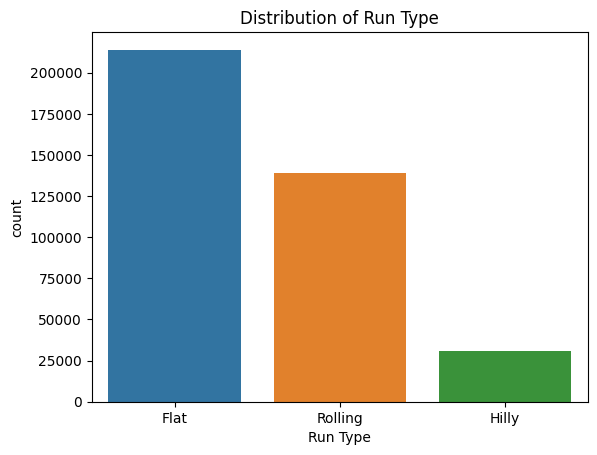

In [22]:
sns.countplot(data=df_merged, x='Run Type', hue='Run Type', palette='tab10')
plt.title("Distribution of Run Type")
plt.show()

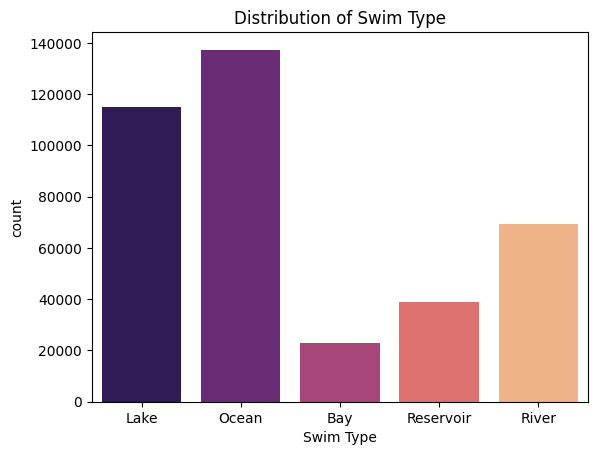

In [23]:
sns.countplot(data=df_merged, x='Swim Type', hue='Swim Type', palette='magma')
plt.title("Distribution of Swim Type")
plt.show()

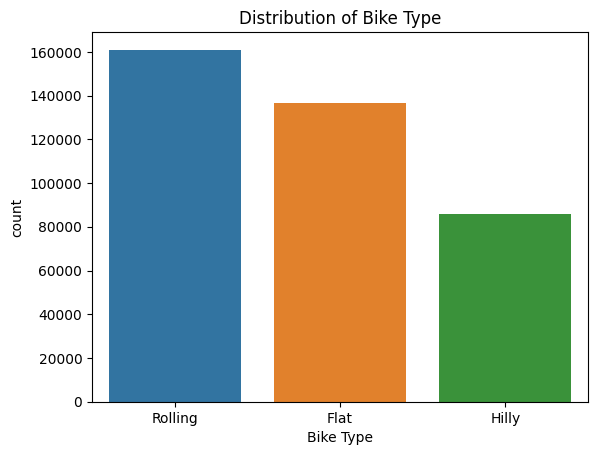

In [24]:
sns.countplot(data=df_merged, x='Bike Type', hue='Bike Type', palette='tab10') # same colors than Run 
plt.title("Distribution of Bike Type")
plt.show()

In [25]:
df_merged.describe([.75, .90, .95, .99])

AgeBand      EventYear       SwimTime  Transition1Time  \
count  383502.000000  383502.000000  383502.000000    383502.000000   
mean       37.224293    2015.427395    2348.000480       284.843372   
std        10.761898       3.284632     500.123888        97.065805   
min         0.000000    2004.000000    1201.000000        46.000000   
50%        35.000000    2016.000000    2293.000000       278.000000   
75%        45.000000    2018.000000    2624.000000       356.000000   
90%        50.000000    2019.000000    2984.000000       423.000000   
95%        55.000000    2019.000000    3242.000000       456.000000   
99%        60.000000    2020.000000    3855.000000       490.000000   
max        85.000000    2020.000000    5996.000000       499.000000   

            BikeTime  Transition2Time        RunTime     FinishTime  \
count  383502.000000    383502.000000  383502.000000  383502.000000   
mean    10637.096049       222.405484    7766.027025   21258.393612   
std      1342.694829        93.490511    1617.200254    3065.330908   
min      6511.000000        46.000000    4002.000000   13035.000000   
50%     10479.000000       208.000000    7528.000000   20979.000000   
75%     11422.000000       281.000000    8742.000000   23190.000000   
90%     12424.000000       356.000000   10011.000000   25390.000000   
95%     13097.000000       403.000000   10809.000000   26816.000000   
99%     14456.000000       469.000000   12251.990000   29329.000000   
max     17979.000000       499.000000   14984.000000   36529.000000   

            Latitude      Longitude   Altitude (m)  Air Temperature (°C)  \
count  383502.000000  383502.000000  383502.000000         383502.000000   
mean       23.059656     -36.775215     198.246961             24.279195   
std        27.219888      87.115180     360.802729              3.621083   
min       -39.273222    -155.824722       1.000000             15.000000   
50%        33.470971     -79.217000      25.000000             25.000000   
75%        41.295156       8.822265     252.000000             27.000000   
90%        47.674299     137.265556     598.000000             28.000000   
95%        49.734987     152.910352    1048.000000             30.000000   
99%        54.523330     176.069477    1624.000000             33.000000   
max        59.437216     176.069477    1624.000000             33.000000   

       Water Temperature (°C)  
count           383502.000000  
mean                21.890955  
std                  3.406773  
min                 14.000000  
50%                 22.000000  
75%                 24.000000  
90%                 26.000000  
95%                 28.000000  
99%                 29.000000  
max                 30.000000

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='RunTime'>

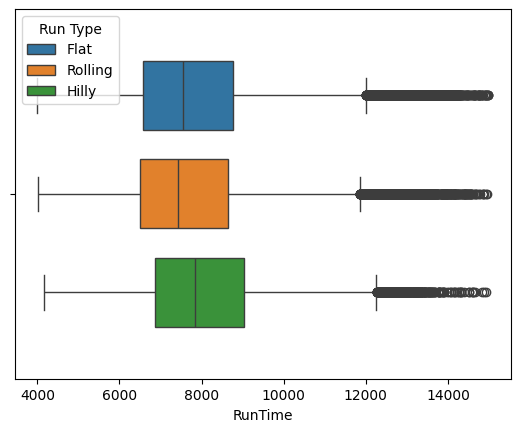

In [26]:
sns.boxplot(data=df_merged, x='RunTime', hue='Run Type', orient='v',  gap=0.3)

<Axes: xlabel='RunTime', ylabel='Count'>

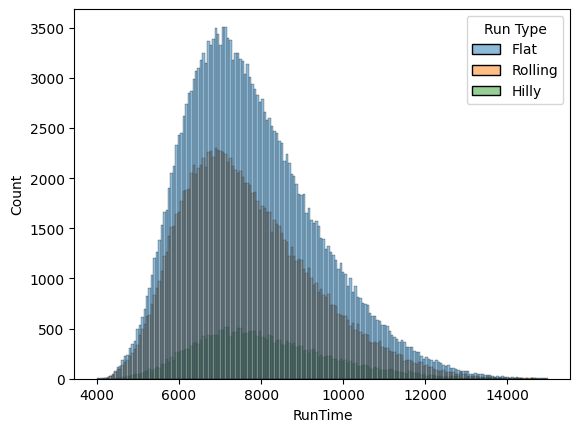

In [27]:
sns.histplot(data=df_merged, x='RunTime', hue='Run Type')

In [28]:
df_merged.groupby('Run Type')['RunTime'].agg('mean').reset_index()

Run Type      RunTime
0     Flat  7779.976820
1    Hilly  8049.906315
2  Rolling  7682.087244

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='SwimTime'>

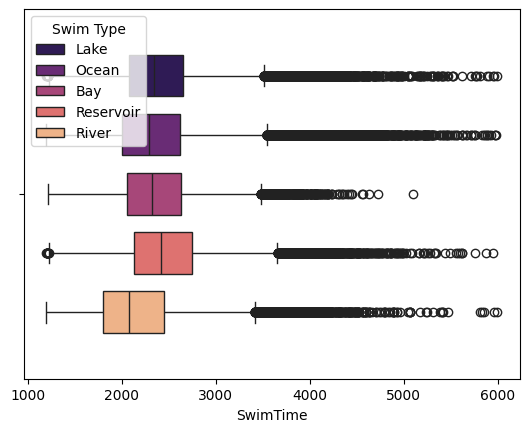

In [29]:
sns.boxplot(data=df_merged, x='SwimTime', hue='Swim Type', orient='v',  gap=0.3, palette='magma')

<Axes: xlabel='SwimTime', ylabel='Count'>

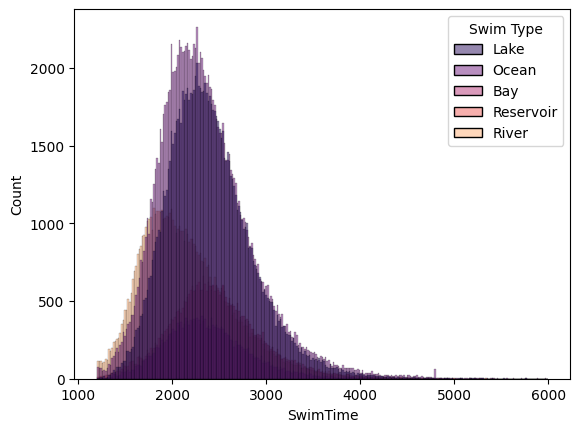

In [30]:
sns.histplot(data=df_merged, x='SwimTime', hue='Swim Type', palette='magma', alpha=0.5)

In [31]:
df_merged.groupby('Swim Type')['SwimTime'].agg('mean').reset_index()

Swim Type     SwimTime
0        Bay  2368.902911
1       Lake  2402.863767
2      Ocean  2357.233408
3  Reservoir  2465.015734
4      River  2166.025400

<Axes: xlabel='BikeTime', ylabel='Count'>

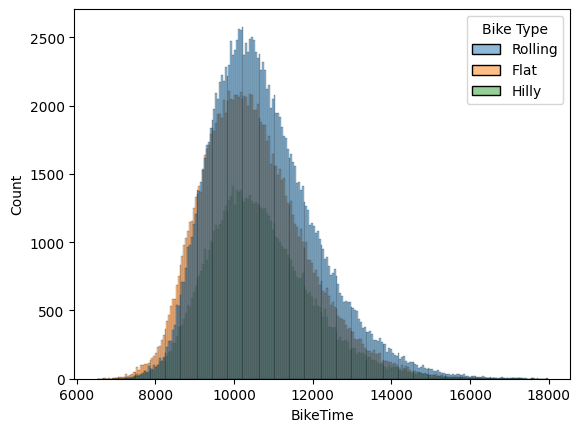

In [32]:
sns.histplot(data=df_merged, x='BikeTime', hue='Bike Type', palette='tab10')

In [33]:
df_merged.groupby('Bike Type')['BikeTime'].agg('mean').reset_index()

Bike Type      BikeTime
0      Flat  10497.462680
1     Hilly  10643.424580
2   Rolling  10752.307546

In [34]:
df_merged

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    35-39       35   Andorra          AD       2019   
1           M    35-39       35   Andorra          AD       2019   
2           M    35-39       35   Andorra          AD       2016   
3           M    45-49       45   Andorra          AD       2016   
4           F    35-39       35   Andorra          AD       2016   
...       ...      ...      ...       ...         ...        ...   
383497      M    50-54       50  Zimbabwe          ZW       2019   
383498      F    18-24       18  Zimbabwe          ZW       2014   
383499      M    40-44       40  Zimbabwe          ZW       2014   
383500      M    25-29       25  Zimbabwe          ZW       2013   
383501      M    30-34       30  Zimbabwe          ZW       2013   

                   EventLocation  SwimTime  Transition1Time  BikeTime  ...  \
0          IRONMAN 70.3 Victoria      2042              159     10931  ...   
1        IRONMAN 70.3 Santa Cruz      1973              343     10197  ...   
2             IRONMAN 70.3 Texas      3133              445     11615  ...   
3          IRONMAN 70.3 Mallorca      2115              265     10410  ...   
4             IRONMAN 70.3 Vichy      2457              252      9998  ...   
...                          ...       ...              ...       ...  ...   
383497  IRONMAN 70.3 Chattanooga      1260              459     10045  ...   
383498        IRONMAN 70.3 Boise      2056              218     11527  ...   
383499     IRONMAN 70.3 San Juan      2171              308      9504  ...   
383500     IRONMAN 70.3 San Juan      2218              311     10933  ...   
383501     IRONMAN 70.3 Eagleman      2623              228     10029  ...   

        FinishTime                    Location  Swim Type Bike Type Run Type  \
0            19655  Victoria, British Columbia       Lake   Rolling     Flat   
1            19627      Santa Cruz, California      Ocean   Rolling     Flat   
2            24580            Galveston, Texas      Ocean      Flat  Rolling   
3            18700    Alcúdia, Mallorca, Spain      Ocean     Hilly     Flat   
4            19462               Vichy, France       Lake     Hilly     Flat   
...            ...                         ...        ...       ...      ...   
383497       20978      Chattanooga, Tennessee      River   Rolling  Rolling   
383498       21020                Boise, Idaho  Reservoir   Rolling     Flat   
383499       20231         San Juan, Argentina  Reservoir     Hilly     Flat   
383500       21014         San Juan, Argentina  Reservoir     Hilly     Flat   
383501       20306         Cambridge, Maryland      River      Flat     Flat   

         Latitude   Longitude  Altitude (m)  Air Temperature (°C)  \
0       48.428318 -123.364953            23                    18   
1       37.050096 -121.990590            11                    18   
2       29.387225  -94.992736             2                    21   
3       39.852045    3.118386            10                    25   
4       46.123927    3.420371           252                    28   
...           ...         ...           ...                   ...   
383497  35.045722  -85.309488           210                    22   
383498  43.616616 -116.200886           820                    27   
383499 -30.705436  -69.198822           598                    25   
383500 -30.705436  -69.198822           598                    25   
383501  38.571462  -76.076318             2                    27   

        Water Temperature (°C)  
0                           19  
1                           17  
2                           22  
3                           17  
4                           25  
...                        ...  
383497                      22  
383498                      22  
383499                      20  
383500                      20  
383501                      24  

[383502 rows x 22 columns]

In [35]:
df_merged.columns

Index(['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear',
       'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Location', 'Swim Type',
       'Bike Type', 'Run Type', 'Latitude', 'Longitude', 'Altitude (m)',
       'Air Temperature (°C)', 'Water Temperature (°C)'],
      dtype='object')

In [36]:
df_merged[df_merged.Latitude.isnull()].Location.unique()

array([], dtype=object)

### Map

In [37]:
# Function to assign a color based on the temperature
def get_color(temperature):
    if temperature <= 18.0:
        return 'blue'
    elif 18.0 < temperature <= 21.0:
        return 'lightblue'
    elif 21.0 < temperature <= 24.0:
        return 'beige'
    elif 24.0 < temperature <= 27.0:
        return 'orange'
    elif 27.0 < temperature <= 30.0:
        return 'red'
    else:
        return 'darkred'  # for temperatures above 30

In [38]:
df_merged.Latitude

0         48.428318
1         37.050096
2         29.387225
3         39.852045
4         46.123927
            ...    
383497    35.045722
383498    43.616616
383499   -30.705436
383500   -30.705436
383501    38.571462
Name: Latitude, Length: 383502, dtype: float64

In [39]:
import folium
import pandas as pd
from branca.colormap import linear

# Create a map centered around the average latitude and longitude
map_center = [df_merged['Latitude'].loc[0], df_merged['Longitude'].loc[0]]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add markers for each location in the DataFrame
for key, grp in df_merged.dropna().groupby('Location'):
    air_temperature = grp['Air Temperature (°C)'].iloc[0]
    color = get_color(air_temperature)
    
    folium.Marker(
        location=[grp['Latitude'].iloc[0], grp['Longitude'].iloc[0]],
        popup=f"Location: {key}<br>EventLocation: {grp['EventLocation'].iloc[0]}<br>Participants: {len(grp)}<br>Air Temperature (°C): {grp['Air Temperature (°C)'].iloc[0]}<br>Water Temperature (°C): {grp['Water Temperature (°C)'].iloc[0]}",
        icon=folium.Icon(icon='fa-sun', color=color)  # Set marker color based on temperature,
    ).add_to(mymap)


# Save the map to an HTML file
# mymap.save("map_air_temp.html")
mymap



### Barplots, num corr

C:\Users\emartin4\AppData\Local\Temp\ipykernel_17856\2781675872.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


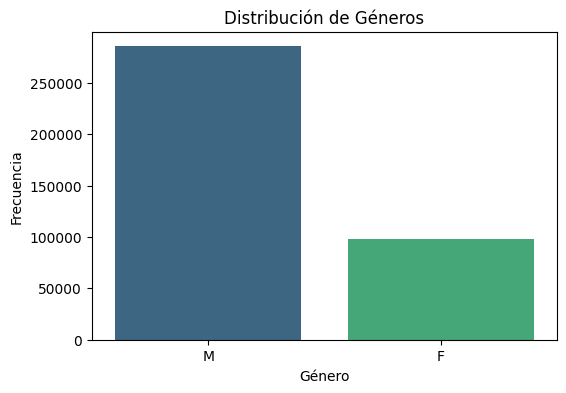

C:\Users\emartin4\AppData\Local\Temp\ipykernel_17856\2781675872.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agegroup_counts.index, y=agegroup_counts.values, palette='magma')


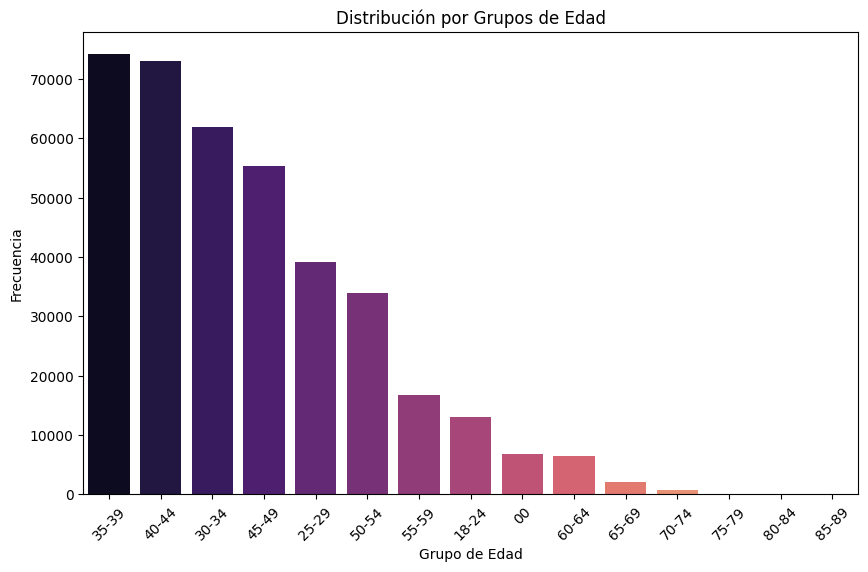

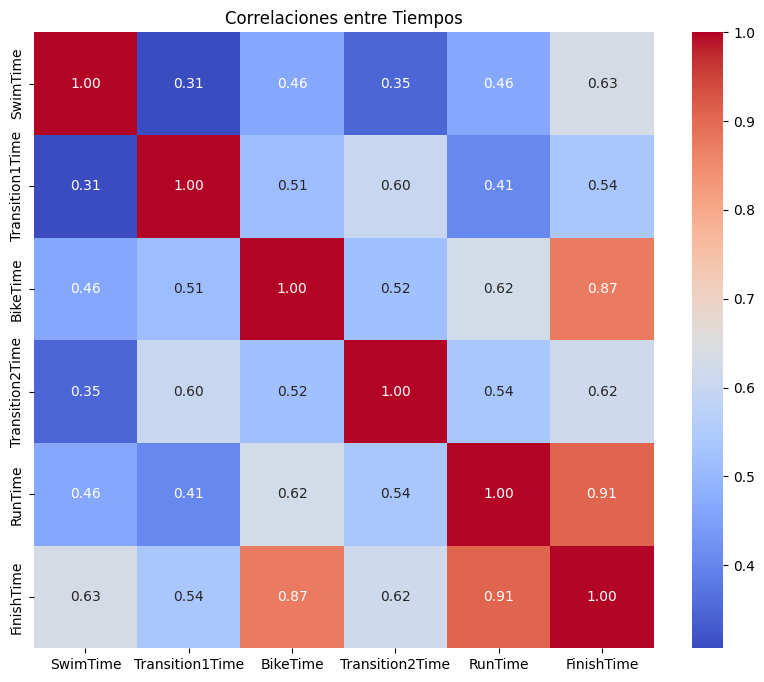

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlación entre tiempos
correlations = df_merged[['SwimTime', 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']].corr()

# Distribución de géneros
gender_counts = df_merged['Gender'].value_counts()

# Distribución de grupos de edad
agegroup_counts = df_merged['AgeGroup'].value_counts()

# Visualización 1: Distribución de géneros
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Visualización 2: Grupos de Edad
plt.figure(figsize=(10, 6))
sns.barplot(x=agegroup_counts.index, y=agegroup_counts.values, palette='magma')
plt.title('Distribución por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Visualización 3: Heatmap de Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre Tiempos')
plt.show()


### Boxplot

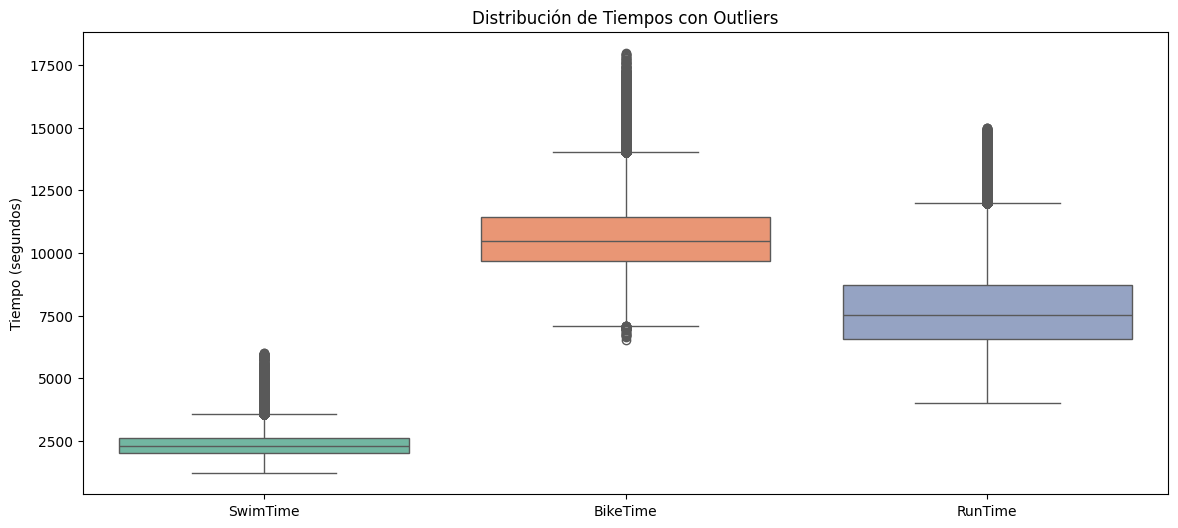

{'SwimTime': 8397, 'BikeTime': 6698, 'RunTime': 5311}

In [41]:
# Detectar outliers en tiempos usando el rango intercuartílico (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_merged[(df_merged[column] < lower_bound) | (df_merged[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_swim, lb_swim, ub_swim = detect_outliers(df_merged, 'SwimTime')
outliers_bike, lb_bike, ub_bike = detect_outliers(df_merged, 'BikeTime')
outliers_run, lb_run, ub_run = detect_outliers(df_merged, 'RunTime')

# Contar outliers en cada tiempo
outliers_counts = {
    "SwimTime": len(outliers_swim),
    "BikeTime": len(outliers_bike),
    "RunTime": len(outliers_run)
}

# Visualización de tiempos con y sin outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_merged[['SwimTime', 'BikeTime', 'RunTime']], palette='Set2')
plt.title('Distribución de Tiempos con Outliers')
plt.ylabel('Tiempo (segundos)')
plt.show()

outliers_counts

In [42]:
cities = sorted(df_merged.Location.unique())
cities

['Alcúdia, Mallorca, Spain',
 'Augusta, Georgia',
 'Augusta, Maine',
 'Bahrain, Middle East',
 'Boise, Idaho',
 'Boulder, Colorado',
 'Brasilia, Brazil',
 'Buenos Aires, Argentina',
 'Cairns, Queensland',
 'Calgary, Alberta',
 'Cambridge, Maryland',
 'Campeche, Mexico',
 'Cartagena, Colombia',
 'Chattanooga, Tennessee',
 "Coeur d'Alene, Idaho",
 'Cozumel, Mexico',
 'Da Nang, Viet Nam',
 'Davao City, Philippines',
 'Dorset, England',
 'Florianopolis, Brazil',
 'Fortaleza, Brazil',
 'Galveston, Texas',
 'Gdynia, Poland',
 'Geelong, Victoria',
 'Goseong, Korea',
 'Haines City, Florida',
 'Huntsville, Ontario',
 'India',
 'Indian Wells, California',
 'Kohala Coast, Hawaii',
 'Kraichgau, Baden-Württemberg, Germany',
 'Kwa Zulu Natal',
 'Langkawi, Malaysia',
 'Lima, Perú',
 'Los Cabos, Mexico',
 'Madison, Wisconsin',
 'Manta, Manabi',
 'Marbella, Spain',
 'Monterrey, Mexico',
 'Mooloolaba, Queensland',
 'Muncie, Indiana',
 'Muscat, Oman',
 'Nice, France',
 'Oceanside, California',
 'Panama C

In [43]:
# Mapeo de ciudades sin país directo a su país correspondiente
city_to_country = {
    'Augusta, Georgia': 'United States',
    'Augusta, Maine': 'United States',
    'Cambridge, Maryland': 'United States',
    'Brasilia, Brazil': 'Brazil',
    'Buenos Aires, Argentina': 'Argentina',
    'Cairns, Queensland': 'Australia',
    'Calgary, Alberta': 'Canada',
    'Campeche, Mexico': 'Mexico',
    'Cartagena, Colombia': 'Colombia',
    'Chattanooga, Tennessee': 'United States',
    'Coeur d\'Alene, Idaho': 'United States',
    'Cozumel, Mexico': 'Mexico',
    'Da Nang, Viet Nam': 'Vietnam',
    'Davao City, Philippines': 'Philippines',
    'Dorset, England': 'United Kingdom',
    'Florianopolis, Brazil': 'Brazil',
    'Fortaleza, Brazil': 'Brazil',
    'Galveston, Texas': 'United States',
    'Gdynia, Poland': 'Poland',
    'Geelong, Victoria': 'Australia',
    'Goseong, Korea': 'South Korea',
    'Haines City, Florida': 'United States',
    'Huntsville, Ontario': 'Canada',
    'India': 'India',
    'Indian Wells, California': 'United States',
    'Kohala Coast, Hawaii': 'United States',
    'Kraichgau, Baden-Württemberg, Germany': 'Germany',
    'Kwa Zulu Natal': 'South Africa',
    'Langkawi, Malaysia': 'Malaysia',
    'Lima, Perú': 'Peru',
    'Los Cabos, Mexico': 'Mexico',
    'Madison, Wisconsin': 'United States',
    'Manta, Manabi': 'Ecuador',
    'Marbella, Spain': 'Spain',
    'Monterrey, Mexico': 'Mexico',
    'Mooloolaba, Queensland': 'Australia',
    'Muncie, Indiana': 'United States',
    'Muscat, Oman': 'Oman',
    'Nice, France': 'France',
    'Oceanside, California': 'United States',
    'Panama City Beach, Florida': 'United States',
    'Panamá City, Panamá': 'Panama',
    'Penrith, New South Wales': 'Australia',
    'Port Macquarie, New South Wales': 'Australia',
    'Pucon, Chile': 'Chile',
    'Punta del Este, Uruguay': 'Uruguay',
    'Rapperswil-Jona, Switzerland': 'Switzerland',
    'Region Moselle, Luxembourg': 'Luxembourg',
    'Rio de Janeiro, Brazil': 'Brazil',
    'San Juan, Argentina': 'Argentina',
    'San Juan, Puerto Rico, United States Territory': 'United States',
    'Sandusky, Ohio': 'United States',
    'Santa Cruz, California': 'United States',
    'Sao Paulo, Brazil': 'Brazil',
    'Subic Bay, Philippines': 'Philippines',
    'Tahara City, Toyohashi City, Japan': 'Japan',
    'Tahara City, Toyohashi City, Japan&nbsp;': 'Japan',
    'Tallinn, Estonia': 'Estonia',
    'Taupo, New Zealand': 'New Zealand',
    'Taupo, Waikato': 'New Zealand',
    'Vichy, France': 'France',
    'Victoria, British Columbia': 'Canada',
    'Waco, Texas': 'United States',
    'Wilmington, North Carolina': 'United States',
    'Zell am See, Austria': 'Austria',
    'Boise, Idaho': 'United States',  # Corrected
    'Boulder, Colorado': 'United States'  # Added to fix
}
# Función para extraer el país de una ciudad
def extract_country(city):
    if city in city_to_country:
        return city_to_country[city]
    else:
        # If city is not in the mapping, attempt to extract from last part (after the last comma)
        return city.split(',')[-1].strip()


# Apply the extract_country function to get the countries for each city
df_merged['EventCountry'] = df_merged['Location'].apply(extract_country)
df_merged

Gender AgeGroup  AgeBand   Country CountryISO2  EventYear  \
0           M    35-39       35   Andorra          AD       2019   
1           M    35-39       35   Andorra          AD       2019   
2           M    35-39       35   Andorra          AD       2016   
3           M    45-49       45   Andorra          AD       2016   
4           F    35-39       35   Andorra          AD       2016   
...       ...      ...      ...       ...         ...        ...   
383497      M    50-54       50  Zimbabwe          ZW       2019   
383498      F    18-24       18  Zimbabwe          ZW       2014   
383499      M    40-44       40  Zimbabwe          ZW       2014   
383500      M    25-29       25  Zimbabwe          ZW       2013   
383501      M    30-34       30  Zimbabwe          ZW       2013   

                   EventLocation  SwimTime  Transition1Time  BikeTime  ...  \
0          IRONMAN 70.3 Victoria      2042              159     10931  ...   
1        IRONMAN 70.3 Santa Cruz      1973              343     10197  ...   
2             IRONMAN 70.3 Texas      3133              445     11615  ...   
3          IRONMAN 70.3 Mallorca      2115              265     10410  ...   
4             IRONMAN 70.3 Vichy      2457              252      9998  ...   
...                          ...       ...              ...       ...  ...   
383497  IRONMAN 70.3 Chattanooga      1260              459     10045  ...   
383498        IRONMAN 70.3 Boise      2056              218     11527  ...   
383499     IRONMAN 70.3 San Juan      2171              308      9504  ...   
383500     IRONMAN 70.3 San Juan      2218              311     10933  ...   
383501     IRONMAN 70.3 Eagleman      2623              228     10029  ...   

                          Location  Swim Type  Bike Type Run Type   Latitude  \
0       Victoria, British Columbia       Lake    Rolling     Flat  48.428318   
1           Santa Cruz, California      Ocean    Rolling     Flat  37.050096   
2                 Galveston, Texas      Ocean       Flat  Rolling  29.387225   
3         Alcúdia, Mallorca, Spain      Ocean      Hilly     Flat  39.852045   
4                    Vichy, France       Lake      Hilly     Flat  46.123927   
...                            ...        ...        ...      ...        ...   
383497      Chattanooga, Tennessee      River    Rolling  Rolling  35.045722   
383498                Boise, Idaho  Reservoir    Rolling     Flat  43.616616   
383499         San Juan, Argentina  Reservoir      Hilly     Flat -30.705436   
383500         San Juan, Argentina  Reservoir      Hilly     Flat -30.705436   
383501         Cambridge, Maryland      River       Flat     Flat  38.571462   

         Longitude Altitude (m)  Air Temperature (°C)  Water Temperature (°C)  \
0      -123.364953           23                    18                      19   
1      -121.990590           11                    18                      17   
2       -94.992736            2                    21                      22   
3         3.118386           10                    25                      17   
4         3.420371          252                    28                      25   
...            ...          ...                   ...                     ...   
383497  -85.309488          210                    22                      22   
383498 -116.200886          820                    27                      22   
383499  -69.198822          598                    25                      20   
383500  -69.198822          598                    25                      20   
383501  -76.076318            2                    27                      24   

         EventCountry  
0              Canada  
1       United States  
2       United States  
3               Spain  
4              France  
...               ...  
383497  United States  
383498  United States  
383499      Argentina  
383500      Argentina  
383501  United States  

[383502 rows x 23 columns]

In [44]:
tmp = df_merged[['Location', 'EventCountry']].drop_duplicates()

In [45]:
df_events_cnt_country = df_merged.groupby(['EventLocation', 'EventCountry']).size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)
df_events_cnt_country

EventLocation   EventCountry  Counts
0                  IRONMAN 70.3 Augusta  United States   23803
16                 IRONMAN 70.3 Florida  United States   22576
58                   IRONMAN 70.3 Texas  United States   17168
13                IRONMAN 70.3 Eagleman  United States   16618
31                IRONMAN 70.3 Mallorca          Spain   16307
..                                  ...            ...     ...
62                    IRONMAN 70.3 Waco  United States     868
50  IRONMAN 70.3 San Juan / Puerto Rico  United States     778
53               IRONMAN 70.3 Subic Bay    Philippines     465
56                 IRONMAN 70.3 Tallinn        Estonia     452
20                     IRONMAN 70.3 Goa          India     417

[68 rows x 3 columns]

<Figure size 1000x200 with 0 Axes>

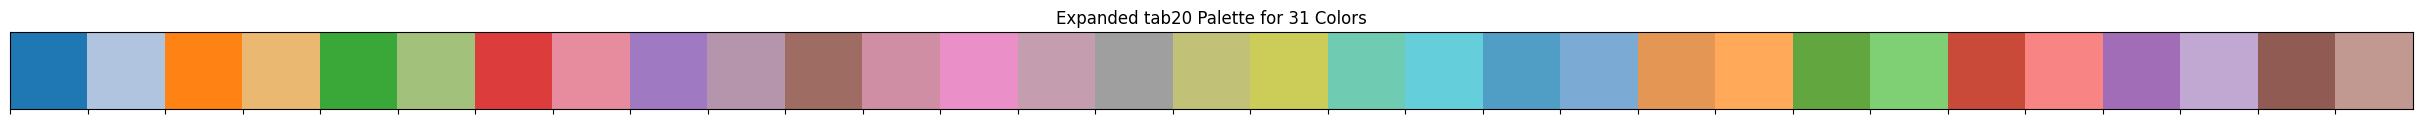

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the original tab20 palette
tab20 = plt.cm.tab20.colors

# Interpolate the tab20 palette to get 31 colors
expanded_palette = [tuple(np.array(tab20[i % 20]) * (1 - i/31) + np.array(tab20[(i + 1) % 20]) * (i/31)) for i in range(31)]

# Plot the expanded palette
plt.figure(figsize=(10, 2))
sns.palplot(expanded_palette)
plt.title("Expanded tab20 Palette for 31 Colors")
plt.show()


Text(0.5, 1.0, 'Participants by EventLocation')

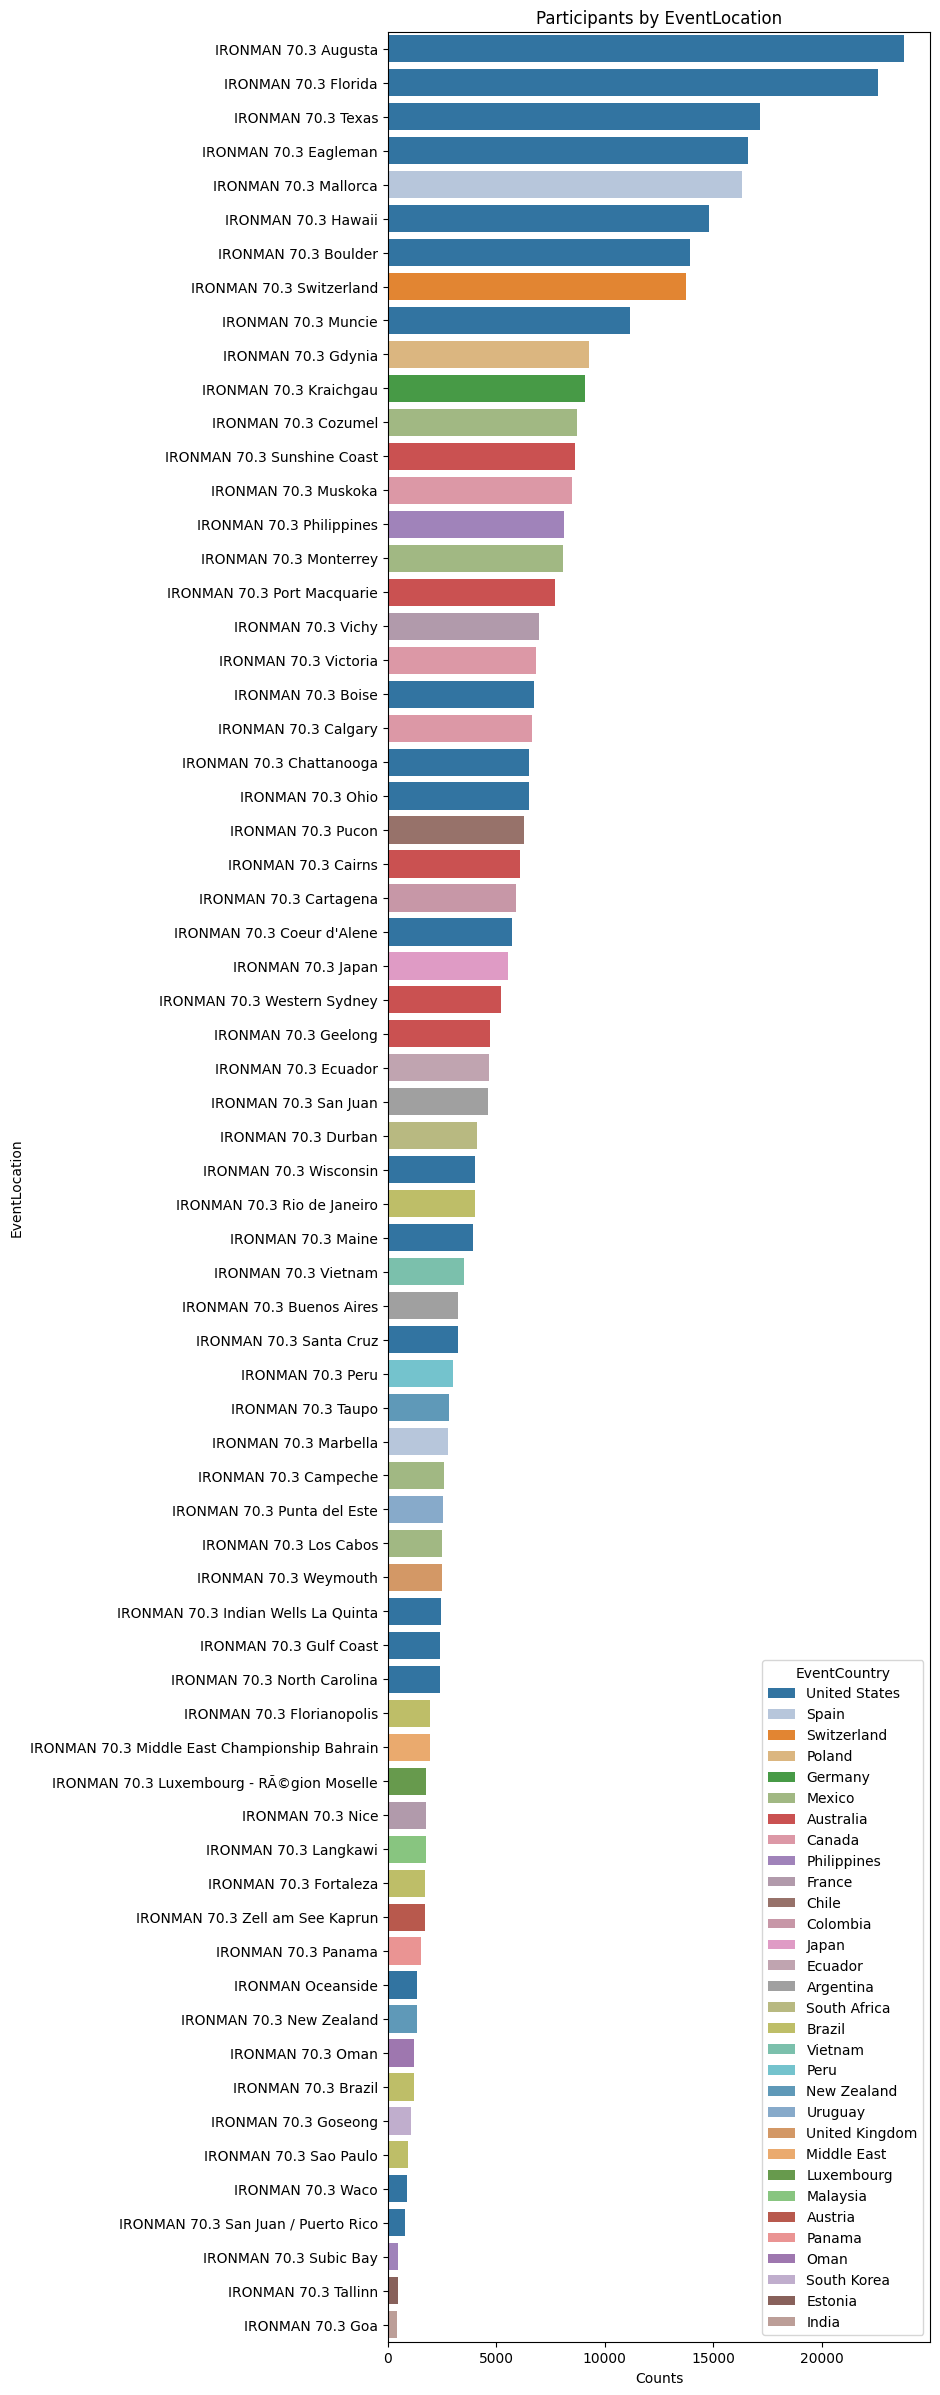

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,30))
sns.barplot(data=df_events_cnt_country, x='Counts', y='EventLocation', hue='EventCountry', orient='h', palette=expanded_palette)
plt.title("Participants by EventLocation")

In [48]:
df_events_cnt_year = df_merged.groupby(['EventYear', 'EventLocation']).size().reset_index(name='CountsYear').sort_values(by=['EventYear', 'EventLocation'], ascending=True)
df_events_cnt_year

EventYear                EventLocation  CountsYear
0         2004         IRONMAN 70.3 Florida        1572
1         2005         IRONMAN 70.3 Florida        1441
2         2005            IRONMAN Oceanside        1347
3         2006        IRONMAN 70.3 Eagleman        1231
4         2006         IRONMAN 70.3 Florida        1750
..         ...                          ...         ...
331       2020      IRONMAN 70.3 Gulf Coast         157
332       2020     IRONMAN 70.3 New Zealand         658
333       2020            IRONMAN 70.3 Oman         606
334       2020  IRONMAN 70.3 Sunshine Coast         697
335       2020         IRONMAN 70.3 Tallinn         452

[336 rows x 3 columns]

### Pivot Tables and Barh Plots (Country and EventLocation)

In [49]:
df_events_cnt_year['EventYear'] = df_events_cnt_year['EventYear'].astype(int)

In [50]:
df_events_cnt_year = df_events_cnt_year.merge(df_events_cnt_country).sort_values(['Counts','EventLocation'], ascending=False)
df_events_cnt_year.head(40)

EventYear          EventLocation  CountsYear   EventCountry  Counts
12        2009   IRONMAN 70.3 Augusta        2364  United States   23803
16        2010   IRONMAN 70.3 Augusta        2285  United States   23803
26        2011   IRONMAN 70.3 Augusta        2407  United States   23803
40        2012   IRONMAN 70.3 Augusta        2448  United States   23803
57        2013   IRONMAN 70.3 Augusta        2235  United States   23803
75        2014   IRONMAN 70.3 Augusta        2087  United States   23803
99        2015   IRONMAN 70.3 Augusta        2086  United States   23803
133       2016   IRONMAN 70.3 Augusta        1805  United States   23803
172       2017   IRONMAN 70.3 Augusta        1921  United States   23803
219       2018   IRONMAN 70.3 Augusta        2140  United States   23803
268       2019   IRONMAN 70.3 Augusta        2025  United States   23803
0         2004   IRONMAN 70.3 Florida        1572  United States   22576
1         2005   IRONMAN 70.3 Florida        1441  United States   22576
4         2006   IRONMAN 70.3 Florida        1750  United States   22576
7         2007   IRONMAN 70.3 Florida        1852  United States   22576
10        2008   IRONMAN 70.3 Florida        1799  United States   22576
21        2010   IRONMAN 70.3 Florida        1765  United States   22576
31        2011   IRONMAN 70.3 Florida        1598  United States   22576
45        2012   IRONMAN 70.3 Florida        1606  United States   22576
63        2013   IRONMAN 70.3 Florida        1173  United States   22576
83        2014   IRONMAN 70.3 Florida        1453  United States   22576
110       2015   IRONMAN 70.3 Florida        1349  United States   22576
144       2016   IRONMAN 70.3 Florida        1425  United States   22576
185       2017   IRONMAN 70.3 Florida        1296  United States   22576
232       2018   IRONMAN 70.3 Florida        1394  United States   22576
280       2019   IRONMAN 70.3 Florida        1103  United States   22576
25        2010     IRONMAN 70.3 Texas        1276  United States   17168
39        2011     IRONMAN 70.3 Texas        1728  United States   17168
56        2012     IRONMAN 70.3 Texas        2079  United States   17168
74        2013     IRONMAN 70.3 Texas        1965  United States   17168
96        2014     IRONMAN 70.3 Texas        1933  United States   17168
128       2015     IRONMAN 70.3 Texas        2006  United States   17168
166       2016     IRONMAN 70.3 Texas        2081  United States   17168
213       2017     IRONMAN 70.3 Texas        2000  United States   17168
261       2018     IRONMAN 70.3 Texas        1763  United States   17168
317       2019     IRONMAN 70.3 Texas         337  United States   17168
3         2006  IRONMAN 70.3 Eagleman        1231  United States   16618
6         2007  IRONMAN 70.3 Eagleman        1425  United States   16618
20        2010  IRONMAN 70.3 Eagleman        1504  United States   16618
30        2011  IRONMAN 70.3 Eagleman        1602  United States   16618

In [51]:
df_events_cnt_year[df_events_cnt_year['EventLocation'] == 'IRONMAN 70.3 Augusta']

EventYear         EventLocation  CountsYear   EventCountry  Counts
12        2009  IRONMAN 70.3 Augusta        2364  United States   23803
16        2010  IRONMAN 70.3 Augusta        2285  United States   23803
26        2011  IRONMAN 70.3 Augusta        2407  United States   23803
40        2012  IRONMAN 70.3 Augusta        2448  United States   23803
57        2013  IRONMAN 70.3 Augusta        2235  United States   23803
75        2014  IRONMAN 70.3 Augusta        2087  United States   23803
99        2015  IRONMAN 70.3 Augusta        2086  United States   23803
133       2016  IRONMAN 70.3 Augusta        1805  United States   23803
172       2017  IRONMAN 70.3 Augusta        1921  United States   23803
219       2018  IRONMAN 70.3 Augusta        2140  United States   23803
268       2019  IRONMAN 70.3 Augusta        2025  United States   23803

In [52]:
# Crear una tabla pivot para preparar los datos para el gráfico apilado
pivot_data = df_events_cnt_year.pivot_table(index='EventLocation',columns='EventYear',values='CountsYear',aggfunc='sum',fill_value=0)
pivot_data

EventYear                        2004  2005  2006  2007  2008  2009  2010  \
EventLocation                                                               
IRONMAN 70.3 Augusta                0     0     0     0     0  2364  2285   
IRONMAN 70.3 Boise                  0     0     0     0   797  1137  1058   
IRONMAN 70.3 Boulder                0     0     0     0     0     0  1143   
IRONMAN 70.3 Brazil                 0     0     0     0     0     0     0   
IRONMAN 70.3 Buenos Aires           0     0     0     0     0     0     0   
...                               ...   ...   ...   ...   ...   ...   ...   
IRONMAN 70.3 Western Sydney         0     0     0     0     0     0     0   
IRONMAN 70.3 Weymouth               0     0     0     0     0     0     0   
IRONMAN 70.3 Wisconsin              0     0     0     0     0     0     0   
IRONMAN 70.3 Zell am See Kaprun     0     0     0     0     0     0     0   
IRONMAN Oceanside                   0  1347     0     0     0     0     0   

EventYear                        2011  2012  2013  2014  2015  2016  2017  \
EventLocation                                                               
IRONMAN 70.3 Augusta             2407  2448  2235  2087  2086  1805  1921   
IRONMAN 70.3 Boise               1013     0   860  1054   810     0     0   
IRONMAN 70.3 Boulder             1255  1241  1413  1312  1462  1444  1736   
IRONMAN 70.3 Brazil                 0     0     0   412   793     0     0   
IRONMAN 70.3 Buenos Aires           0     0     0     0     0  1499  1743   
...                               ...   ...   ...   ...   ...   ...   ...   
IRONMAN 70.3 Western Sydney         0     0     0  1158  1036   803     0   
IRONMAN 70.3 Weymouth               0     0     0     0     0   756   966   
IRONMAN 70.3 Wisconsin              0     0     0     0     0     0  1519   
IRONMAN 70.3 Zell am See Kaprun     0     0     0     0     0     0     0   
IRONMAN Oceanside                   0     0     0     0     0     0     0   

EventYear                        2018  2019  2020  
EventLocation                                      
IRONMAN 70.3 Augusta             2140  2025     0  
IRONMAN 70.3 Boise                  0     0     0  
IRONMAN 70.3 Boulder             1320  1606     0  
IRONMAN 70.3 Brazil                 0     0     0  
IRONMAN 70.3 Buenos Aires           0     0     0  
...                               ...   ...   ...  
IRONMAN 70.3 Western Sydney       960  1263     0  
IRONMAN 70.3 Weymouth             444   332     0  
IRONMAN 70.3 Wisconsin           1040  1480     0  
IRONMAN 70.3 Zell am See Kaprun     0  1699     0  
IRONMAN Oceanside                   0     0     0  

[68 rows x 17 columns]

In [53]:
pivot_data

EventYear                        2004  2005  2006  2007  2008  2009  2010  \
EventLocation                                                               
IRONMAN 70.3 Augusta                0     0     0     0     0  2364  2285   
IRONMAN 70.3 Boise                  0     0     0     0   797  1137  1058   
IRONMAN 70.3 Boulder                0     0     0     0     0     0  1143   
IRONMAN 70.3 Brazil                 0     0     0     0     0     0     0   
IRONMAN 70.3 Buenos Aires           0     0     0     0     0     0     0   
...                               ...   ...   ...   ...   ...   ...   ...   
IRONMAN 70.3 Western Sydney         0     0     0     0     0     0     0   
IRONMAN 70.3 Weymouth               0     0     0     0     0     0     0   
IRONMAN 70.3 Wisconsin              0     0     0     0     0     0     0   
IRONMAN 70.3 Zell am See Kaprun     0     0     0     0     0     0     0   
IRONMAN Oceanside                   0  1347     0     0     0     0     0   

EventYear                        2011  2012  2013  2014  2015  2016  2017  \
EventLocation                                                               
IRONMAN 70.3 Augusta             2407  2448  2235  2087  2086  1805  1921   
IRONMAN 70.3 Boise               1013     0   860  1054   810     0     0   
IRONMAN 70.3 Boulder             1255  1241  1413  1312  1462  1444  1736   
IRONMAN 70.3 Brazil                 0     0     0   412   793     0     0   
IRONMAN 70.3 Buenos Aires           0     0     0     0     0  1499  1743   
...                               ...   ...   ...   ...   ...   ...   ...   
IRONMAN 70.3 Western Sydney         0     0     0  1158  1036   803     0   
IRONMAN 70.3 Weymouth               0     0     0     0     0   756   966   
IRONMAN 70.3 Wisconsin              0     0     0     0     0     0  1519   
IRONMAN 70.3 Zell am See Kaprun     0     0     0     0     0     0     0   
IRONMAN Oceanside                   0     0     0     0     0     0     0   

EventYear                        2018  2019  2020  
EventLocation                                      
IRONMAN 70.3 Augusta             2140  2025     0  
IRONMAN 70.3 Boise                  0     0     0  
IRONMAN 70.3 Boulder             1320  1606     0  
IRONMAN 70.3 Brazil                 0     0     0  
IRONMAN 70.3 Buenos Aires           0     0     0  
...                               ...   ...   ...  
IRONMAN 70.3 Western Sydney       960  1263     0  
IRONMAN 70.3 Weymouth             444   332     0  
IRONMAN 70.3 Wisconsin           1040  1480     0  
IRONMAN 70.3 Zell am See Kaprun     0  1699     0  
IRONMAN Oceanside                   0     0     0  

[68 rows x 17 columns]

<Figure size 1000x2000 with 0 Axes>

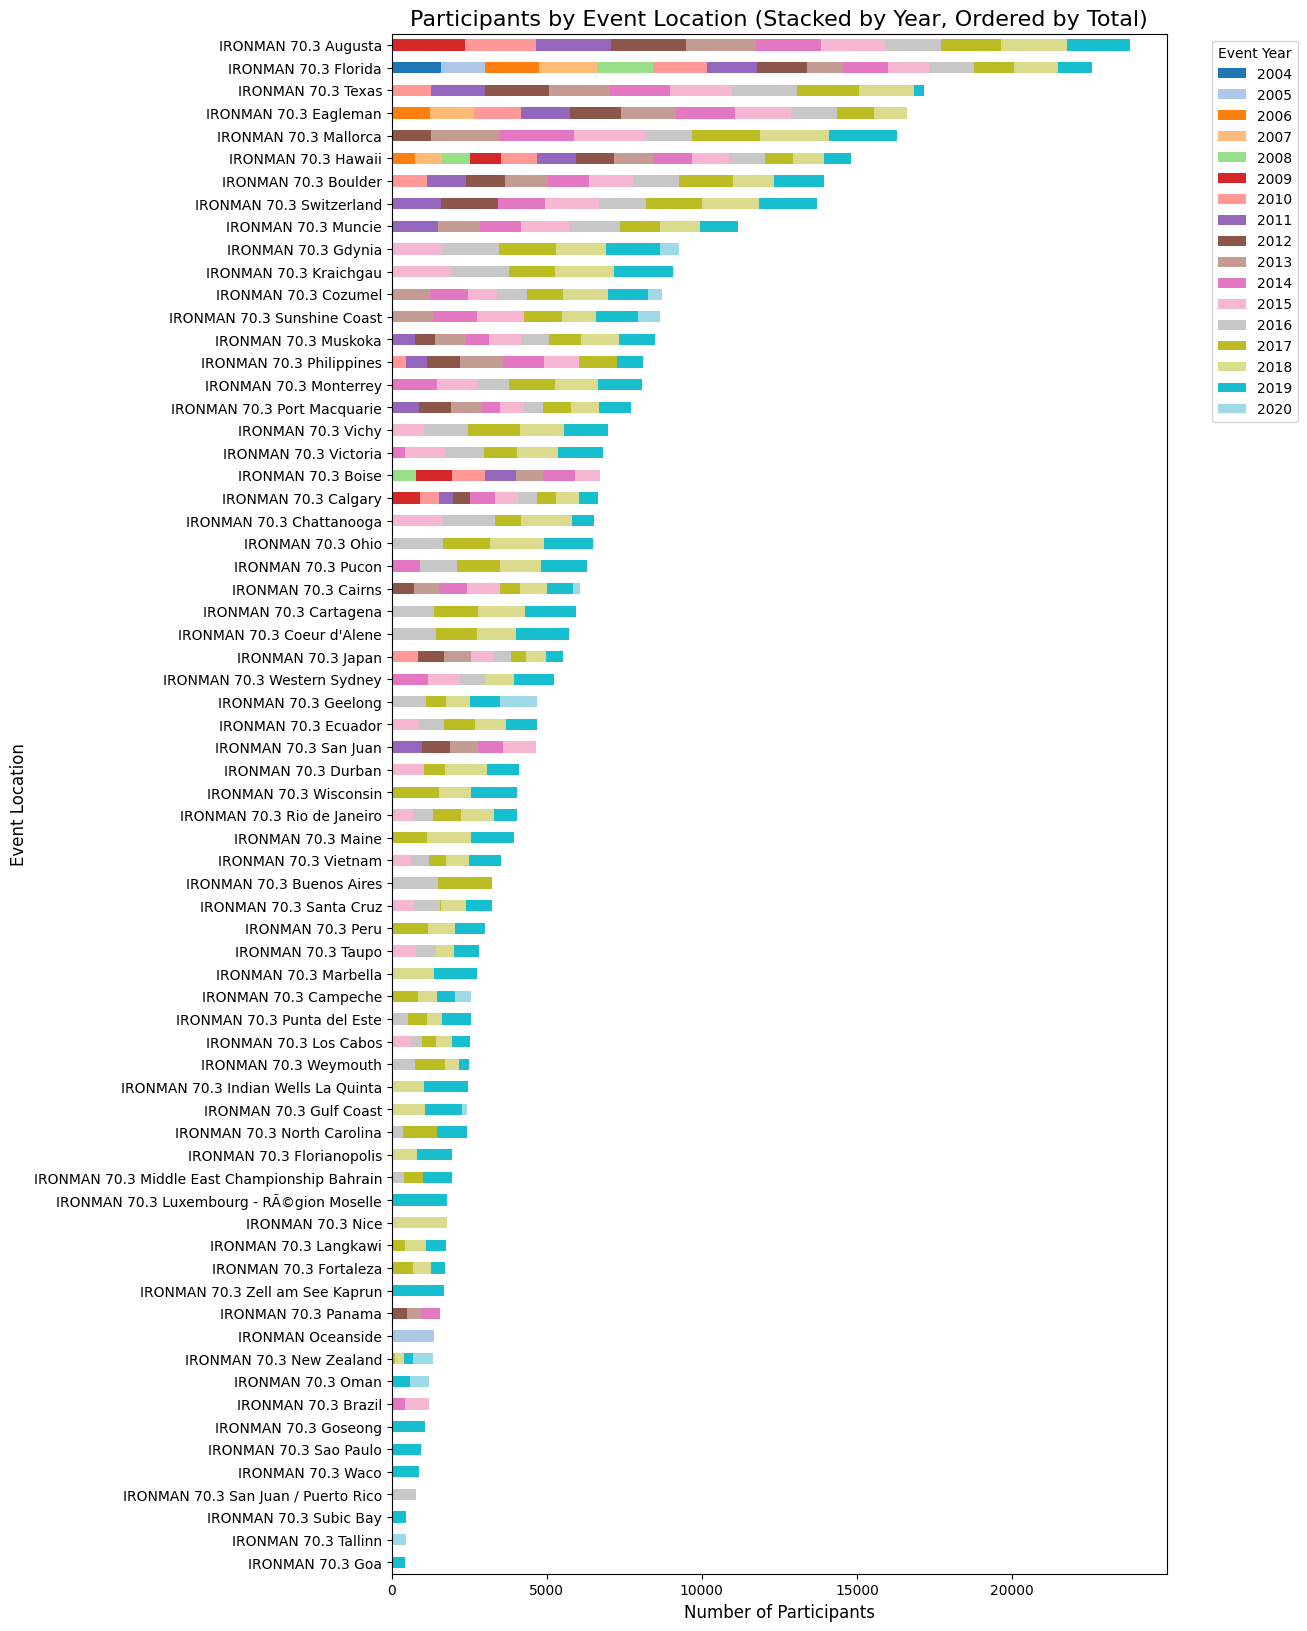

In [54]:
# Calcular el total por ubicación y ordenar de mayor a menor
pivot_data['TotalCounts'] = pivot_data.sum(axis=1)  # Sumar las columnas (años) para cada ubicación
pivot_data = pivot_data.sort_values('TotalCounts', ascending=True).drop(columns='TotalCounts')  # Ordenar y quitar columna auxiliar
# Crear el gráfico apilado
plt.figure(figsize=(10, 20))
pivot_data.plot(
    kind='barh',  # Gráfico de barras horizontales
    stacked=True,  # Apilar las barras
    figsize=(10, 20),
    colormap='tab20'  # Paleta de colores
)
# Personalización del gráfico
plt.title("Participants by Event Location (Stacked by Year, Ordered by Total)", fontsize=16)
plt.xlabel("Number of Participants", fontsize=12)
plt.ylabel("Event Location", fontsize=12)
plt.legend(title="Event Year", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()  # Ajustar diseño
plt.show()

<Figure size 1000x2000 with 0 Axes>

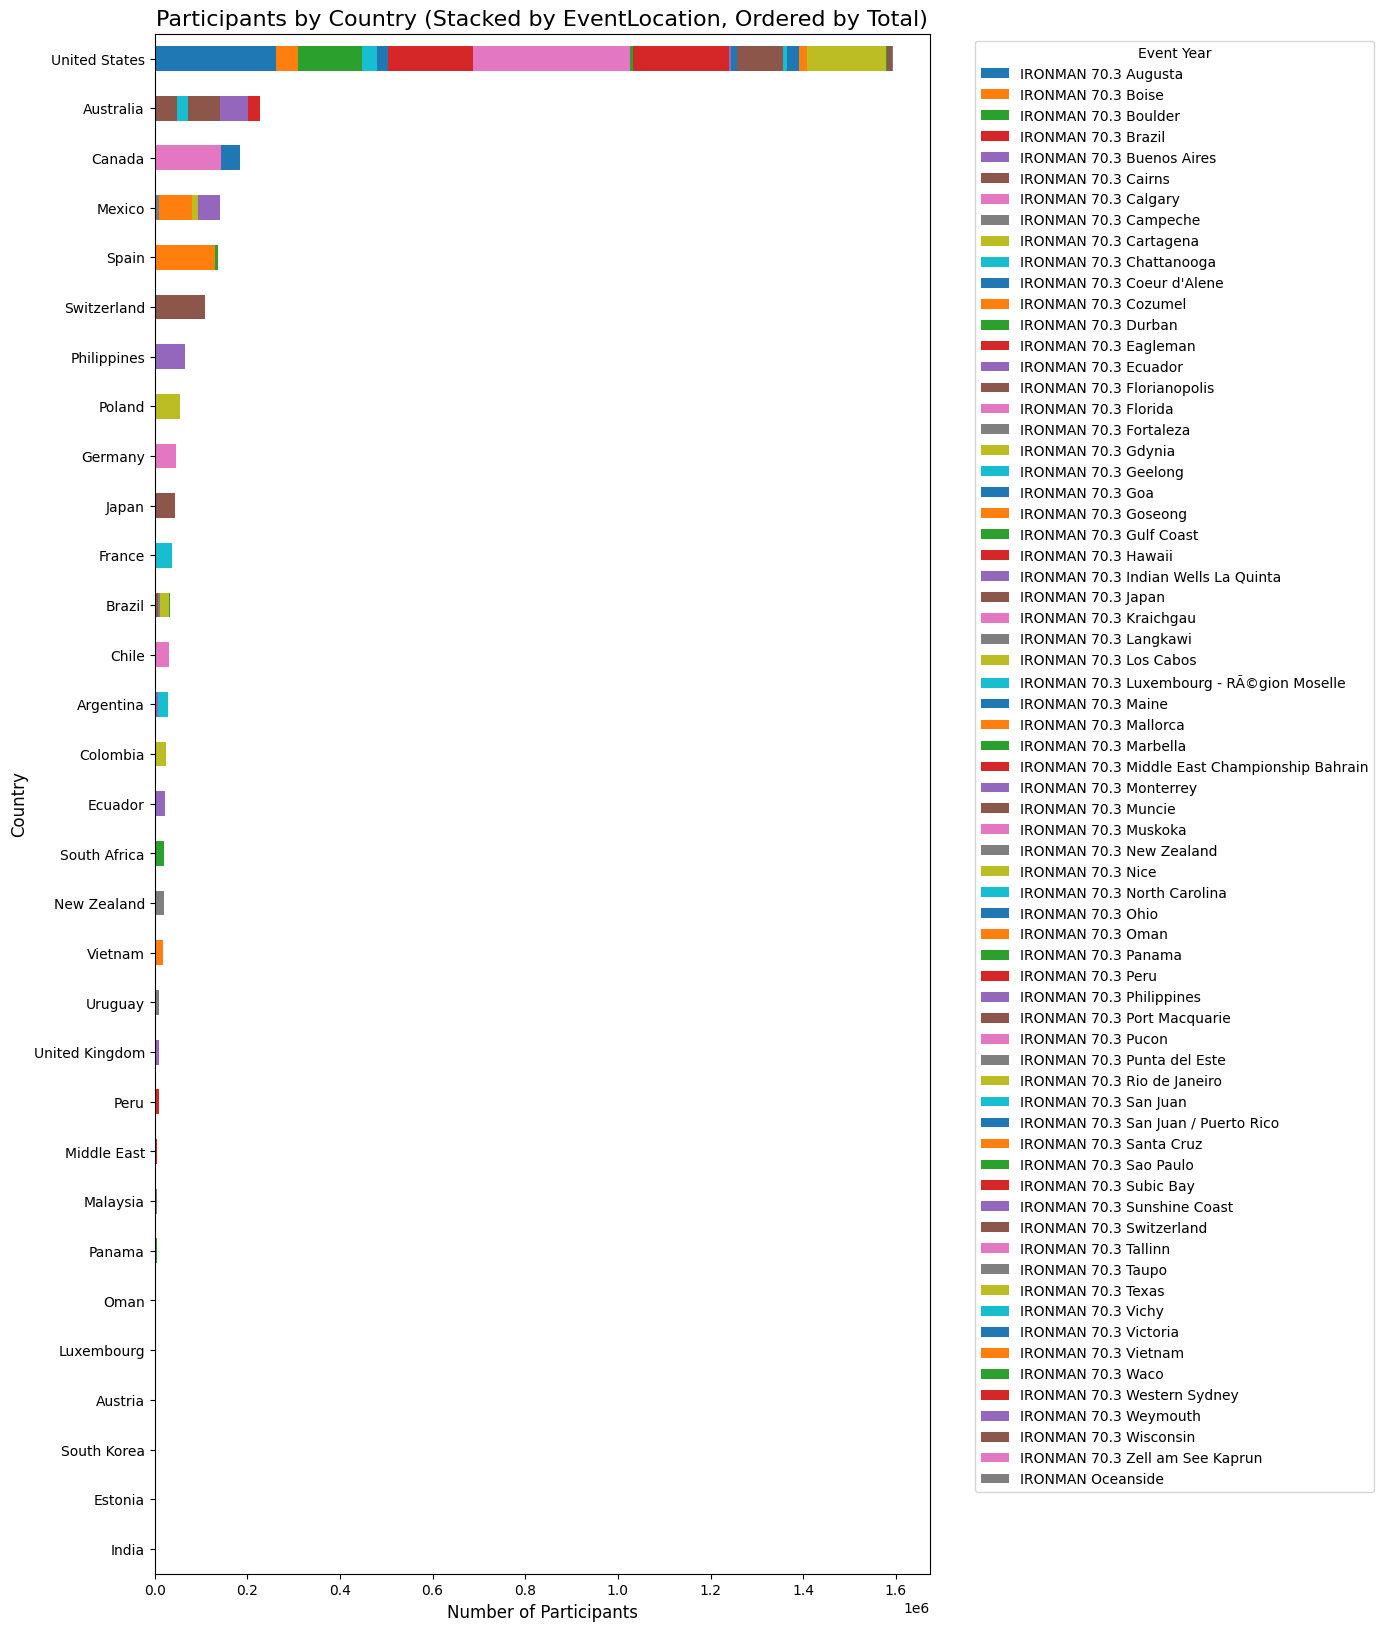

In [55]:
# Crear una tabla pivot para preparar los datos para el gráfico apilado
pivot_data_country = df_events_cnt_year.pivot_table(index='EventCountry',columns='EventLocation',values='Counts',aggfunc='sum',fill_value=0)

# Calcular el total por ubicación y ordenar de mayor a menor
pivot_data_country['TotalCounts'] = pivot_data_country.sum(axis=1)  # Sumar las columnas (años) para cada ubicación
pivot_data_country = pivot_data_country.sort_values('TotalCounts', ascending=True).drop(columns='TotalCounts')  # Ordenar y quitar columna auxiliar
# Crear el gráfico apilado
plt.figure(figsize=(10, 20))
pivot_data_country.plot(
    kind='barh',  # Gráfico de barras horizontales
    stacked=True,  # Apilar las barras
    figsize=(10, 20),
    # colormap='tab20'  # Paleta de colores
)
# Personalización del gráfico
plt.title("Participants by Country (Stacked by EventLocation, Ordered by Total)", fontsize=16)
plt.xlabel("Number of Participants", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Event Year", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()  # Ajustar diseño
plt.show()

### Boxplots by Nationalities

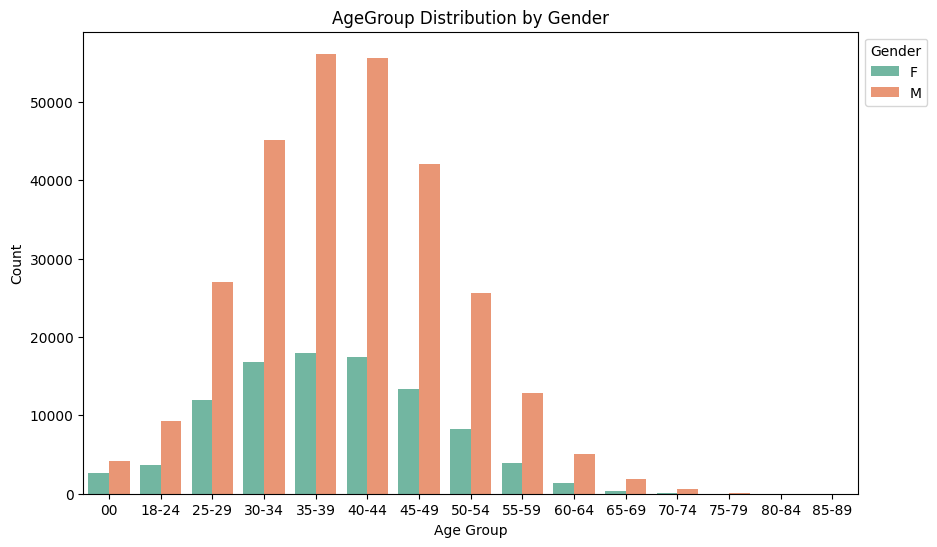

In [56]:
# Crear un countplot para la distribución de AgeBand por Gender y Country
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Gender', data=df_merged.sort_values('AgeGroup'), palette='Set2', dodge=True)

# Personalizar el gráfico
plt.title("AgeGroup Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Mostrar la leyenda correctamente
plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'TOP 20 Nationalities')

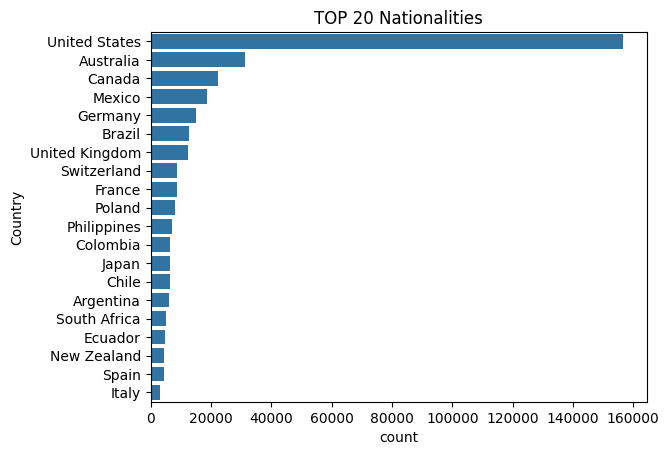

In [57]:
# plt.figure(figsize=(7, 35))
df_nationalities_cnt = df_merged.Country.value_counts().reset_index()
sns.barplot(data=df_nationalities_cnt.head(20), x='count', y='Country', orient='h')
plt.title('TOP 20 Nationalities')

# Categorical Variables (Label Encoder, One Hot Encoder)

In [58]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# 1. Crear un diccionari amb els centres geogràfics de cada país
def get_country_centers(countries):
    """
    Obté el centre geogràfic (latitud, longitud) per a una llista de països utilitzant Geopy.
    """
    geolocator = Nominatim(user_agent="geoapi")
    country_centers = {}
    for country in countries:
        try:
            location = geolocator.geocode(country)
            if location:
                country_centers[country] = (location.latitude, location.longitude)
        except Exception as e:
            print(f"Error al trobar el centre geogràfic de {country}: {e}")
            country_centers[country] = None
    return country_centers

# 2. Llista única de països del DataFrame
unique_countries = df_merged['Country'].unique()

# 3. Obtenir els centres geogràfics per als països del DataFrame
country_centers = get_country_centers(unique_countries)


In [59]:
country_centers

{'Andorra': (42.5407167, 1.5732033),
 'United Arab Emirates': (24.0002488, 53.9994829),
 'Afghanistan': (33.7680065, 66.2385139),
 'Antigua and Barbuda': (17.2234721, -61.9554608),
 'Anguilla': (18.1954947, -63.0750234),
 'Albania': (5.7587654, -73.9151617),
 'Armenia': (4.536307, -75.6723751),
 'Angola': (-11.8775768, 17.5691241),
 'Antarctica': (-72.8438691, 0.0),
 'Argentina': (-34.9964963, -64.9672817),
 'American Samoa': (-14.297124, -170.7131481),
 'Austria': (47.59397, 14.12456),
 'Australia': (-24.7761086, 134.755),
 'Aruba': (12.5013629, -69.9618475),
 'Aland Islands': (60.2166218, 19.9438638),
 'Azerbaijan': (40.3936294, 47.7872508),
 'Bosnia and Herzegovina': (44.3053476, 17.5961467),
 'Barbados': (13.1500331, -59.5250305),
 'Bangladesh': (24.4769288, 90.2934413),
 'Belgium': (50.6402809, 4.6667145),
 'Bulgaria': (42.6073975, 25.4856617),
 'Bahrain': (26.030093, 50.553336789123236),
 'Burundi': (-3.426449, 29.9324519),
 'Benin': (9.5293472, 2.2584408),
 'St. Barths': (17.896

In [60]:
# 4. Funció per calcular la distància en km
def calculate_distance(row):
    """
    Calcula la distància (en km) entre el centre del país del participant i la ubicació de l'esdeveniment.
    """
    participant_country = row['Country']
    event_coords = (row['Latitude'], row['Longitude'])
    
    # Obtenim el centre del país
    country_center = country_centers.get(participant_country)
    
    # Si no hi ha centre definit, retornem NaN
    if not country_center:
        return np.nan
    
    # Calculem la distància geodèsica
    return geodesic(country_center, event_coords).kilometers

# 5. Aplicar la funció al DataFrame
df_merged['Distance from Country Center (km)'] = df_merged.apply(calculate_distance, axis=1)

# 6. Resultat
print(df_merged[['Country', 'Latitude', 'Longitude', 'Distance from Country Center (km)']].head())

   Country   Latitude   Longitude  Distance from Country Center (km)
0  Andorra  48.428318 -123.364953                        8579.704532
1  Andorra  37.050096 -121.990590                        9505.490221
2  Andorra  29.387225  -94.992736                        8360.097393
3  Andorra  39.852045    3.118386                         325.500783
4  Andorra  46.123927    3.420371                         424.510467


In [61]:
df_merged['Distance from Country Center (m)'] = df_merged['Distance from Country Center (km)'] * 1000   

In [62]:
df_merged['Distance from Country Center (m)'] 

0         8.579705e+06
1         9.505490e+06
2         8.360097e+06
3         3.255008e+05
4         4.245105e+05
              ...     
383497    1.342448e+07
383498    1.578533e+07
383499    9.800804e+06
383500    9.800804e+06
383501    1.262537e+07
Name: Distance from Country Center (m), Length: 383502, dtype: float64

In [63]:
random_state = 42

In [64]:
df_encoded = df_merged.copy()

In [65]:
df_encoded.columns

Index(['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear',
       'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Location', 'Swim Type',
       'Bike Type', 'Run Type', 'Latitude', 'Longitude', 'Altitude (m)',
       'Air Temperature (°C)', 'Water Temperature (°C)', 'EventCountry',
       'Distance from Country Center (km)',
       'Distance from Country Center (m)'],
      dtype='object')

In [66]:
# Frequency labeling for the 'Country' column
country_freq = df_encoded['Country'].value_counts().reset_index()
country_freq.columns = ['Country', 'Frequency']
country_freq = country_freq.sort_values(by=['Frequency', 'Country'], ascending=False)
country_freq['Country_Encoded'] = range(len(country_freq))

# Frequency labeling for the 'EventLocation' column
event_location_freq = df_encoded['EventLocation'].value_counts().reset_index()
event_location_freq.columns = ['EventLocation', 'Frequency']
event_location_freq['EventLocation_Encoded'] = event_location_freq['Frequency'].rank(method='min', ascending=False).astype(int) -1

# Frequency labeling for the 'EventLocation' column
event_country_freq = df_encoded['EventCountry'].value_counts().reset_index()
event_country_freq.columns = ['EventCountry', 'Frequency']
event_country_freq['EventCountry_Encoded'] = event_location_freq['Frequency'].rank(method='min', ascending=False).astype(int) -1

df_encoded = pd.merge(df_encoded, country_freq[['Country', 'Country_Encoded']], on='Country', how='left')
df_encoded = pd.merge(df_encoded, event_location_freq[['EventLocation', 'EventLocation_Encoded']], on='EventLocation', how='left')
df_encoded = pd.merge(df_encoded, event_country_freq[['EventCountry', 'EventCountry_Encoded']], on='EventCountry', how='left')


In [67]:
country_freq

Country  Frequency  Country_Encoded
0       United States     156625                0
1           Australia      31410                1
2              Canada      22458                2
3              Mexico      18835                3
4             Germany      14885                4
..                ...        ...              ...
205          Djibouti          1              218
204  Christmas Island          1              219
203     Bouvet Island          1              220
206            Angola          1              221
200     Aland Islands          1              222

[223 rows x 3 columns]

In [68]:
country_freq['Frequency'].describe()

count       223.00000
mean       1719.73991
std       10990.27778
min           1.00000
25%           4.00000
50%          19.00000
75%         194.50000
max      156625.00000
Name: Frequency, dtype: float64

In [69]:
country_freq.nsmallest(200,'Frequency')

Country  Frequency  Country_Encoded
222                     Yemen          1              200
202            Western Sahara          1              201
221  Turks and Caicos Islands          1              202
220                     Tonga          1              203
219               Timor-Leste          1              204
..                        ...        ...              ...
27                    Ireland       1271               27
26                    Denmark       1286               26
25                 Costa Rica       1324               25
24                  Venezuela       1522               24
23                       Peru       1554               23

[200 rows x 3 columns]

In [70]:
event_location_freq

EventLocation  Frequency  EventLocation_Encoded
0                  IRONMAN 70.3 Augusta      23803                      0
1                  IRONMAN 70.3 Florida      22576                      1
2                    IRONMAN 70.3 Texas      17168                      2
3                 IRONMAN 70.3 Eagleman      16618                      3
4                 IRONMAN 70.3 Mallorca      16307                      4
..                                  ...        ...                    ...
63                    IRONMAN 70.3 Waco        868                     63
64  IRONMAN 70.3 San Juan / Puerto Rico        778                     64
65               IRONMAN 70.3 Subic Bay        465                     65
66                 IRONMAN 70.3 Tallinn        452                     66
67                     IRONMAN 70.3 Goa        417                     67

[68 rows x 3 columns]

In [71]:
event_country_freq

EventCountry  Frequency  EventCountry_Encoded
0    United States     167068                     0
1        Australia      32332                     1
2           Canada      21948                     2
3           Mexico      21866                     3
4            Spain      19061                     4
5      Switzerland      13720                     5
6           Brazil       9880                     6
7           Poland       9265                     7
8          Germany       9067                     8
9           France       8757                     9
10     Philippines       8575                    10
11       Argentina       7881                    11
12           Chile       6296                    12
13        Colombia       5929                    13
14           Japan       5528                    14
15         Ecuador       4670                    15
16     New Zealand       4147                    16
17    South Africa       4102                    17
18         Vietnam       3520                    18
19            Peru       2997                    19
20         Uruguay       2556                    20
21  United Kingdom       2498                    21
22     Middle East       1936                    22
23      Luxembourg       1783                    23
24        Malaysia       1739                    24
25         Austria       1699                    25
26          Panama       1542                    26
27            Oman       1207                    27
28     South Korea       1064                    28
29         Estonia        452                    29
30           India        417                    30

In [72]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=True)

df_encoded.drop(columns='CountryISO2',inplace=True)
# df_encoded.drop(columns='Airport',inplace=True)

label_encoder = LabelEncoder()
# df_encoded['Country_Encoded'] = label_encoder.fit_transform(df_encoded['Country'])
df_encoded.drop(columns='Country',inplace=True)

# df_encoded = pd.get_dummies(df_encoded, columns=['EventLocation'])
# df_encoded['EventLocation_Encoded'] = label_encoder.fit_transform(df_encoded['EventLocation'])
df_encoded.drop(columns='EventLocation',inplace=True)
df_encoded.drop(columns='Location',inplace=True)

# df_encoded['EventCountry_Encoded'] = label_encoder.fit_transform(df_encoded['EventCountry'])
df_encoded.drop(columns='EventCountry',inplace=True)
               
df_encoded = pd.get_dummies(df_encoded, columns=['Run Type'])
df_encoded = pd.get_dummies(df_encoded, columns=['Swim Type'])
df_encoded = pd.get_dummies(df_encoded, columns=['Bike Type'])

df_encoded.drop(columns='AgeGroup',inplace=True)
df_encoded.drop(columns='Distance from Country Center (km)',inplace=True)

df_encoded = df_encoded.replace({True: 1, False: 0})

C:\Users\emartin4\AppData\Local\Temp\ipykernel_17856\2917704616.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


In [73]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Distance from Country Center (m)', 'Country_Encoded',
       'EventLocation_Encoded', 'EventCountry_Encoded', 'Gender_M',
       'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'Swim Type_Bay',
       'Swim Type_Lake', 'Swim Type_Ocean', 'Swim Type_Reservoir',
       'Swim Type_River', 'Bike Type_Flat', 'Bike Type_Hilly',
       'Bike Type_Rolling'],
      dtype='object')

In [74]:
#  Encontrar nulos (NaN)
df_encoded.isnull().sum()

AgeBand                             0
EventYear                           0
SwimTime                            0
Transition1Time                     0
BikeTime                            0
Transition2Time                     0
RunTime                             0
FinishTime                          0
Latitude                            0
Longitude                           0
Altitude (m)                        0
Air Temperature (°C)                0
Water Temperature (°C)              0
Distance from Country Center (m)    7
Country_Encoded                     0
EventLocation_Encoded               0
EventCountry_Encoded                0
Gender_M                            0
Run Type_Flat                       0
Run Type_Hilly                      0
Run Type_Rolling                    0
Swim Type_Bay                       0
Swim Type_Lake                      0
Swim Type_Ocean                     0
Swim Type_Reservoir                 0
Swim Type_River                     0
Bike Type_Fl

In [75]:
df_merged[df_merged['Distance from Country Center (m)'].isna()]

Gender AgeGroup  AgeBand                            Country  \
42565       F    40-44       40  Bonaire, Saint Eustatius and Saba   
42566       F       00        0  Bonaire, Saint Eustatius and Saba   
128267      F    40-44       40              Micronesia, Fed. Sts.   
128268      F    40-44       40              Micronesia, Fed. Sts.   
128269      M    50-54       50              Micronesia, Fed. Sts.   
128270      M    40-44       40              Micronesia, Fed. Sts.   
128271      M    45-49       45              Micronesia, Fed. Sts.   

       CountryISO2  EventYear           EventLocation  SwimTime  \
42565           BQ       2016      IRONMAN 70.3 Texas      3297   
42566           BQ       2016     IRONMAN 70.3 Durban      2104   
128267          FM       2019  IRONMAN 70.3 Los Cabos      2864   
128268          FM       2016     IRONMAN 70.3 Hawaii      2663   
128269          FM       2017  IRONMAN 70.3 Cartagena      2123   
128270          FM       2012   IRONMAN 70.3 Mallorca      2408   
128271          FM       2013    IRONMAN 70.3 Boulder      2297   

        Transition1Time  BikeTime  ...  Bike Type  Run Type   Latitude  \
42565               474     14675  ...       Flat   Rolling  29.387225   
42566               197      8810  ...    Rolling      Flat -29.000000   
128267              439     13865  ...    Rolling      Flat  21.166121   
128268              488     11810  ...    Rolling   Rolling  20.024722   
128269              207      9393  ...       Flat      Flat  10.426557   
128270              341      9653  ...      Hilly      Flat  39.852045   
128271              146      9696  ...      Hilly     Hilly  40.014986   

         Longitude Altitude (m) Air Temperature (°C) Water Temperature (°C)  \
42565   -94.992736            2                   21                     22   
42566    30.000000           23                   22                     22   
128267 -100.936442           10                   25                     29   
128268 -155.824722           10                   27                     24   
128269  -75.544167            2                   29                     27   
128270    3.118386           10                   25                     17   
128271 -105.270545         1624                   26                     17   

         EventCountry  Distance from Country Center (km)  \
42565   United States                                NaN   
42566    South Africa                                NaN   
128267         Mexico                                NaN   
128268  United States                                NaN   
128269       Colombia                                NaN   
128270          Spain                                NaN   
128271  United States                                NaN   

        Distance from Country Center (m)  
42565                                NaN  
42566                                NaN  
128267                               NaN  
128268                               NaN  
128269                               NaN  
128270                               NaN  
128271                               NaN  

[7 rows x 25 columns]

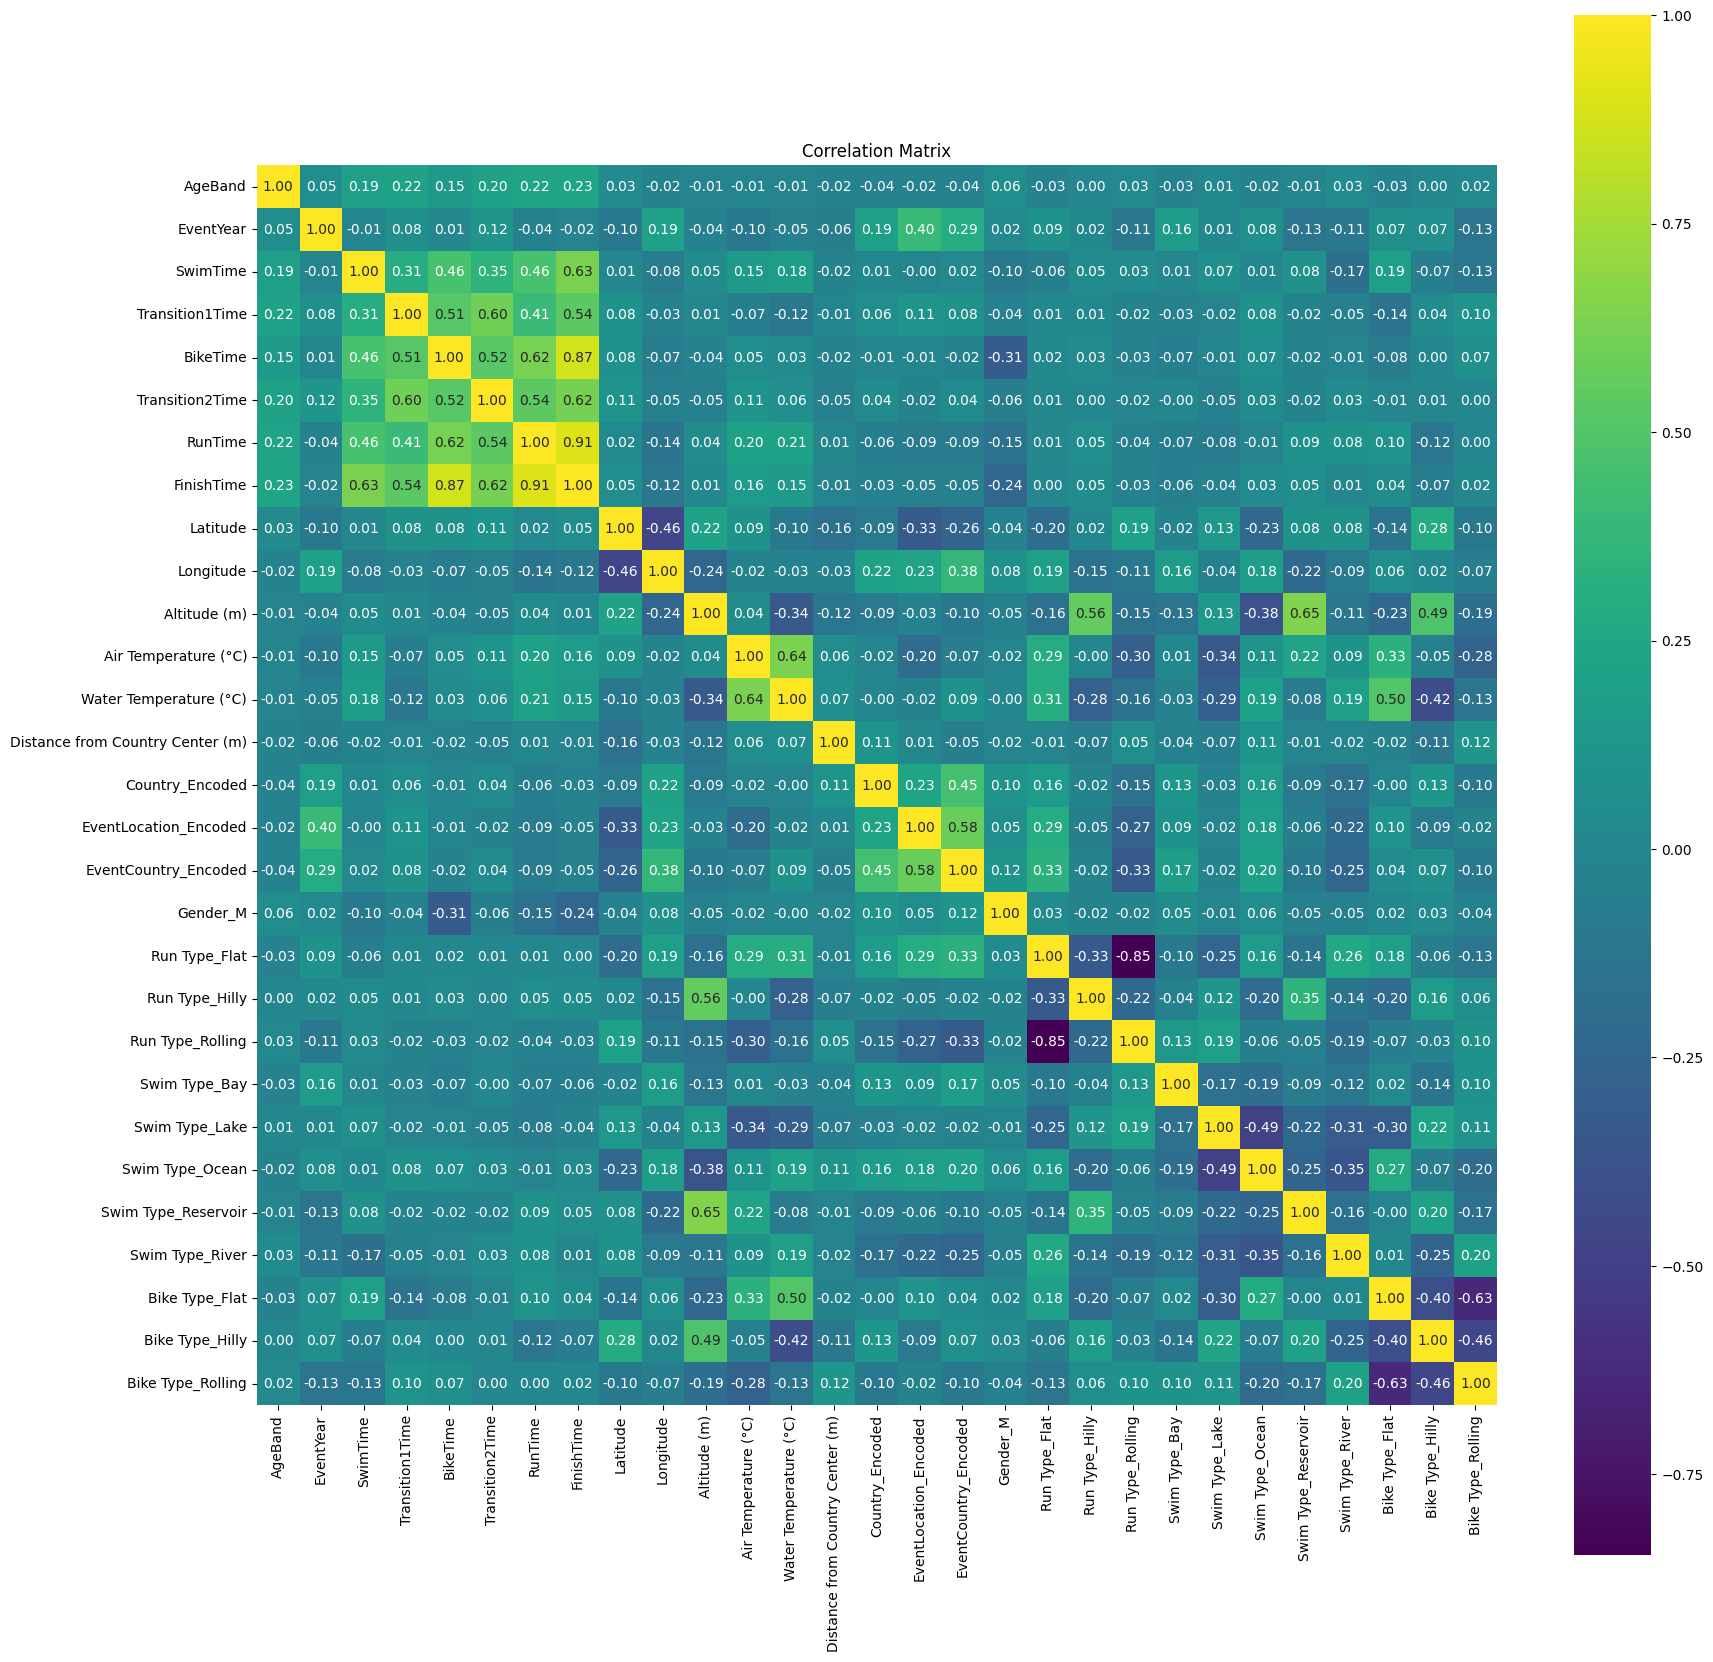

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_encoded.dropna().corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [77]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Distance from Country Center (m)', 'Country_Encoded',
       'EventLocation_Encoded', 'EventCountry_Encoded', 'Gender_M',
       'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'Swim Type_Bay',
       'Swim Type_Lake', 'Swim Type_Ocean', 'Swim Type_Reservoir',
       'Swim Type_River', 'Bike Type_Flat', 'Bike Type_Hilly',
       'Bike Type_Rolling'],
      dtype='object')

In [78]:
# df_merged.to_csv("df_merge_final.csv", index=False)
# df_encoded.to_csv("df_encoded.csv", index=False)

In [79]:
df_encoded = df_encoded.dropna() # distance (km)

# MODELS WITHOUT DELETING OUTLIERS (04/12/2024)

## Model 1 - Run Time

In [220]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Distance from Country Center (m)', 'Country_Encoded',
       'EventLocation_Encoded', 'EventCountry_Encoded', 'Gender_M',
       'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'Swim Type_Bay',
       'Swim Type_Lake', 'Swim Type_Ocean', 'Swim Type_Reservoir',
       'Swim Type_River', 'Bike Type_Flat', 'Bike Type_Hilly',
       'Bike Type_Rolling', 'FinishActiveTime'],
      dtype='object')

In [221]:
df_run = df_encoded[['AgeBand', 'EventYear', 'Latitude', 'Longitude', 'Altitude (m)', 'Air Temperature (°C)', 'Gender_M', 'Distance from Country Center (m)', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [135]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [136]:
X

AgeBand  EventYear   Latitude   Longitude  Altitude (m)  \
0            35       2019  48.428318 -123.364953            23   
1            35       2019  37.050096 -121.990590            11   
2            35       2016  29.387225  -94.992736             2   
3            45       2016  39.852045    3.118386            10   
4            35       2016  46.123927    3.420371           252   
...         ...        ...        ...         ...           ...   
383497       50       2019  35.045722  -85.309488           210   
383498       18       2014  43.616616 -116.200886           820   
383499       40       2014 -30.705436  -69.198822           598   
383500       25       2013 -30.705436  -69.198822           598   
383501       30       2013  38.571462  -76.076318             2   

        Air Temperature (°C)  Gender_M  Distance from Country Center (m)  \
0                         18         1                      8.579705e+06   
1                         18         1                      9.505490e+06   
2                         21         1                      8.360097e+06   
3                         25         1                      3.255008e+05   
4                         28         0                      4.245105e+05   
...                      ...       ...                               ...   
383497                    22         1                      1.342448e+07   
383498                    27         0                      1.578533e+07   
383499                    25         1                      9.800804e+06   
383500                    25         1                      9.800804e+06   
383501                    27         1                      1.262537e+07   

        Country_Encoded  EventLocation_Encoded  EventCountry_Encoded  \
0                    89                     18                     2   
1                    89                     38                     0   
2                    89                      2                     0   
3                    89                      4                     4   
4                    89                     17                     9   
...                 ...                    ...                   ...   
383497               94                     21                     0   
383498               94                     19                     0   
383499               94                     31                    11   
383500               94                     31                    11   
383501               94                      3                     0   

        Run Type_Flat  Run Type_Hilly  Run Type_Rolling  
0                   1               0                 0  
1                   1               0                 0  
2                   0               0                 1  
3                   1               0                 0  
4                   1               0                 0  
...               ...             ...               ...  
383497              0               0                 1  
383498              1               0                 0  
383499              1               0                 0  
383500              1               0                 0  
383501              1               0                 0  

[383495 rows x 14 columns]

In [137]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento (X_train, y_train): (306796, 14) (306796,)
Tamaño del conjunto de prueba (X_test, y_test): (76699, 14) (76699,)


### Corr Matrix

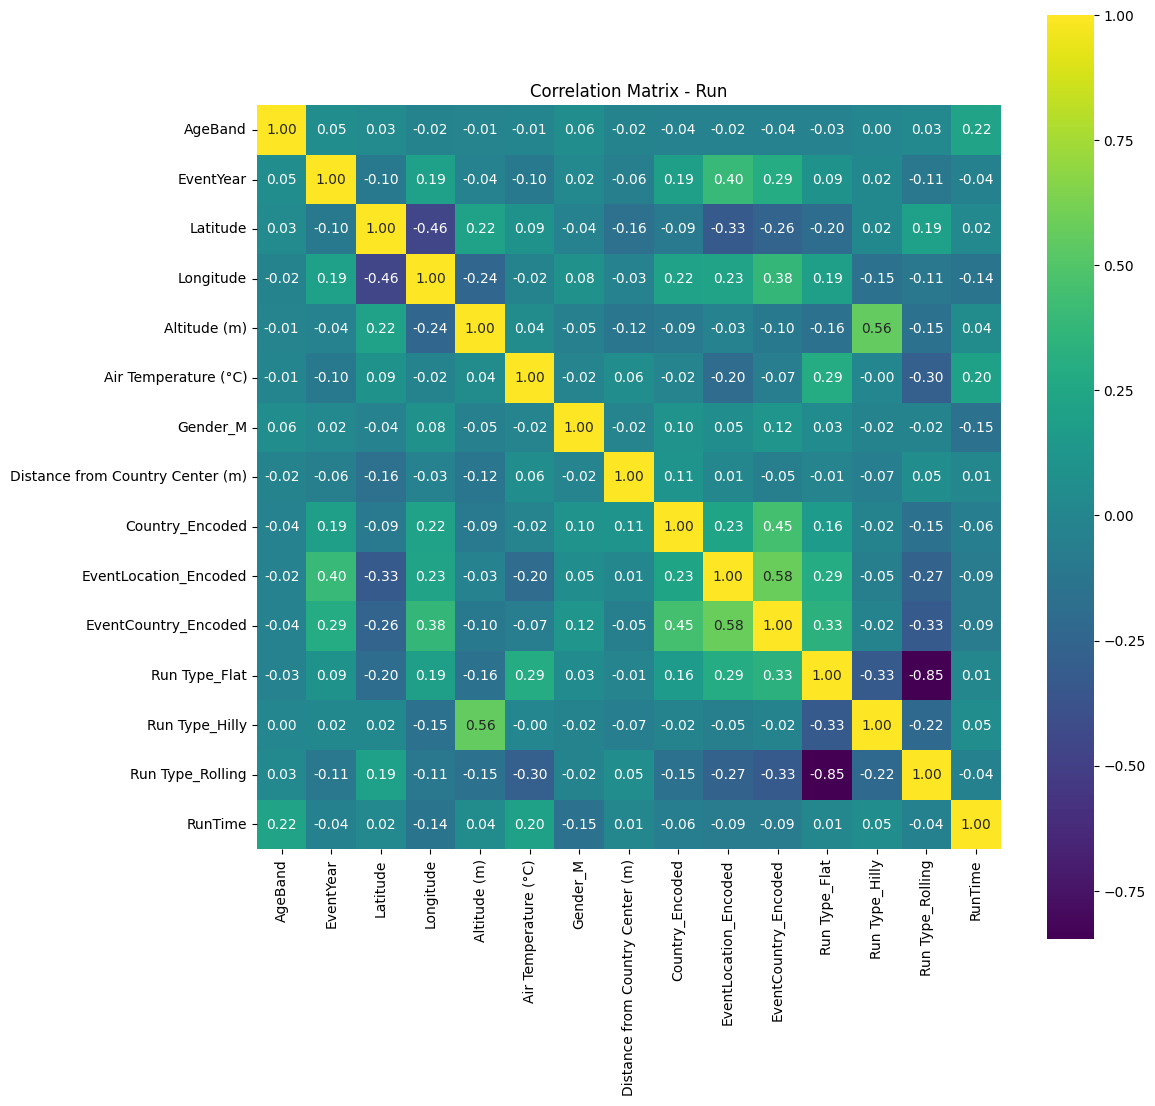

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Linear Regressor

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# 3. **Entrenando Linear Regression**
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predecir con el modelo de regresión lineal
y_pred_linear_test = linear_model.predict(X_test)
y_pred_linear_train = linear_model.predict(X_train)

In [89]:
dict_coefs_by_col = {col: round(coef, 5) for col, coef in zip(X.columns, linear_model.coef_)}
dict_coefs_by_col

{'AgeBand': np.float64(34.6686),
 'EventYear': np.float64(-0.42692),
 'Latitude': np.float64(-5.55409),
 'Longitude': np.float64(-2.70115),
 'Altitude (m)': np.float64(-0.01446),
 'Air Temperature (°C)': np.float64(94.77784),
 'Gender_M': np.float64(-561.7064),
 'Distance from Country Center (m)': np.float64(-1e-05),
 'Country_Encoded': np.float64(-0.87988),
 'EventLocation_Encoded': np.float64(-2.40547),
 'EventCountry_Encoded': np.float64(1.85353),
 'Run Type_Flat': np.float64(-78.62881),
 'Run Type_Hilly': np.float64(97.57496),
 'Run Type_Rolling': np.float64(-18.94616)}

In [90]:
y_test

array([6050, 7602, 9089, ..., 9448, 9507, 5352])

In [91]:
y_pred_linear_test

array([7071.83837484, 7982.41483235, 7243.81892352, ..., 8227.02139101,
       7715.70821127, 7362.07905809])

In [92]:
df_lr = np.column_stack((y_test, y_pred_linear_test))  
df_lr = pd.DataFrame(df_lr, columns=['y_test', 'y_pred'])
df_lr

y_test       y_pred
0      6050.0  7071.838375
1      7602.0  7982.414832
2      9089.0  7243.818924
3      5184.0  7651.460754
4      8466.0  8717.827134
...       ...          ...
76694  7442.0  8238.039858
76695  5171.0  7166.095314
76696  9448.0  8227.021391
76697  9507.0  7715.708211
76698  5352.0  7362.079058

[76699 rows x 2 columns]

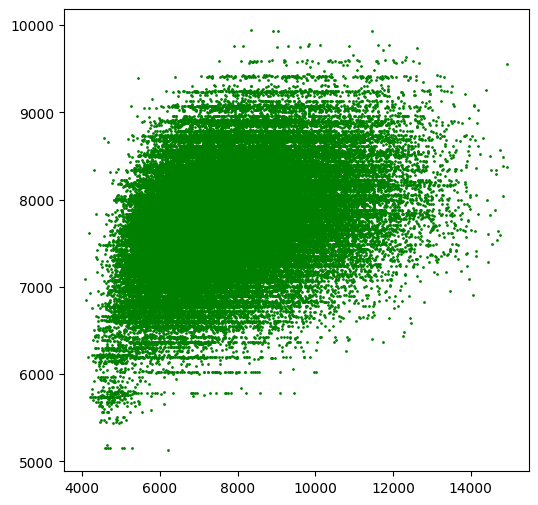

In [93]:
# Create a scatter plot with different colors for y_train and y_test
plt.figure(figsize=(6, 6))

# Plot y_train with one color (e.g., blue)
# plt.scatter(y_train, y_pred_linear_train, color='blue', label='y_train vs y_pred_train')

# Plot y_test with another color (e.g., green)
plt.scatter(y_test, y_pred_linear_test, color='green', label='y_test vs y_pred_test', s=1)


In [94]:
# Evaluar el modelo de regresión lineal

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_linear_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_linear_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_linear_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_linear_test, y_test)}')

Train R^2 Score: 0.13802260575525094
Test R^2 Score: 0.13918521338041234

Train MSE: 2254414.0489077196
Test MSE: 2251108.124953934

Train RMSE: 1501.4706287196295
Test RMSE: 1500.3693295165474


### Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

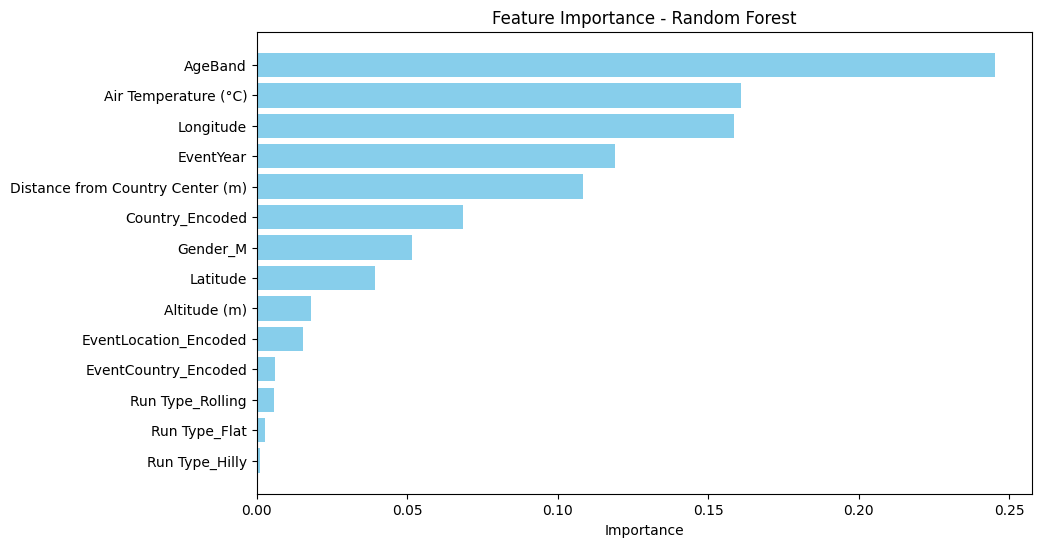

In [96]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [97]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [98]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

y_test       y_pred
0      6050.0  6965.800460
1      7602.0  7806.615463
2      9089.0  8135.711232
3      5184.0  7782.344184
4      8466.0  8273.416799
...       ...          ...
76694  7442.0  8509.441024
76695  5171.0  6688.803064
76696  9448.0  8134.901664
76697  9507.0  7868.634930
76698  5352.0  6786.761447

[76699 rows x 2 columns]

In [99]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.3511488659092601
Test R^2 Score: 0.23961861338712642

Train MSE: 1697004.0306283606
Test MSE: 1988465.7467256256

Train RMSE: 1302.6910725987034
Test RMSE: 1410.1296914559405


### XGBoost

In [100]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

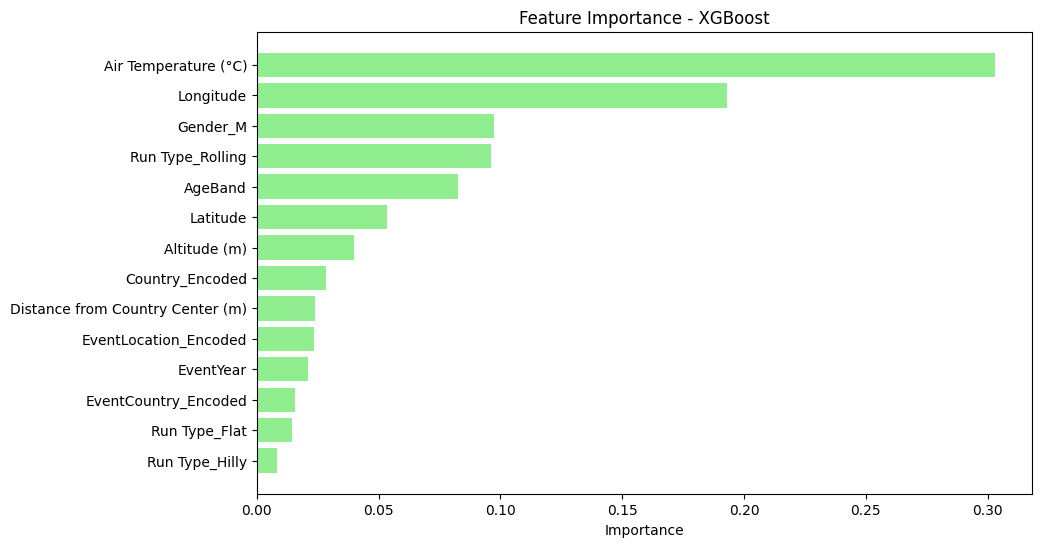

In [101]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

In [102]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [103]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6640.218262
1      7602.0  8315.442383
2      9089.0  8206.740234
3      5184.0  7610.226074
4      8466.0  8377.312500
...       ...          ...
76694  7442.0  8077.463379
76695  5171.0  6677.038574
76696  9448.0  8050.748047
76697  9507.0  7752.802246
76698  5352.0  6843.645020

[76699 rows x 2 columns]

In [104]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.28772878646850586
Test R^2 Score: 0.27384090423583984

Train MSE: 1862872.4415837552
Test MSE: 1898971.2837673964

Train RMSE: 1364.8708516133515
Test RMSE: 1378.03167008868


#### GridSearchCV

In [120]:
from sklearn.model_selection import GridSearchCV

xgboost_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, n_jobs=None, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Test the best model on the test set
best_xgboost = grid_search.best_estimator_
test_score = best_xgboost.score(X_test, y_test)
print(f"Test set score: {test_score}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.3s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   4.6s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   4.5s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   4.6s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   4.9s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   5.0s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=2000; total time=   8.3s
[CV] END .learning_rate=0.01, max_depth=3, n_es

### DecisionTreeRegressor


In [121]:
from sklearn.tree import DecisionTreeRegressor

# 6. **Entrenando DecisionTreeRegressor**
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

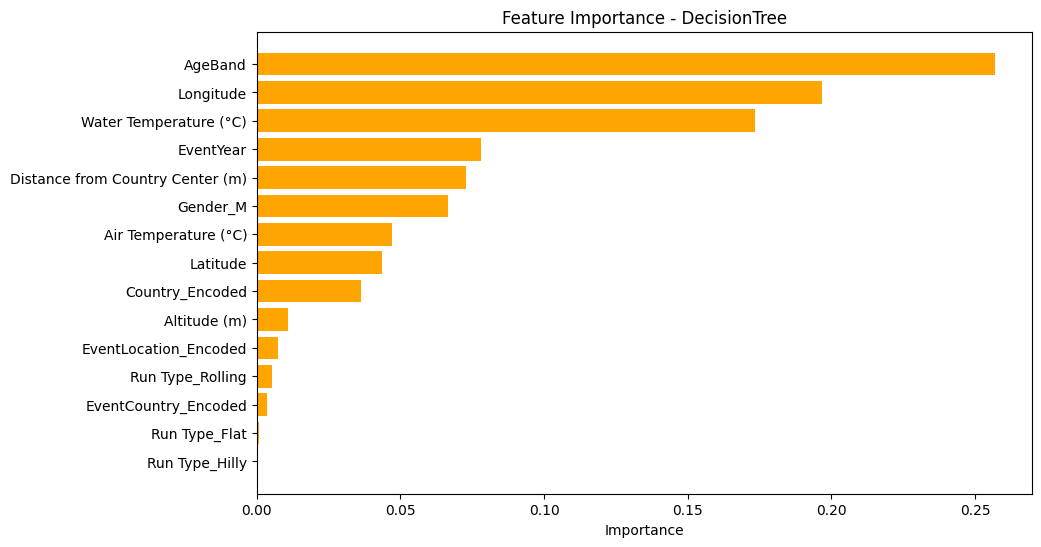

In [122]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - DecisionTree')
plt.show()

In [123]:
# Predecir con el modelo de XGBoost
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

In [124]:
df_xgb = np.column_stack((y_test, y_pred_dt_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6620.710692
1      7602.0  7393.133492
2      9089.0  7292.942013
3      5184.0  7733.647541
4      8466.0  8214.862573
...       ...          ...
76694  7442.0  8021.266667
76695  5171.0  6693.317052
76696  9448.0  8229.500956
76697  9507.0  7873.424000
76698  5352.0  6823.464332

[76699 rows x 2 columns]

In [125]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_dt_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_dt_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_dt_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_dt_test, y_test)}')

Train R^2 Score: 0.29435660533908636
Test R^2 Score: 0.2425815450901435

Train MSE: 1845538.4016611513
Test MSE: 1980717.413711345

Train RMSE: 1358.5059446543291
Test RMSE: 1407.379626721712


## Model 1 - Run Time (with Standard Scaler)

In [222]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Distance from Country Center (m)', 'Country_Encoded',
       'EventLocation_Encoded', 'EventCountry_Encoded', 'Gender_M',
       'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'Swim Type_Bay',
       'Swim Type_Lake', 'Swim Type_Ocean', 'Swim Type_Reservoir',
       'Swim Type_River', 'Bike Type_Flat', 'Bike Type_Hilly',
       'Bike Type_Rolling', 'FinishActiveTime'],
      dtype='object')

In [223]:
df_run = df_encoded[['AgeBand', 'EventYear', 'Latitude', 'Longitude', 'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)', 'Gender_M', 'Distance from Country Center (m)', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [224]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [225]:
X

AgeBand  EventYear   Latitude   Longitude  Altitude (m)  \
0            35       2019  48.428318 -123.364953            23   
1            35       2019  37.050096 -121.990590            11   
2            35       2016  29.387225  -94.992736             2   
3            45       2016  39.852045    3.118386            10   
4            35       2016  46.123927    3.420371           252   
...         ...        ...        ...         ...           ...   
383497       50       2019  35.045722  -85.309488           210   
383498       18       2014  43.616616 -116.200886           820   
383499       40       2014 -30.705436  -69.198822           598   
383500       25       2013 -30.705436  -69.198822           598   
383501       30       2013  38.571462  -76.076318             2   

        Air Temperature (°C)  Water Temperature (°C)  Gender_M  \
0                         18                      19         1   
1                         18                      17         1   
2                         21                      22         1   
3                         25                      17         1   
4                         28                      25         0   
...                      ...                     ...       ...   
383497                    22                      22         1   
383498                    27                      22         0   
383499                    25                      20         1   
383500                    25                      20         1   
383501                    27                      24         1   

        Distance from Country Center (m)  Country_Encoded  \
0                           8.579705e+06               89   
1                           9.505490e+06               89   
2                           8.360097e+06               89   
3                           3.255008e+05               89   
4                           4.245105e+05               89   
...                                  ...              ...   
383497                      1.342448e+07               94   
383498                      1.578533e+07               94   
383499                      9.800804e+06               94   
383500                      9.800804e+06               94   
383501                      1.262537e+07               94   

        EventLocation_Encoded  EventCountry_Encoded  Run Type_Flat  \
0                          18                     2              1   
1                          38                     0              1   
2                           2                     0              0   
3                           4                     4              1   
4                          17                     9              1   
...                       ...                   ...            ...   
383497                     21                     0              0   
383498                     19                     0              1   
383499                     31                    11              1   
383500                     31                    11              1   
383501                      3                     0              1   

        Run Type_Hilly  Run Type_Rolling  
0                    0                 0  
1                    0                 0  
2                    0                 1  
3                    0                 0  
4                    0                 0  
...                ...               ...  
383497               0                 1  
383498               0                 0  
383499               0                 0  
383500               0                 0  
383501               0                 0  

[383495 rows x 15 columns]

In [226]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [227]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train_scaled, y_train):", X_train_scaled.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test_scaled, y_test):", X_test_scaled.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train_scaled, y_train): (306796, 15) (306796,)
Tamaño del conjunto de prueba (X_test_scaled, y_test): (76699, 15) (76699,)


### Corr Matrix

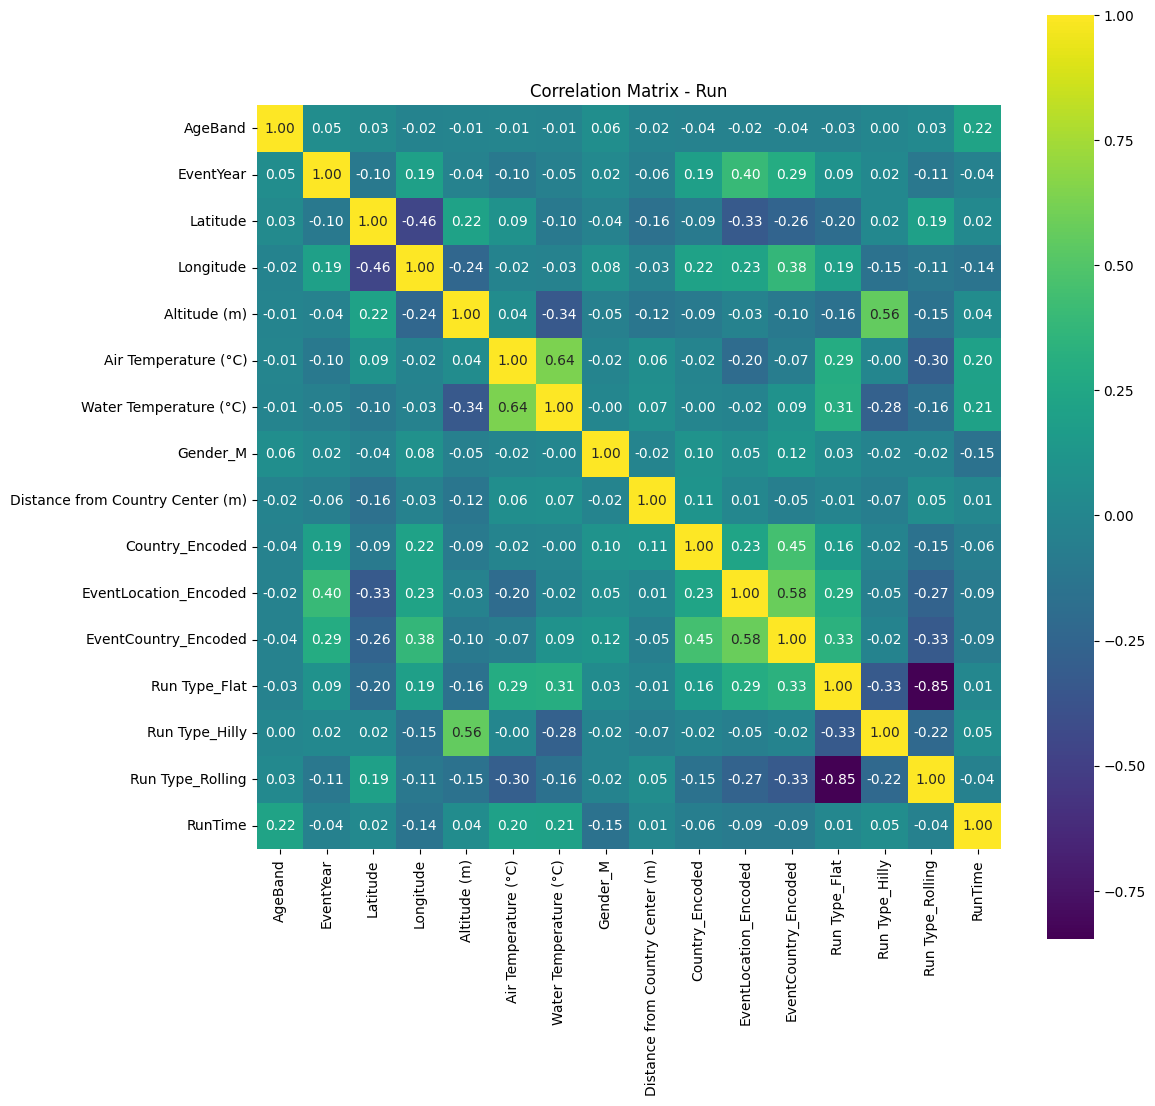

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Random Forest

In [229]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [230]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test_scaled)
y_pred_rf_train = rf_model.predict(X_train_scaled)

In [231]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

y_test       y_pred
0      6050.0  6965.800460
1      7602.0  7812.858735
2      9089.0  8215.675399
3      5184.0  7782.344184
4      8466.0  8273.416799
...       ...          ...
76694  7442.0  8595.609412
76695  5171.0  6688.803064
76696  9448.0  8134.901664
76697  9507.0  7868.634930
76698  5352.0  6786.761447

[76699 rows x 2 columns]

In [232]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.3511535429614494
Test R^2 Score: 0.23974932385186332

Train MSE: 1696991.7982748982
Test MSE: 1988123.9270987334

Train RMSE: 1302.6863775578902
Test RMSE: 1410.008484761256


### XGBoost

In [233]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [234]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
y_pred_xgb_train = xgb_model.predict(X_train_scaled)

In [235]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6609.223633
1      7602.0  8388.793945
2      9089.0  7574.786133
3      5184.0  7737.941406
4      8466.0  8392.374023
...       ...          ...
76694  7442.0  7871.881348
76695  5171.0  6641.013184
76696  9448.0  8111.899414
76697  9507.0  7747.240723
76698  5352.0  6830.604980

[76699 rows x 2 columns]

In [236]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.2869300842285156
Test R^2 Score: 0.27282482385635376

Train MSE: 1864961.5667134777
Test MSE: 1901628.5062478804

Train RMSE: 1365.635956876311
Test RMSE: 1378.995469988165


### DecisionTreeRegressor


In [237]:
from sklearn.tree import DecisionTreeRegressor

# 6. **Entrenando DecisionTreeRegressor**
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

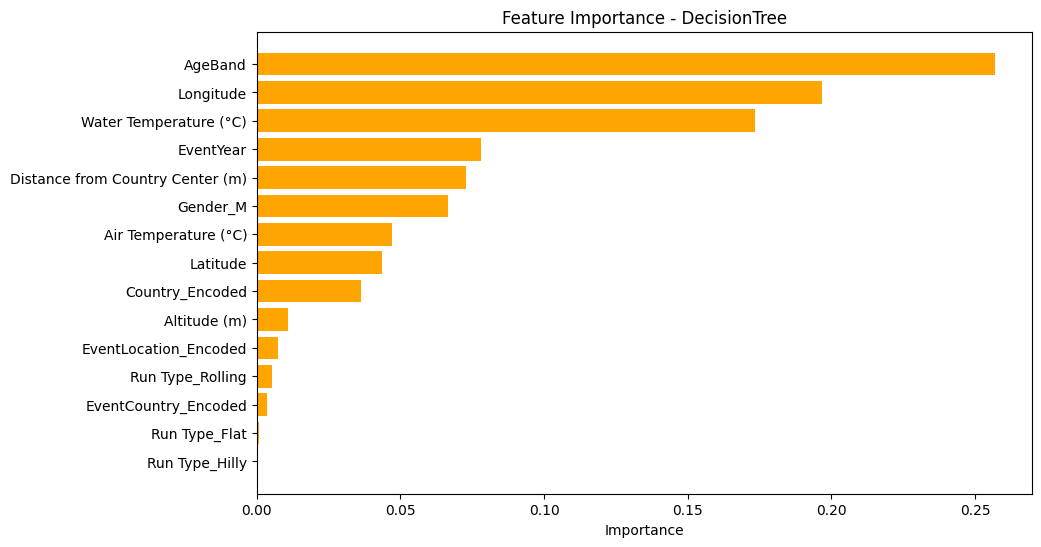

In [238]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - DecisionTree')
plt.show()

In [239]:
# Predecir con el modelo de XGBoost
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

In [240]:
df_xgb = np.column_stack((y_test, y_pred_dt_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6620.710692
1      7602.0  7393.133492
2      9089.0  7292.942013
3      5184.0  7733.647541
4      8466.0  8214.862573
...       ...          ...
76694  7442.0  8021.266667
76695  5171.0  6693.317052
76696  9448.0  8229.500956
76697  9507.0  7873.424000
76698  5352.0  6823.464332

[76699 rows x 2 columns]

In [241]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_dt_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_dt_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_dt_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_dt_test, y_test)}')

Train R^2 Score: 0.29435660533908636
Test R^2 Score: 0.2425815450901435

Train MSE: 1845538.4016611513
Test MSE: 1980717.413711345

Train RMSE: 1358.5059446543291
Test RMSE: 1407.379626721712


No cambia nada al aplicar el Standard Scaler, los resultados son idénticos, por tanto no se va a escalar en el resto del código

## Model 1 - Run Time (Paper)
Europe has the fastest Ironman race courses and the fastest Ironman age group triathletes


In [242]:
df_run = df_encoded[['AgeBand', 'Air Temperature (°C)', 'Gender_M', 'Country_Encoded', 'EventLocation_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [243]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [244]:
X

AgeBand  Air Temperature (°C)  Gender_M  Country_Encoded  \
0            35                    18         1               89   
1            35                    18         1               89   
2            35                    21         1               89   
3            45                    25         1               89   
4            35                    28         0               89   
...         ...                   ...       ...              ...   
383497       50                    22         1               94   
383498       18                    27         0               94   
383499       40                    25         1               94   
383500       25                    25         1               94   
383501       30                    27         1               94   

        EventLocation_Encoded  Run Type_Flat  Run Type_Hilly  Run Type_Rolling  
0                          18              1               0                 0  
1                          38              1               0                 0  
2                           2              0               0                 1  
3                           4              1               0                 0  
4                          17              1               0                 0  
...                       ...            ...             ...               ...  
383497                     21              0               0                 1  
383498                     19              1               0                 0  
383499                     31              1               0                 0  
383500                     31              1               0                 0  
383501                      3              1               0                 0  

[383495 rows x 8 columns]

In [245]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train, y_train): (306796, 8) (306796,)
Tamaño del conjunto de prueba (X_test, y_test): (76699, 8) (76699,)


### Corr Matrix

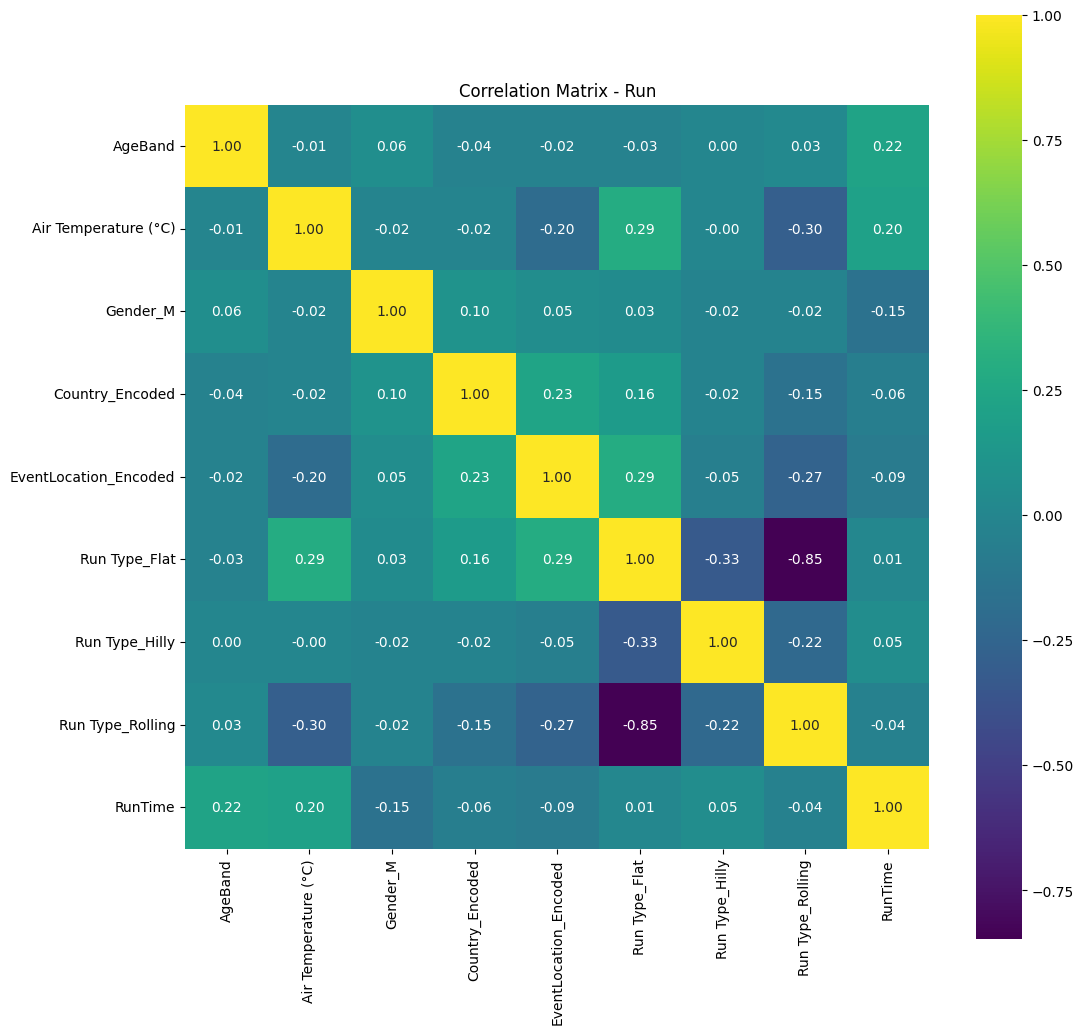

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Random Forest

In [248]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

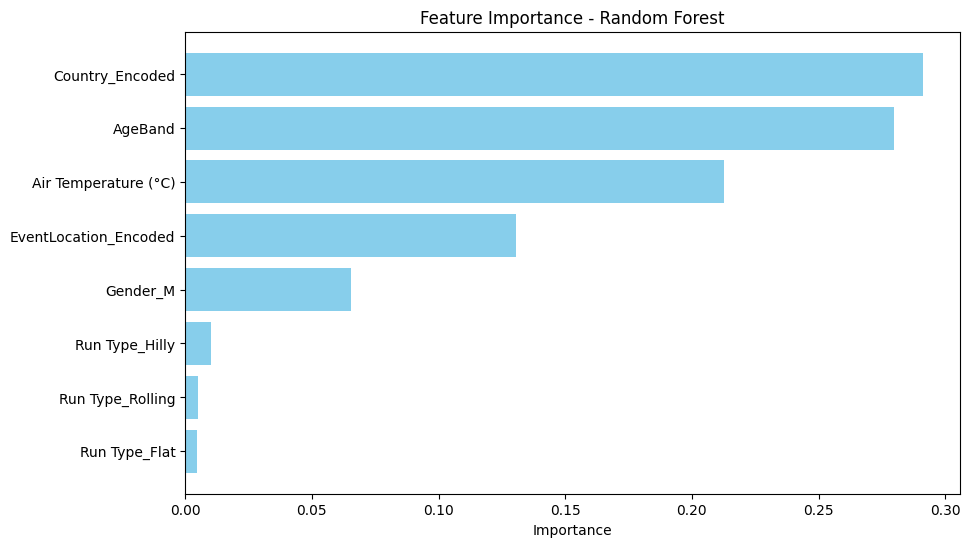

In [249]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [250]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [251]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

y_test       y_pred
0      6050.0  6876.980724
1      7602.0  8087.349115
2      9089.0  8195.681667
3      5184.0  7963.368347
4      8466.0  8382.775740
...       ...          ...
76694  7442.0  8176.817607
76695  5171.0  6720.686429
76696  9448.0  7965.560403
76697  9507.0  7777.068225
76698  5352.0  6805.027752

[76699 rows x 2 columns]

In [252]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.28268067352081927
Test R^2 Score: 0.22864774491551199

Train MSE: 1876075.611686541
Test MSE: 2017155.5549609554

Train RMSE: 1369.6990953076304
Test RMSE: 1420.26601556221


### XGBoost

In [253]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

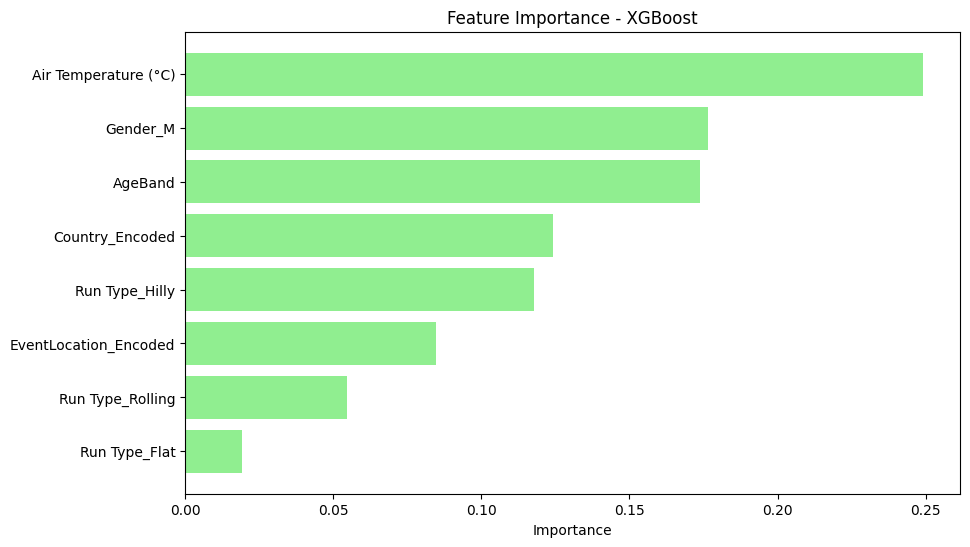

In [254]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

In [255]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [256]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6851.795410
1      7602.0  8208.217773
2      9089.0  7335.424805
3      5184.0  7891.599121
4      8466.0  8398.244141
...       ...          ...
76694  7442.0  8077.841309
76695  5171.0  6730.271973
76696  9448.0  8086.365234
76697  9507.0  7732.883301
76698  5352.0  6824.746582

[76699 rows x 2 columns]

In [257]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.25544077157974243
Test R^2 Score: 0.24434465169906616

Train MSE: 1947318.1959234376
Test MSE: 1976106.5210544106

Train RMSE: 1395.4634341047556
Test RMSE: 1405.7405596533133


Empeora al quedarnos con menos variables

### DecisionTreeRegressor


In [258]:
from sklearn.tree import DecisionTreeRegressor

# 6. **Entrenando DecisionTreeRegressor**
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

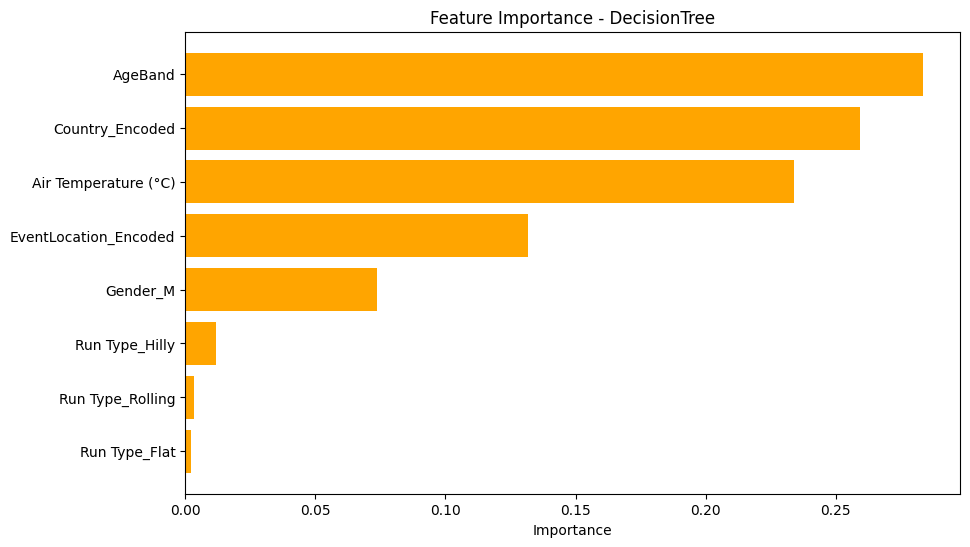

In [259]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - DecisionTree')
plt.show()

In [260]:
# Predecir con el modelo de XGBoost
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

In [261]:
df_xgb = np.column_stack((y_test, y_pred_dt_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6864.006284
1      7602.0  8290.885246
2      9089.0  7069.960133
3      5184.0  7962.108392
4      8466.0  8396.725822
...       ...          ...
76694  7442.0  7747.788462
76695  5171.0  6687.039614
76696  9448.0  7975.215297
76697  9507.0  7775.249240
76698  5352.0  6810.719258

[76699 rows x 2 columns]

In [262]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_dt_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_dt_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_dt_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_dt_test, y_test)}')

Train R^2 Score: 0.25900078924167624
Test R^2 Score: 0.22813576709868144

Train MSE: 1938007.936306473
Test MSE: 2018494.4230208192

Train RMSE: 1392.1235348583375
Test RMSE: 1420.7372814918383


## Model 1 - Run Time (No Latitude, Longitude)

In [263]:
df_run = df_encoded[['AgeBand', 'EventYear', 'Altitude (m)', 'Air Temperature (°C)', 'Gender_M', 'Distance from Country Center (m)', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [264]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [265]:
X

AgeBand  EventYear  Altitude (m)  Air Temperature (°C)  Gender_M  \
0            35       2019            23                    18         1   
1            35       2019            11                    18         1   
2            35       2016             2                    21         1   
3            45       2016            10                    25         1   
4            35       2016           252                    28         0   
...         ...        ...           ...                   ...       ...   
383497       50       2019           210                    22         1   
383498       18       2014           820                    27         0   
383499       40       2014           598                    25         1   
383500       25       2013           598                    25         1   
383501       30       2013             2                    27         1   

        Distance from Country Center (m)  Country_Encoded  \
0                           8.579705e+06               89   
1                           9.505490e+06               89   
2                           8.360097e+06               89   
3                           3.255008e+05               89   
4                           4.245105e+05               89   
...                                  ...              ...   
383497                      1.342448e+07               94   
383498                      1.578533e+07               94   
383499                      9.800804e+06               94   
383500                      9.800804e+06               94   
383501                      1.262537e+07               94   

        EventLocation_Encoded  EventCountry_Encoded  Run Type_Flat  \
0                          18                     2              1   
1                          38                     0              1   
2                           2                     0              0   
3                           4                     4              1   
4                          17                     9              1   
...                       ...                   ...            ...   
383497                     21                     0              0   
383498                     19                     0              1   
383499                     31                    11              1   
383500                     31                    11              1   
383501                      3                     0              1   

        Run Type_Hilly  Run Type_Rolling  
0                    0                 0  
1                    0                 0  
2                    0                 1  
3                    0                 0  
4                    0                 0  
...                ...               ...  
383497               0                 1  
383498               0                 0  
383499               0                 0  
383500               0                 0  
383501               0                 0  

[383495 rows x 12 columns]

In [266]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train, y_train): (306796, 12) (306796,)
Tamaño del conjunto de prueba (X_test, y_test): (76699, 12) (76699,)


### Corr Matrix

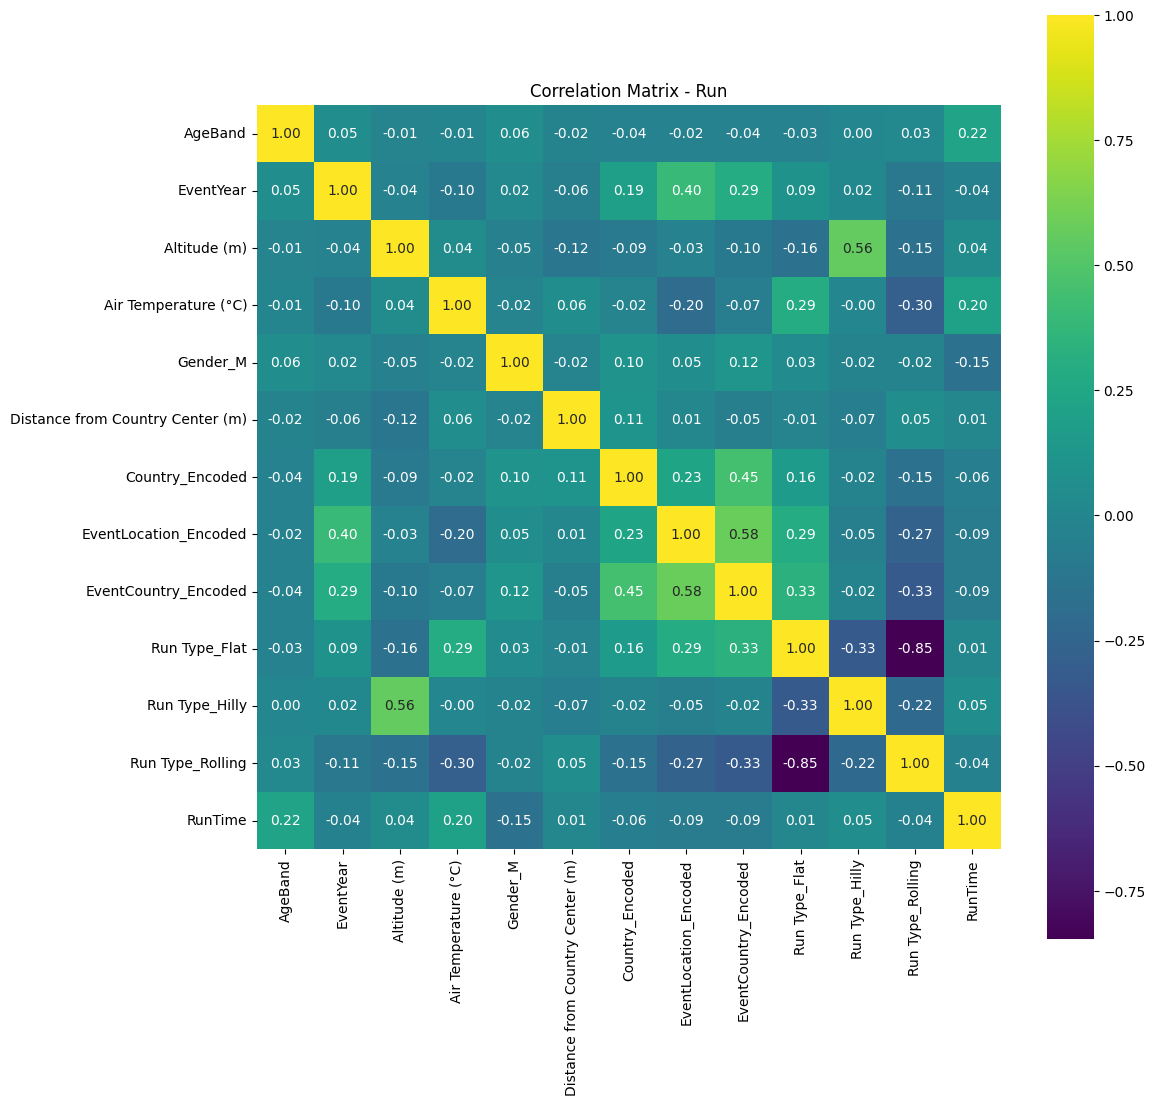

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Random Forest

In [269]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

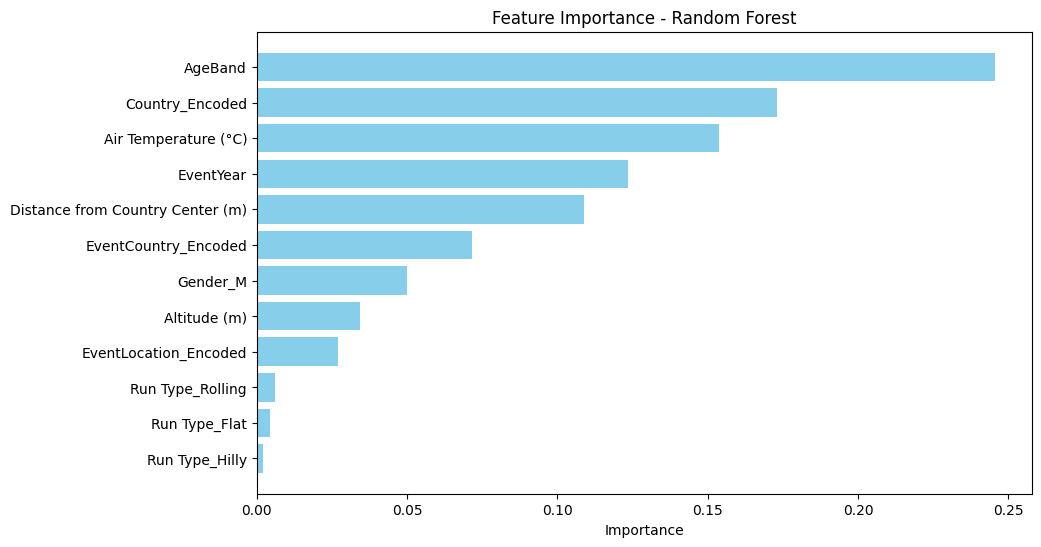

In [270]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [271]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [272]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

y_test       y_pred
0      6050.0  6965.800460
1      7602.0  7828.705739
2      9089.0  8143.120000
3      5184.0  7782.344184
4      8466.0  8273.416799
...       ...          ...
76694  7442.0  8424.278881
76695  5171.0  6688.803064
76696  9448.0  8134.901664
76697  9507.0  7868.634930
76698  5352.0  6786.761447

[76699 rows x 2 columns]

In [273]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.35106483915954134
Test R^2 Score: 0.23884286623191076

Train MSE: 1697223.7940308752
Test MSE: 1990494.395339892

Train RMSE: 1302.7754196448732
Test RMSE: 1410.8488208663223


### XGBoost

In [274]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

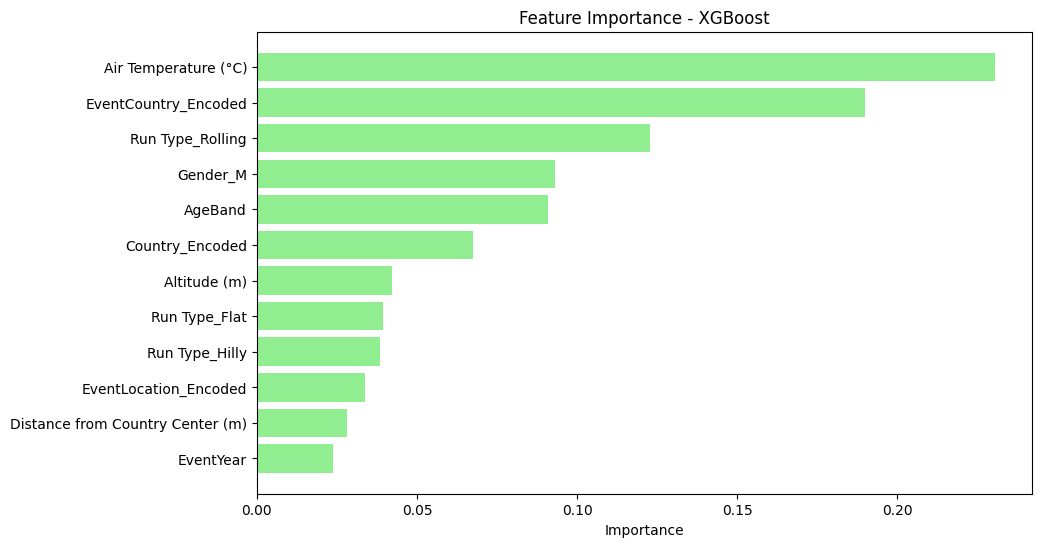

In [275]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

In [276]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [277]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6676.429688
1      7602.0  8407.397461
2      9089.0  7436.268555
3      5184.0  7692.618164
4      8466.0  8425.876953
...       ...          ...
76694  7442.0  7881.585449
76695  5171.0  6663.674805
76696  9448.0  8115.666504
76697  9507.0  7697.741699
76698  5352.0  6833.529297

[76699 rows x 2 columns]

In [278]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.2856209874153137
Test R^2 Score: 0.27234530448913574

Train MSE: 1868385.2065084102
Test MSE: 1902882.3775381646

Train RMSE: 1366.8888786248904
Test RMSE: 1379.4500271985805


### DecisionTreeRegressor


In [279]:
from sklearn.tree import DecisionTreeRegressor

# 6. **Entrenando DecisionTreeRegressor**
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

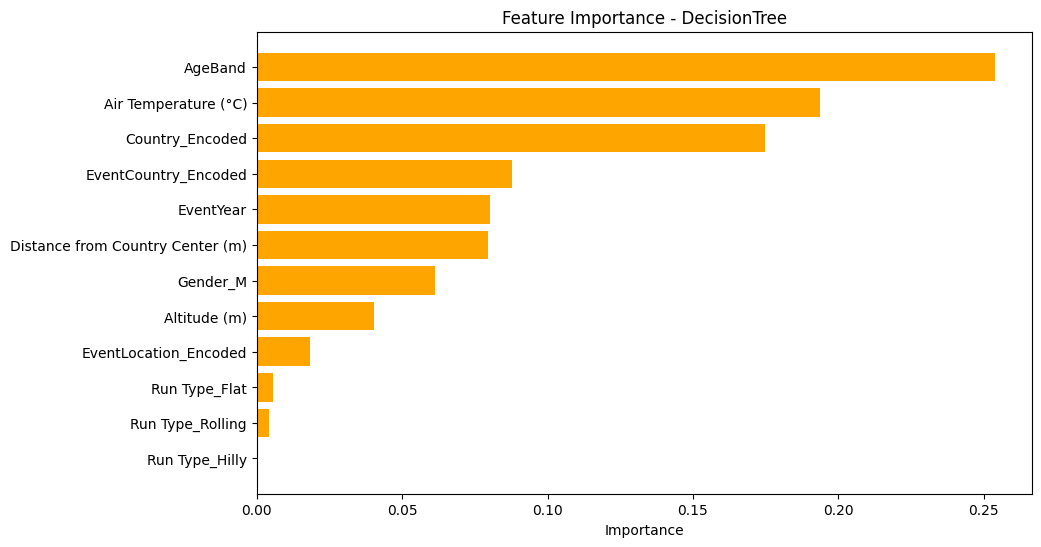

In [280]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - DecisionTree')
plt.show()

In [281]:
# Predecir con el modelo de XGBoost
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

In [282]:
df_xgb = np.column_stack((y_test, y_pred_dt_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0      6050.0  6647.146468
1      7602.0  8137.857724
2      9089.0  7960.250000
3      5184.0  7774.164767
4      8466.0  8217.159420
...       ...          ...
76694  7442.0  8282.734694
76695  5171.0  6647.717161
76696  9448.0  8134.450617
76697  9507.0  7864.592157
76698  5352.0  6926.870148

[76699 rows x 2 columns]

In [283]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_dt_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_dt_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_dt_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_dt_test, y_test)}')

Train R^2 Score: 0.294774968267129
Test R^2 Score: 0.24248350724827494

Train MSE: 1844444.2160493024
Test MSE: 1980973.7914894847

Train RMSE: 1358.1031684114805
Test RMSE: 1407.470707151479


# DELETING OUTLIERS

Reducir muestras de United States

Quitar nacionalidades con poca frecuencia (p.e.: Angola, Djibouti, ...) -> Con percentiles p.e. quitar <p25 de Frequency en Country_Encoded

In [178]:
df_encoded['FinishActiveTime'] = df_encoded['RunTime'] + df_encoded['SwimTime'] + df_encoded['BikeTime']

In [179]:
df_encoded.describe([0.05, 0.10,.75,.90,.95,.99])

AgeBand      EventYear       SwimTime  Transition1Time  \
count  383495.000000  383495.000000  383495.000000    383495.000000   
mean       37.224308    2015.427393    2347.997038       284.842595   
std        10.761798       3.284648     500.124849        97.064850   
min         0.000000    2004.000000    1201.000000        46.000000   
5%         18.000000    2009.000000    1641.000000       135.000000   
10%        25.000000    2011.000000    1771.000000       161.000000   
50%        35.000000    2016.000000    2293.000000       278.000000   
75%        45.000000    2018.000000    2624.000000       356.000000   
90%        50.000000    2019.000000    2984.000000       423.000000   
95%        55.000000    2019.000000    3242.000000       456.000000   
99%        60.000000    2020.000000    3855.000000       490.000000   
max        85.000000    2020.000000    5996.000000       499.000000   

            BikeTime  Transition2Time        RunTime     FinishTime  \
count  383495.000000    383495.000000  383495.000000  383495.000000   
mean    10637.087073       222.405419    7766.035059   21258.388386   
std      1342.673252        93.490448    1617.202373    3065.309001   
min      6511.000000        46.000000    4002.000000   13035.000000   
5%       8736.000000        94.000000    5530.000000   16711.000000   
10%      9066.000000       112.000000    5883.000000   17541.000000   
50%     10479.000000       208.000000    7528.000000   20979.000000   
75%     11422.000000       281.000000    8742.000000   23190.000000   
90%     12424.000000       356.000000   10011.000000   25390.000000   
95%     13097.000000       403.000000   10809.000000   26816.000000   
99%     14456.000000       469.000000   12252.000000   29329.000000   
max     17979.000000       499.000000   14984.000000   36529.000000   

            Latitude      Longitude  ...  Run Type_Rolling  Swim Type_Bay  \
count  383495.000000  383495.000000  ...     383495.000000  383495.000000   
mean       23.059733     -36.774583  ...          0.362242       0.060105   
std        27.219969      87.115467  ...          0.480649       0.237682   
min       -39.273222    -155.824722  ...          0.000000       0.000000   
5%        -34.608370    -123.364953  ...          0.000000       0.000000   
10%       -30.705436    -116.200886  ...          0.000000       0.000000   
50%        33.470971     -79.217000  ...          0.000000       0.000000   
75%        41.295156       8.822265  ...          1.000000       0.000000   
90%        47.674299     137.265556  ...          1.000000       0.000000   
95%        49.734987     152.910352  ...          1.000000       1.000000   
99%        54.523330     176.069477  ...          1.000000       1.000000   
max        59.437216     176.069477  ...          1.000000       1.000000   

       Swim Type_Lake  Swim Type_Ocean  Swim Type_Reservoir  Swim Type_River  \
count   383495.000000    383495.000000        383495.000000    383495.000000   
mean         0.299438         0.358190             0.101587         0.180680   
std          0.458013         0.479469             0.302104         0.384754   
min          0.000000         0.000000             0.000000         0.000000   
5%           0.000000         0.000000             0.000000         0.000000   
10%          0.000000         0.000000             0.000000         0.000000   
50%          0.000000         0.000000             0.000000         0.000000   
75%          1.000000         1.000000             0.000000         0.000000   
90%          1.000000         1.000000             1.000000         1.000000   
95%          1.000000         1.000000             1.000000         1.000000   
99%          1.000000         1.000000             1.000000         1.000000   
max          1.000000         1.000000             1.000000         1.000000   

       Bike Type_Flat  Bike Type_Hilly  Bike Type_Rolling  FinishActiveTime  
count   383495.000000    383495.000000      

In [180]:
df_encoded_filtered = df_encoded.copy()

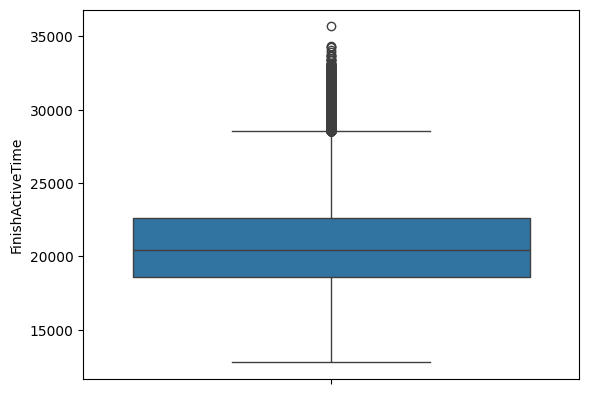

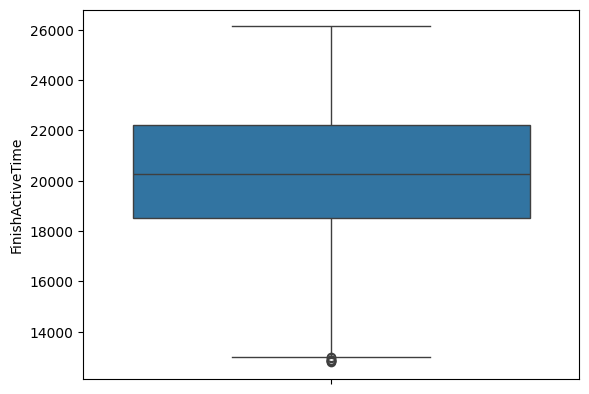

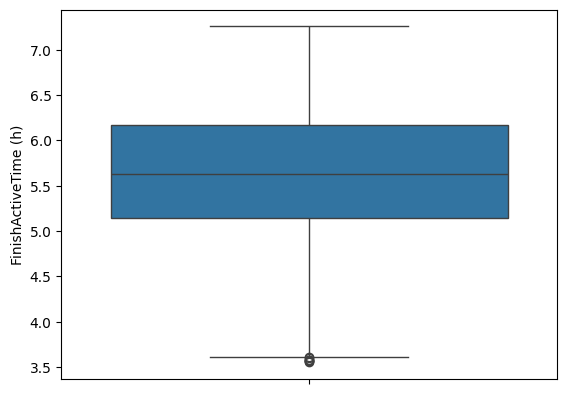

In [181]:
sns.boxplot(df_encoded.FinishActiveTime)
plt.show()

df_encoded_filtered= df_encoded[(df_encoded['FinishActiveTime'] < np.percentile(df_encoded['FinishActiveTime'], 95))]
sns.boxplot(df_encoded_filtered.FinishActiveTime)
plt.show()

sns.boxplot(df_encoded_filtered.FinishActiveTime / 3600)
plt.ylabel('FinishActiveTime (h)')
plt.show()


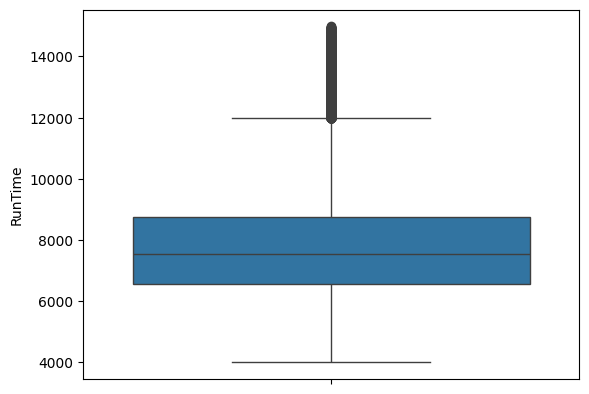

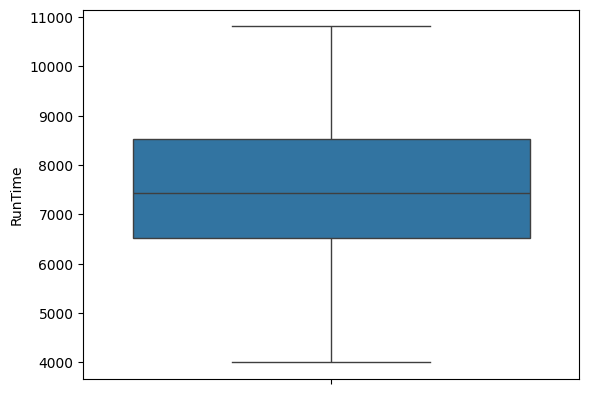

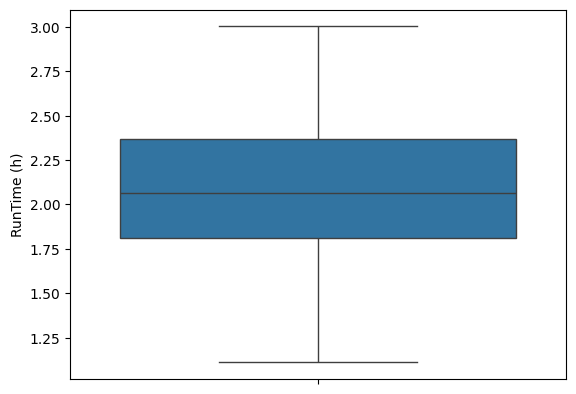

In [182]:
sns.boxplot(df_encoded.RunTime)
plt.show()

df_encoded_filtered= df_encoded[(df_encoded['RunTime'] < np.percentile(df_encoded['RunTime'], 95))]
sns.boxplot(df_encoded_filtered.RunTime)
plt.show()

sns.boxplot(df_encoded_filtered.RunTime / 3600)
plt.ylabel('RunTime (h)')
plt.show()


In [183]:
country_freq

Country  Frequency  Country_Encoded
0       United States     156625                0
1           Australia      31410                1
2              Canada      22458                2
3              Mexico      18835                3
4             Germany      14885                4
..                ...        ...              ...
205          Djibouti          1              218
204  Christmas Island          1              219
203     Bouvet Island          1              220
206            Angola          1              221
200     Aland Islands          1              222

[223 rows x 3 columns]

In [184]:
country_freq[country_freq.Frequency < 10]

Country  Frequency  Country_Encoded
137          Pakistan          9              135
138           Grenada          9              136
136  French Polynesia          9              137
135    American Samoa          9              138
142             Nepal          8              139
..                ...        ...              ...
205          Djibouti          1              218
204  Christmas Island          1              219
203     Bouvet Island          1              220
206            Angola          1              221
200     Aland Islands          1              222

[88 rows x 3 columns]

In [185]:
countries_to_remove = country_freq[country_freq.Frequency < 10].Country.unique()
df_merged[df_merged['Country'].isin(countries_to_remove)]

Gender AgeGroup  AgeBand              Country CountryISO2  EventYear  \
163         F    45-49       45  Antigua and Barbuda          AG       2016   
164         M    25-29       25  Antigua and Barbuda          AG       2012   
165         F    45-49       45             Anguilla          AI       2014   
166         M    35-39       35             Anguilla          AI       2014   
167         M    45-49       45             Anguilla          AI       2015   
...       ...      ...      ...                  ...         ...        ...   
378359      M    35-39       35                Samoa          WS       2020   
378360      F    55-59       55                Samoa          WS       2015   
378361      M    30-34       30                Yemen          YE       2019   
383467      M    35-39       35               Zambia          ZM       2019   
383468      M    35-39       35               Zambia          ZM       2013   

                                        EventLocation  SwimTime  \
163                            IRONMAN 70.3 Kraichgau      2005   
164                             IRONMAN 70.3 San Juan      2466   
165                              IRONMAN 70.3 Augusta      1518   
166                             IRONMAN 70.3 San Juan      2148   
167                               IRONMAN 70.3 Muncie      2504   
...                                               ...       ...   
378359                           IRONMAN 70.3 Geelong      1473   
378360                           IRONMAN 70.3 Cozumel      2230   
378361  IRONMAN 70.3 Middle East Championship Bahrain      2431   
383467                           IRONMAN 70.3 Augusta      1865   
383468                          IRONMAN 70.3 Mallorca      2325   

        Transition1Time  BikeTime  ...  Bike Type  Run Type   Latitude  \
163                 191     11907  ...      Hilly   Rolling  49.144115   
164                 233      8782  ...      Hilly      Flat -30.705436   
165                 248     10483  ...    Rolling      Flat  33.470971   
166                 211      9733  ...      Hilly      Flat -30.705436   
167                 192     10170  ...       Flat   Rolling  40.193689   
...                 ...       ...  ...        ...       ...        ...   
378359              155      9205  ...    Rolling   Rolling -38.149325   
378360              357     12351  ...       Flat      Flat  20.432060   
378361              319      8992  ...       Flat      Flat  26.185938   
383467              279     11293  ...    Rolling      Flat  33.470971   
383468              328     10963  ...      Hilly      Flat  39.852045   

         Longitude Altitude (m) Air Temperature (°C) Water Temperature (°C)  \
163       8.822265          142                   22                     23   
164     -69.198822          598                   25                     20   
165     -81.974843           47                   27                     23   
166     -69.198822          598                   25                     20   
167     -85.386527          284                   28                     25   
...            ...          ...                  ...                    ...   
378359  144.359824           15                   19                     18   
378360  -86.920691            1                   27                     29   
378361   50.528861            2                   22                     23   
383467  -81.974843           47                   27                     23   
383468    3.118386           10                   25                     17   

         EventCountry  Distance from Country Center (km)  \
163           Germany                        7184.992658   
164         Argentina                        5359.806979   
165     United States                        2532.195151   
166         Argentina                        5450.533947   
167     United States                        3244.538125   
...               ...                                ..

In [186]:
# df_merged = df_merged[~df_merged['Country'].isin(countries_to_remove)]

In [187]:
countries_encoded_to_remove = country_freq[country_freq.Frequency < 10].Country_Encoded.unique()
df_encoded[df_encoded['Country_Encoded'].isin(countries_encoded_to_remove)]

AgeBand  EventYear  SwimTime  Transition1Time  BikeTime  \
163          45       2016      2005              191     11907   
164          25       2012      2466              233      8782   
165          45       2014      1518              248     10483   
166          35       2014      2148              211      9733   
167          45       2015      2504              192     10170   
...         ...        ...       ...              ...       ...   
378359       35       2020      1473              155      9205   
378360       55       2015      2230              357     12351   
378361       30       2019      2431              319      8992   
383467       35       2019      1865              279     11293   
383468       35       2013      2325              328     10963   

        Transition2Time  RunTime  FinishTime   Latitude   Longitude  ...  \
163                 221     7083       21407  49.144115    8.822265  ...   
164                  98     6680       18259 -30.705436  -69.198822  ...   
165                 258     8984       21491  33.470971  -81.974843  ...   
166                 204     7227       19523 -30.705436  -69.198822  ...   
167                 145     8202       21213  40.193689  -85.386527  ...   
...                 ...      ...         ...        ...         ...  ...   
378359              153     7877       18863 -38.149325  144.359824  ...   
378360              476    13381       28795  20.432060  -86.920691  ...   
378361              235     6754       18731  26.185938   50.528861  ...   
383467              222     8647       22306  33.470971  -81.974843  ...   
383468              294     6654       20564  39.852045    3.118386  ...   

        Run Type_Rolling  Swim Type_Bay  Swim Type_Lake  Swim Type_Ocean  \
163                    1              0               1                0   
164                    0              0               0                0   
165                    0              0               0                0   
166                    0              0               0                0   
167                    1              0               0                0   
...                  ...            ...             ...              ...   
378359                 1              1               0                0   
378360                 0              0               0                1   
378361                 0              1               0                0   
383467                 0              0               0                0   
383468                 0              0               0                1   

        Swim Type_Reservoir  Swim Type_River  Bike Type_Flat  Bike Type_Hilly  \
163                       0                0               0                1   
164                       1                0               0                1   
165                       0                1               0                0   
166                       1                0               0                1   
167                       1                0               1                0   
...                     ...              ...             ...              ...   
378359                    0                0               0                0   
378360                    0                0               1                0   
378361                    0                0               1                0   
383467                    0                1               0                0   
383468                    0                0               0                1   

        Bike Type_Rolling  FinishActiveTime  
163                     0             20995  
164                     0             17928  
165                     1             20985  
166                     0             19108  
167                     0             20876  
...                   ...               ...  
378359                  1             18555  
378360                  0           

In [188]:
df_encoded_filtered = df_encoded[~df_encoded['Country_Encoded'].isin(countries_encoded_to_remove)]

Reentrenar los modelos

## Model 1 - Run Time (Filtering outliers)

In [189]:
df_encoded_filtered.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Distance from Country Center (m)', 'Country_Encoded',
       'EventLocation_Encoded', 'EventCountry_Encoded', 'Gender_M',
       'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'Swim Type_Bay',
       'Swim Type_Lake', 'Swim Type_Ocean', 'Swim Type_Reservoir',
       'Swim Type_River', 'Bike Type_Flat', 'Bike Type_Hilly',
       'Bike Type_Rolling', 'FinishActiveTime'],
      dtype='object')

In [190]:
df_run = df_encoded_filtered[['AgeBand', 'EventYear', 'Latitude', 'Longitude', 'Altitude (m)', 'Air Temperature (°C)', 'Gender_M', 'Distance from Country Center (m)', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [191]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [192]:
X

AgeBand  EventYear   Latitude   Longitude  Altitude (m)  \
0            35       2019  48.428318 -123.364953            23   
1            35       2019  37.050096 -121.990590            11   
2            35       2016  29.387225  -94.992736             2   
3            45       2016  39.852045    3.118386            10   
4            35       2016  46.123927    3.420371           252   
...         ...        ...        ...         ...           ...   
383497       50       2019  35.045722  -85.309488           210   
383498       18       2014  43.616616 -116.200886           820   
383499       40       2014 -30.705436  -69.198822           598   
383500       25       2013 -30.705436  -69.198822           598   
383501       30       2013  38.571462  -76.076318             2   

        Air Temperature (°C)  Gender_M  Distance from Country Center (m)  \
0                         18         1                      8.579705e+06   
1                         18         1                      9.505490e+06   
2                         21         1                      8.360097e+06   
3                         25         1                      3.255008e+05   
4                         28         0                      4.245105e+05   
...                      ...       ...                               ...   
383497                    22         1                      1.342448e+07   
383498                    27         0                      1.578533e+07   
383499                    25         1                      9.800804e+06   
383500                    25         1                      9.800804e+06   
383501                    27         1                      1.262537e+07   

        Country_Encoded  EventLocation_Encoded  EventCountry_Encoded  \
0                    89                     18                     2   
1                    89                     38                     0   
2                    89                      2                     0   
3                    89                      4                     4   
4                    89                     17                     9   
...                 ...                    ...                   ...   
383497               94                     21                     0   
383498               94                     19                     0   
383499               94                     31                    11   
383500               94                     31                    11   
383501               94                      3                     0   

        Run Type_Flat  Run Type_Hilly  Run Type_Rolling  
0                   1               0                 0  
1                   1               0                 0  
2                   0               0                 1  
3                   1               0                 0  
4                   1               0                 0  
...               ...             ...               ...  
383497              0               0                 1  
383498              1               0                 0  
383499              1               0                 0  
383500              1               0                 0  
383501              1               0                 0  

[383202 rows x 14 columns]

In [193]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento (X_train, y_train): (306561, 14) (306561,)
Tamaño del conjunto de prueba (X_test, y_test): (76641, 14) (76641,)


### Corr Matrix

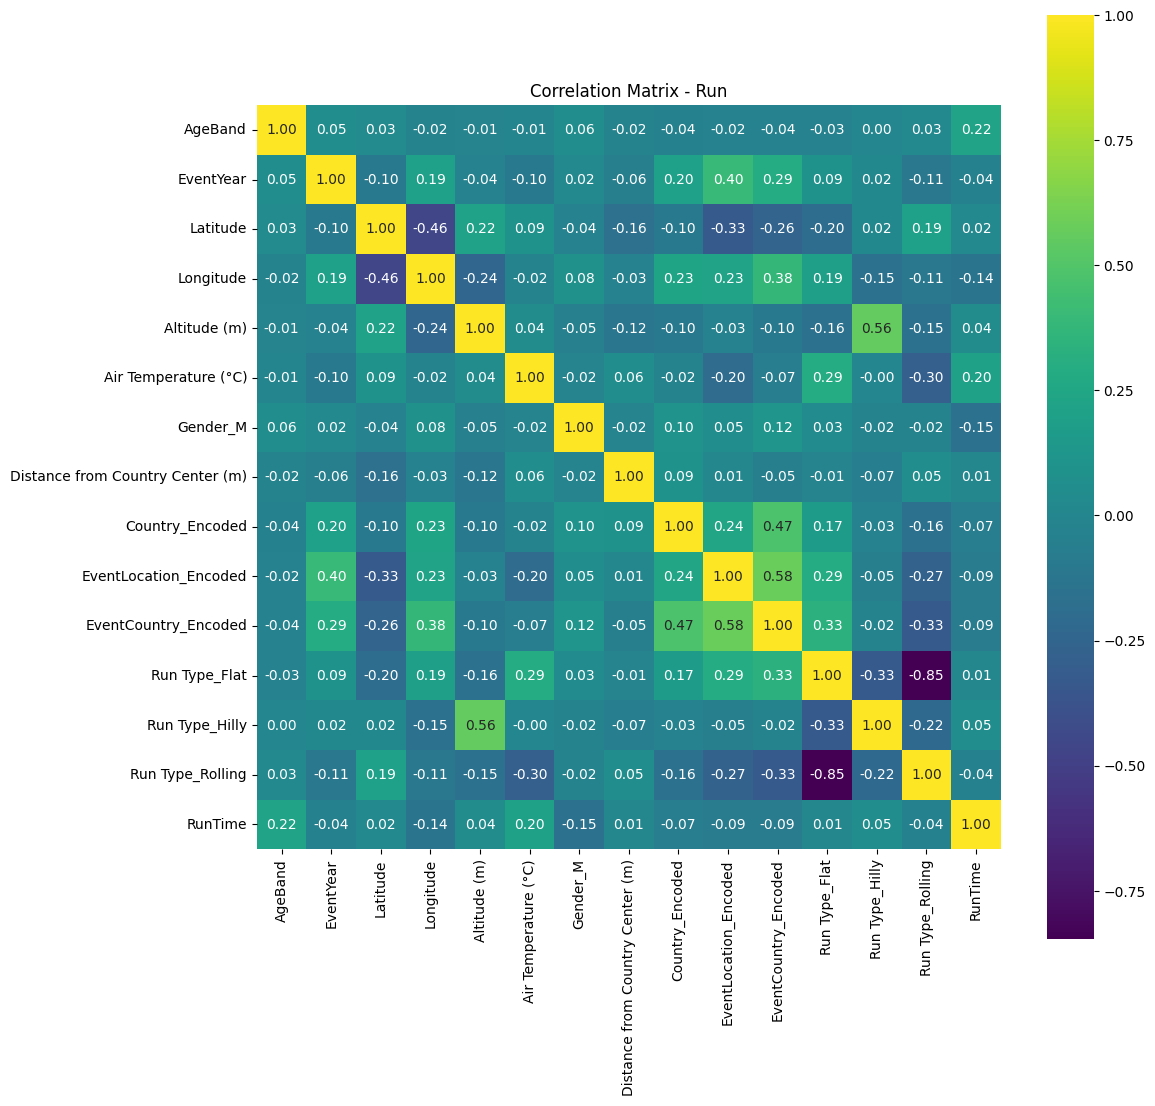

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Random Forest

In [204]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

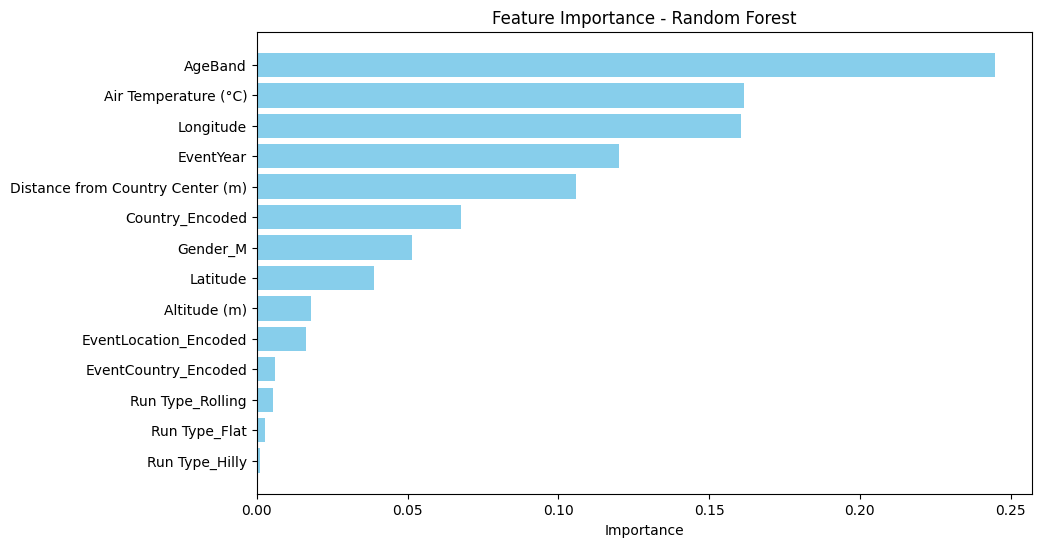

In [205]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [206]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [207]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

y_test       y_pred
0       9259.0  7705.719284
1       5754.0  6647.698577
2      12274.0  8830.277714
3       8146.0  7652.245097
4       8174.0  8105.494069
...        ...          ...
76636   5440.0  6030.756492
76637   6050.0  8372.956737
76638   9468.0  9487.125750
76639   7936.0  7328.367798
76640  11764.0  8420.490127

[76641 rows x 2 columns]

In [208]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.35014120703461415
Test R^2 Score: 0.23917951223208478

Train MSE: 1701515.7217088337
Test MSE: 1980555.1451926788

Train RMSE: 1304.4216042786295
Test RMSE: 1407.3219763766494


### XGBoost

In [209]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

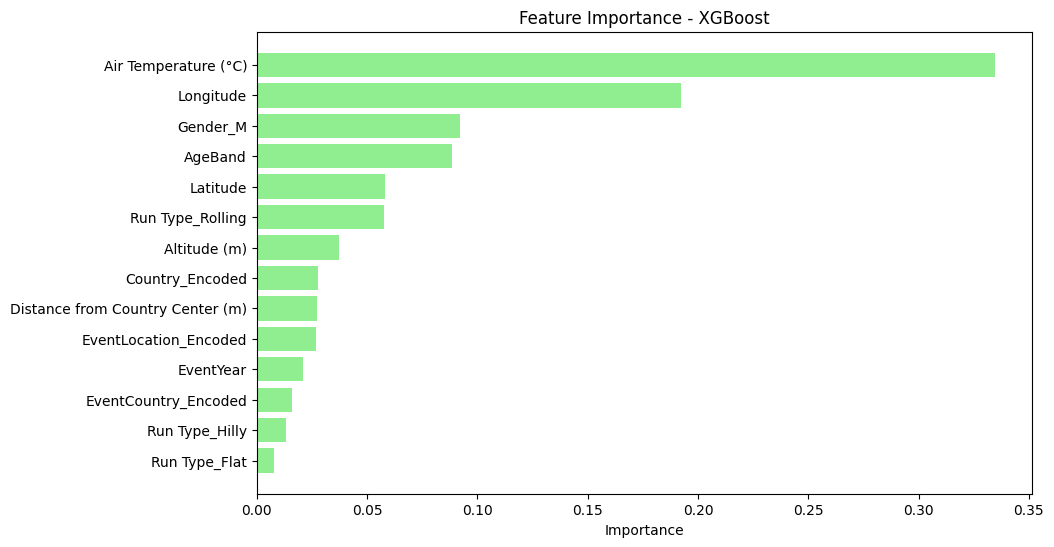

In [210]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

In [211]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [212]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0       9259.0  7540.553223
1       5754.0  6631.182129
2      12274.0  8267.314453
3       8146.0  7803.298828
4       8174.0  7826.459961
...        ...          ...
76636   5440.0  6514.296875
76637   6050.0  8367.204102
76638   9468.0  9834.831055
76639   7936.0  7209.507812
76640  11764.0  8615.793945

[76641 rows x 2 columns]

In [213]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.28685885667800903
Test R^2 Score: 0.27761703729629517

Train MSE: 1867206.6492561824
Test MSE: 1880495.071553234

Train RMSE: 1366.4577012319783
Test RMSE: 1371.3114422162582


#### GridSearchCV

In [214]:
# from sklearn.model_selection import GridSearchCV

# xgboost_model = xgb.XGBRegressor(random_state=42)

# # Define the hyperparameters grid
# param_grid = {
#     'n_estimators': [500, 1000, 2000],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 10]}

# # Set up the GridSearchCV
# grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, n_jobs=None, verbose=2)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Output the best parameters and the best score
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_}")

# # Test the best model on the test set
# best_xgboost = grid_search.best_estimator_
# test_score = best_xgboost.score(X_test, y_test)
# print(f"Test set score: {test_score}")

### DecisionTreeRegressor


In [215]:
from sklearn.tree import DecisionTreeRegressor

# 6. **Entrenando DecisionTreeRegressor**
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

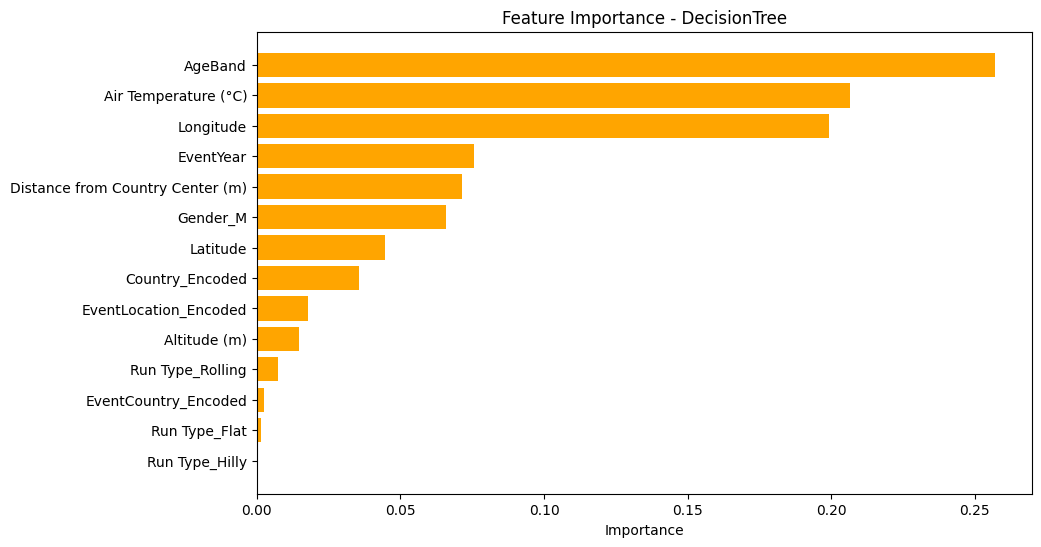

In [216]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - DecisionTree')
plt.show()

In [217]:
# Predecir con el modelo de XGBoost
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

In [218]:
df_xgb = np.column_stack((y_test, y_pred_dt_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

y_test       y_pred
0       9259.0  7904.200303
1       5754.0  6740.816785
2      12274.0  8457.941995
3       8146.0  7829.143137
4       8174.0  7713.291963
...        ...          ...
76636   5440.0  5997.000000
76637   6050.0  8456.279330
76638   9468.0  9831.237374
76639   7936.0  7109.260606
76640  11764.0  8093.229167

[76641 rows x 2 columns]

In [219]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_dt_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_dt_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_dt_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_dt_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_dt_test, y_test)}')

Train R^2 Score: 0.2923456615382538
Test R^2 Score: 0.24817795148920552

Train MSE: 1852840.9486216798
Test MSE: 1957130.558899426

Train RMSE: 1361.191003724929
Test RMSE: 1398.974824255042
